In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### Import some functionality from other notebooks

In [2]:
%run COSMETICS_DICTIONARIES.ipynb

In [3]:
%run PLOTTING_FUNCTIONS.ipynb

In [5]:
%run SOME_PREPROCESSING.ipynb

### Load data (three sets of predictions, one for each cluster)

In [6]:
pred1 = pd.read_csv('../results/2020.10.06/test_pred_1.csv')
pred2 = pd.read_csv('../results/2020.10.06/test_pred_2.csv')
pred3 = pd.read_csv('../results/2020.10.06/test_pred_3.csv')

### Create a new GROUP (both text and numeric), based on assumption Formations are correct

In [7]:
pred1['new_GROUP'] = [map_new_groups[fm] if map_new_groups.get(fm) is not None else np.nan for fm in pred1.FORMATION]
pred2['new_GROUP'] = [map_new_groups[fm] if map_new_groups.get(fm) is not None else np.nan for fm in pred2.FORMATION]
pred3['new_GROUP'] = [map_new_groups[fm] if map_new_groups.get(fm) is not None else np.nan for fm in pred3.FORMATION]

In [8]:
pred1['new_GROUP_num'] = [inv_group_dict[gp] if inv_group_dict.get(gp) is not None else np.nan for gp in pred1.new_GROUP]
pred2['new_GROUP_num'] = [inv_group_dict[gp] if inv_group_dict.get(gp) is not None else np.nan for gp in pred2.new_GROUP]
pred3['new_GROUP_num'] = [inv_group_dict[gp] if inv_group_dict.get(gp) is not None else np.nan for gp in pred3.new_GROUP]

## Definitions
#### Accuracy A = (Tp + Tn) / (Tp + Tn + Fp + Fn) - not a good metric when class imbalance
#### Precision P = Tp / (Tp + Fp) - precision is a better metric in that case, but does not take into account False Negatives
#### Recall R = Tp / (Tp + Fn) - probably the better metric to describe the model's ability to identify the relevant ground thruth positives

In [9]:
label_col = 'FORCE_2020_LITHOFACIES_LITHOLOGY'
pred_col = 'prediction'

# create labels
lbls = [int(x) for x in sorted(list(set(pred1[pred_col][pred1[pred_col].notna()]) | set(pred1[label_col][pred1[label_col].notna()])))]
lbls_desc = [litho_dict[x][0] for x in lbls]

for df, name in zip([pred1, pred2, pred3], ['pred1', 'pred2', 'pred3']):
    data_label = df[label_col][df[label_col].notna()][df[pred_col].notna()]
    data_pred = df[pred_col][df[label_col].notna()][df[pred_col].notna()]
    print('-'*25)
    print(f'Dataset: {name}\n')
    print(f'Accuracy: {accuracy_score(data_label, data_pred):.3f}\n')
    print(f'Report: {classification_report(data_label, data_pred)}\n')
#    plot_confusion_matrix(data_label, data_pred, lbls, normalize=False,
#                          title=f'Dataset: {name}', cmap=plt.cm.Blues, zero_out_diagonal=True)
print('-'*25)

-------------------------
Dataset: pred1

Accuracy: 0.947

Report:               precision    recall  f1-score   support

       30000       0.97      0.85      0.91     12194
       65000       0.97      0.98      0.97     50924
       65030       0.89      0.93      0.91     12022
       70000       0.78      0.84      0.81      2395
       74000       0.85      0.69      0.76        64
       80000       0.88      0.96      0.92      1785
       90000       0.77      0.96      0.86       228
       99000       0.91      1.00      0.95      1335

    accuracy                           0.95     80947
   macro avg       0.88      0.90      0.89     80947
weighted avg       0.95      0.95      0.95     80947


-------------------------
Dataset: pred2

Accuracy: 0.953

Report:               precision    recall  f1-score   support

       30000       0.93      0.98      0.95     15790
       65000       0.96      0.99      0.97     57075
       65030       0.98      0.59      0.73      65

In [65]:
np.percentile(x,5)

1.9500000000000002

In [10]:
for df, name in zip([pred1, pred2, pred3], ['pred1', 'pred2', 'pred3']):
    print('-'*25)
    print(f'Dataset: {name}\n')
    table_comparison_prediction_vs_label(df, 'prediction', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORMATION', absolute_sorting=True)
    print('\n')
print('-'*25)

-------------------------
Dataset: pred1



NameError: name 'table_comparison_prediction_vs_label' is not defined

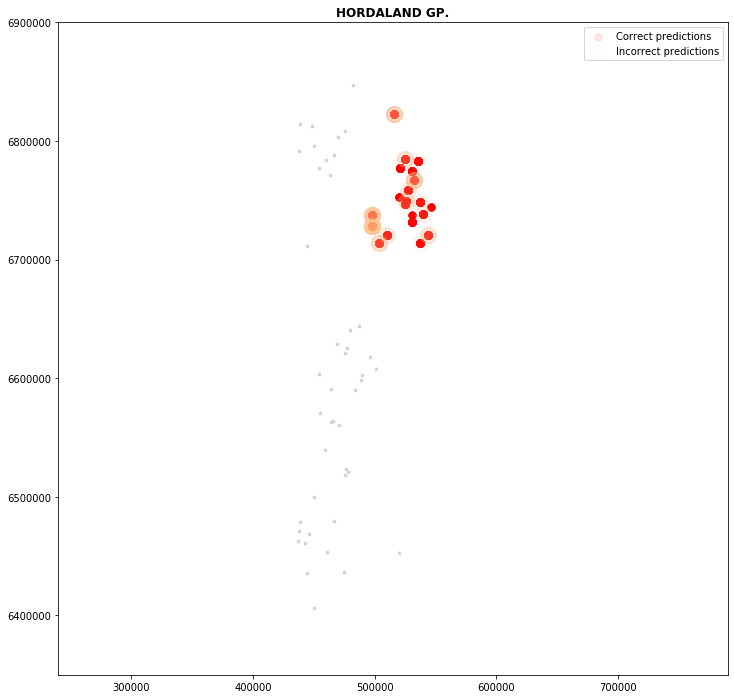

KeyboardInterrupt: 

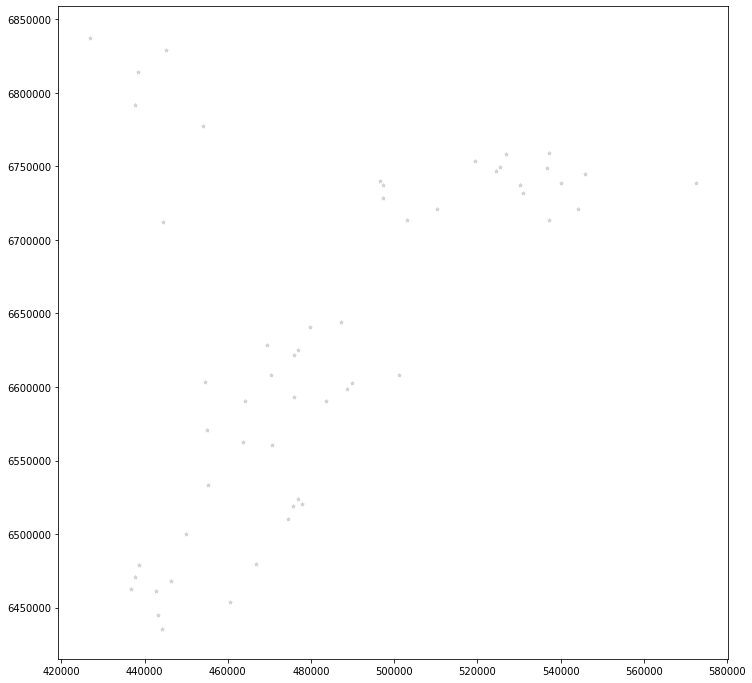

In [31]:
# map-plot

pred_col = 'prediction'
label_col = 'FORCE_2020_LITHOFACIES_LITHOLOGY'
strat_col = 'GROUP'
x_col = 'X_LOC'
y_col = 'Y_LOC'
inv_strat_dict = dict((v[0],(k, v[1])) for k,v in group_dict.items())

for pred, name in zip([pred1, pred2, pred3], ['pred1', 'pred2', 'pred3']):
    for s in pred[strat_col].unique():
        fig = plt.figure(figsize=(12,12))
        for w in df.WELL.unique():
            plt.scatter(np.mean([x for x in df[x_col].loc[((df.WELL==w)&(df[strat_col]==s))]]), np.mean([x for x in df[y_col].loc[((df.WELL==w)&(df[strat_col]==s))]]), marker='*', s=12, c='lightgrey')

        # all X and Y coordinates for CORRECT predictions
        x_cor = pred.loc[((pred[strat_col]==s) & (pred[pred_col]==pred[label_col])),x_col]
        y_cor = pred.loc[((pred[strat_col]==s) & (pred[pred_col]==pred[label_col])),y_col]

        # all X and Y coordinates for INCORRECT predictions
        x_incor = pred.loc[((pred[strat_col]==s) & (pred[pred_col]!=pred[label_col])),x_col]
        y_incor = pred.loc[((pred[strat_col]==s)& (pred[pred_col]!=pred[label_col])),y_col]

        plt.scatter(x_cor, y_cor, marker='o', s=50, c='r', alpha=0.1, label="Correct predictions")
        plt.scatter(x_incor, y_incor, marker='o', s=250, c=inv_strat_dict[s][1], alpha=0.025, label="Incorrect predictions")

        plt.title(s,fontweight='bold')
    #    plt.axis('equal')
        plt.xlim([240000,790000])   # approximately "equal" - "equal" did not seem to work?
        plt.ylim([6350000,6900000])
        plt.legend(loc='upper right')
        plt.show()

### Import the penalty matrix

In [11]:
# penalty matrix: columns are predictions, rows are labels
lbls = [30000,65030,65000,80000,74000,70000,70032,88000,86000,99000,90000,93000]

penmat = pd.DataFrame(np.load('original_material/penalty_matrix.npy'),
                      columns=lbls, index=lbls)

In [12]:
pred_col = 'prediction'
label_col = 'FORCE_2020_LITHOFACIES_LITHOLOGY'
tot_score = 0

for pred, name in zip([pred1, pred2, pred3], ['pred1', 'pred2', 'pred3']):
    score = 0
    print(f'{name}')
    print('-'*51)
    x = len(pred.loc[:,[pred_col,label_col]])
    pred = pred.loc[:,[pred_col,label_col]][pred[pred_col]!=pred[label_col]]
    print(f'Number of mispredictions: {len(pred)} (of {x}, or {(100*len(pred)/x):4.1f}%)')
    for p, li in zip(pred[pred_col],pred[label_col]):
        score += penmat.loc[li,p]
    score = -score/x
    tot_score += score
    print(f'Penalty-score: {score:5.3f}\n')
print('-'*51)
print(f'Total penalty-score: {tot_score:5.3f}')

pred1
---------------------------------------------------
Number of mispredictions: 4283 (of 80947, or  5.3%)
Penalty-score: -0.144

pred2
---------------------------------------------------
Number of mispredictions: 4575 (of 97206, or  4.7%)
Penalty-score: -0.120

pred3
---------------------------------------------------
Number of mispredictions: 2778 (of 55950, or  5.0%)
Penalty-score: -0.132

---------------------------------------------------
Total penalty-score: -0.397


In [13]:
pred1['penalty'] = [penmat.loc[p,li] for p, li in zip(pred1.prediction, pred1.FORCE_2020_LITHOFACIES_LITHOLOGY)]
pred2['penalty'] = [penmat.loc[p,li] for p, li in zip(pred2.prediction, pred2.FORCE_2020_LITHOFACIES_LITHOLOGY)]
pred3['penalty'] = [penmat.loc[p,li] for p, li in zip(pred3.prediction, pred3.FORCE_2020_LITHOFACIES_LITHOLOGY)]

In [14]:
strat_col = 'GROUP'
all_cluster_penalty = 0

for pred, cluster in zip([pred1, pred2, pred3], ['cluster1', 'cluster2', 'cluster3']):
    print(f'{cluster}\n{"-"*50}')
    cluster_penalty = 0
    for s in pred[strat_col].unique():
        cluster_penalty += -sum(pred["penalty"][pred[strat_col]==s])/len(pred["penalty"])
        all_cluster_penalty += -sum(pred["penalty"][pred[strat_col]==s])/len(pred["penalty"])
#        print(f'{s:>23} {-sum(pred["penalty"][pred[strat_col]==s])/len(pred["penalty"])}')
    print(f'Total penalty for {cluster}: {cluster_penalty:6.3f}\n\n')
print(f'\nTotal penalty for all clusters: {all_cluster_penalty:6.3f}')

cluster1
--------------------------------------------------
Total penalty for cluster1: -0.144


cluster2
--------------------------------------------------
Total penalty for cluster2: -0.120


cluster3
--------------------------------------------------
Total penalty for cluster3: -0.132



Total penalty for all clusters: -0.397


In [17]:
## WRONG > CORRECT

# sandstone <> shaly sandstone: 2
print(f'confusing sandstone and shaly sandstone ≈ {-2/(len(pred1)+len(pred2)+len(pred3)):9.6f} per datapoint')

# shale <> sandstone : 3.5
print(f'confusing shale and sandstone ≈ {-3.5/(len(pred1)+len(pred2)+len(pred3)):9.6f} per datapoint')

# shaly sandstone <> shale: 2.375
print(f'confusing shale and shaly sandstone ≈ {-2.375/(len(pred1)+len(pred2)+len(pred3)):9.6f} per datapoint')

confusing sandstone and shaly sandstone ≈ -0.000009 per datapoint
confusing shale and sandstone ≈ -0.000015 per datapoint
confusing shale and shaly sandstone ≈ -0.000010 per datapoint


In [22]:
# approximate average number of mispredictions that we need to turne to get to pole position:
print(f'Approximate difference: {((0.5141-0.5083)/0.000010):3.0f} (mis)predictions')

Approximate difference: 580 (mis)predictions


In [23]:
# total number of data points and mis-predictions:
print('mispredictions vs total predictions:\n')
p,t = 0,0
for pred, cluster in zip([pred1, pred2, pred3], ['cluster1', 'cluster2', 'cluster3']):
    print(f'{cluster}: {len(pred[pred[pred_col]!=pred[label_col]]):5d}/{len(pred):6d}')
    p += len(pred[pred[pred_col]!=pred[label_col]])
    t += len(pred)
print(f'all:      {p:5d}/{t:6d}')

mispredictions vs total predictions:

cluster1:  4283/ 80947
cluster2:  4575/ 97206
cluster3:  2778/ 55950
all:      11636/234103


### Create confusion matrices per cluster

Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization


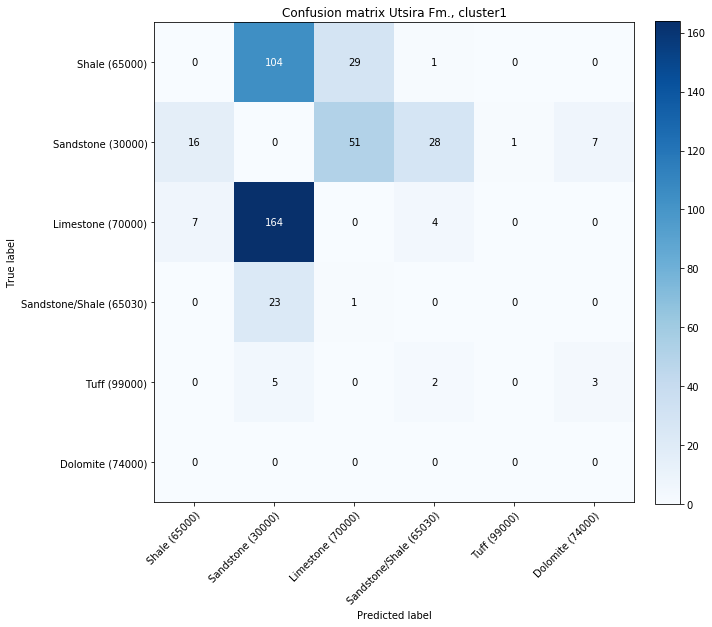

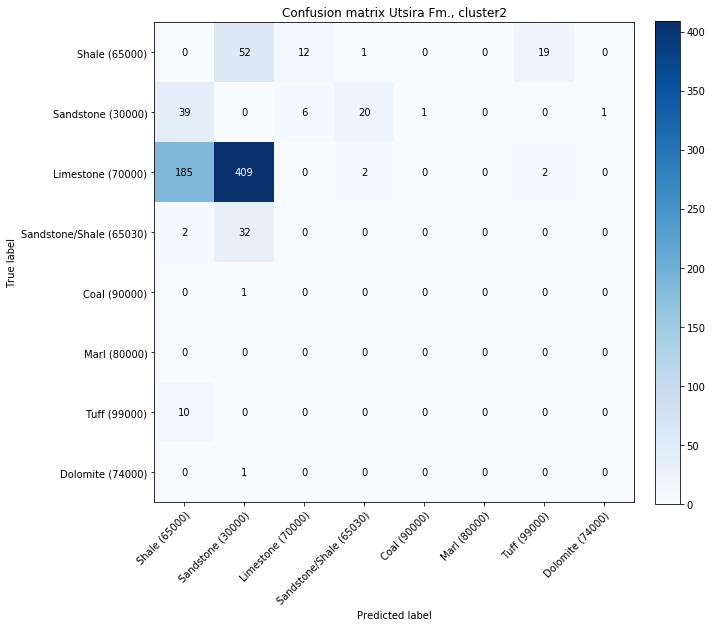

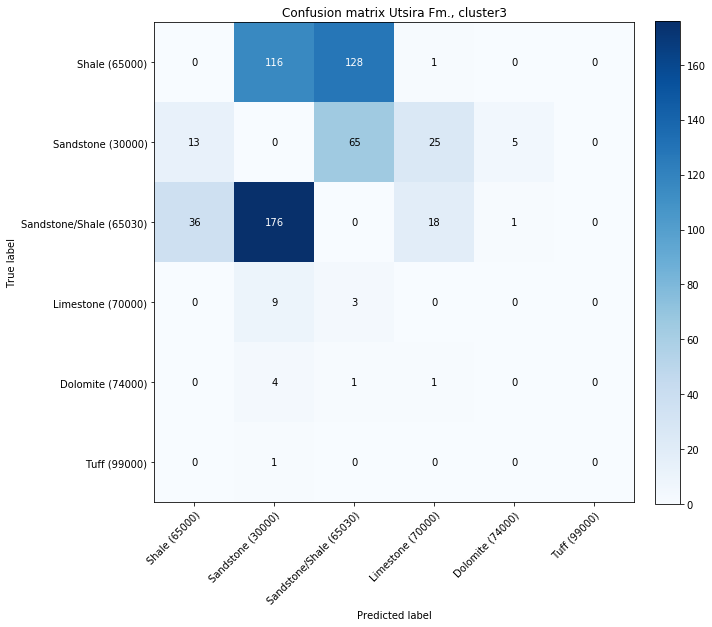

In [24]:
# confusion matrix: TRUE LABEL = Y-axis, PREDICTED LABEL = X-axis
pred_col = 'prediction'
label_col = 'FORCE_2020_LITHOFACIES_LITHOLOGY'
strat_col = 'FORMATION'

for pred, cluster in zip([pred1, pred2, pred3], ['cluster1', 'cluster2', 'cluster3']):
    for s in ['Utsira Fm.']:
        classes = pred[label_col][pred[strat_col]==s].unique()
        classes = [(litho_dict[x][0]+' ('+str(x)+')') for x in classes]
        plot_confusion_matrix(pred[label_col][pred[strat_col]==s],
                              pred[pred_col][pred[strat_col]==s],
                              classes, normalize=False, title=f'Confusion matrix {s}, {cluster}', 
                              cmap=plt.cm.Blues, zero_out_diagonal=True)

### Create confusion matrices per Formation

Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization


C:\Appl\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization


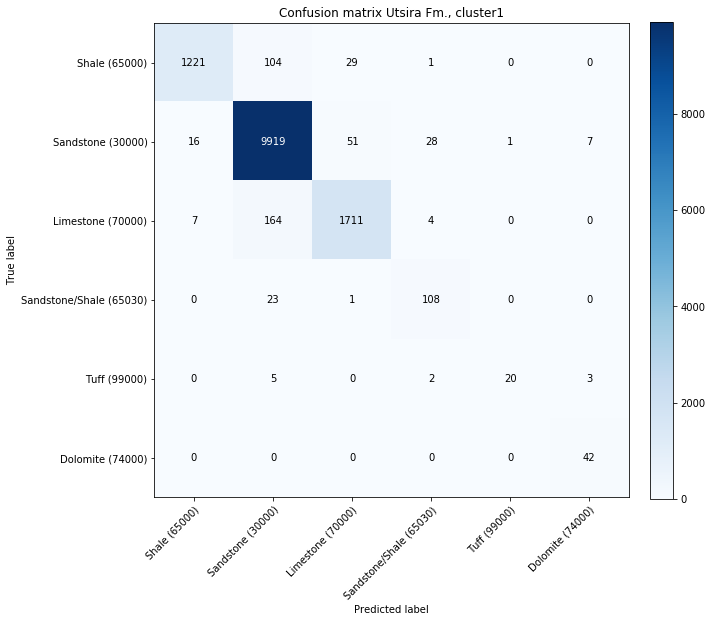

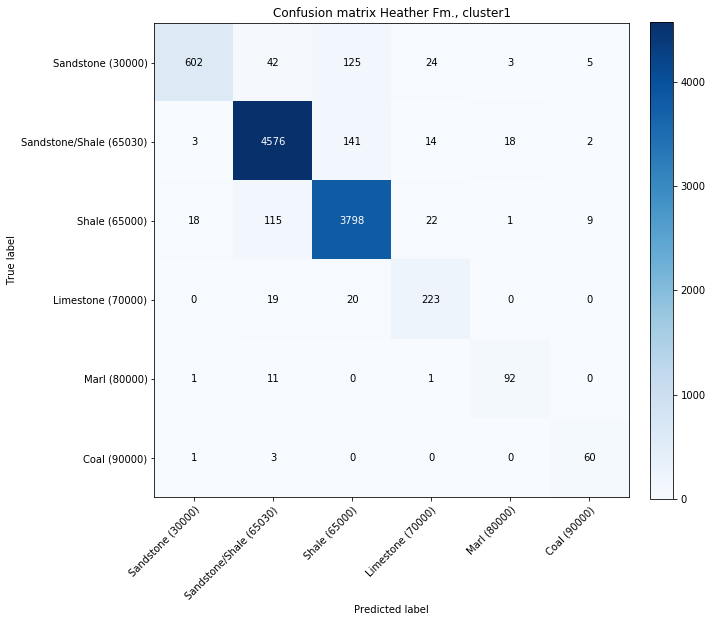

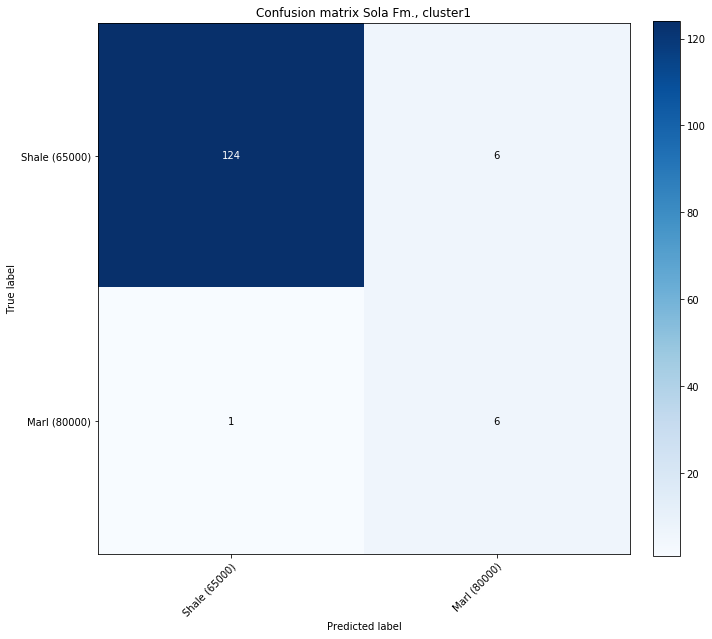

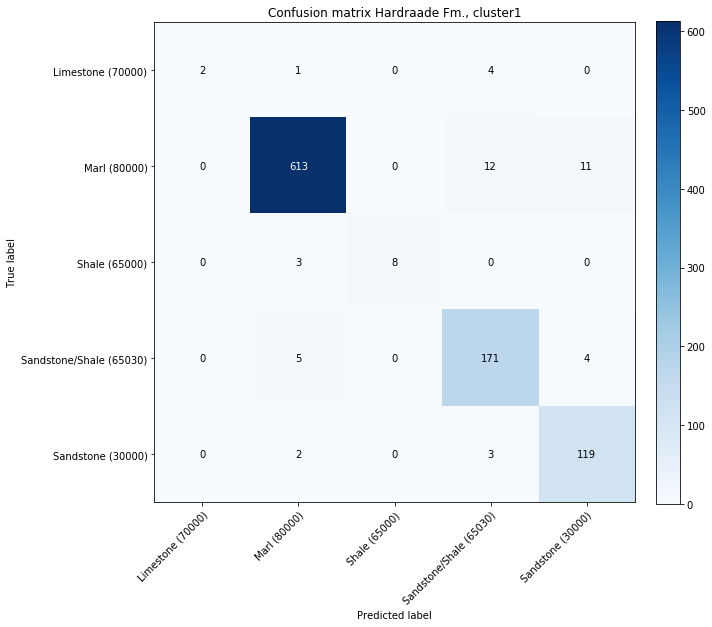

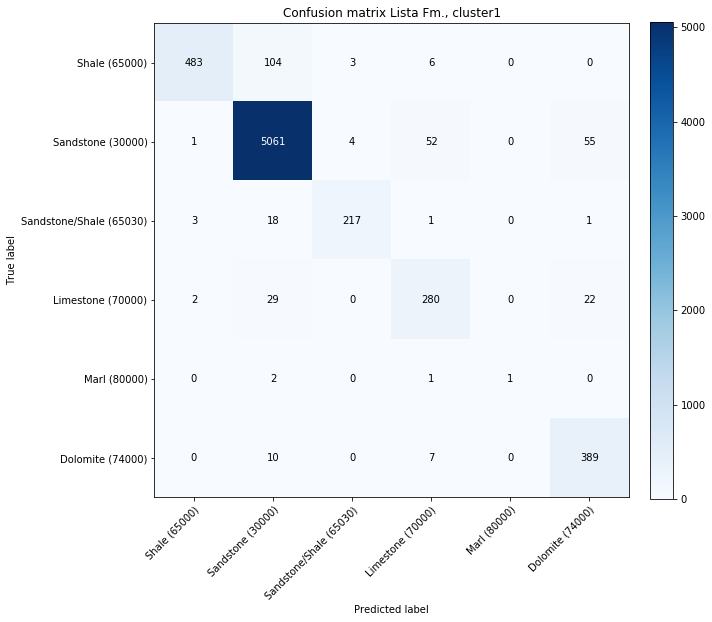

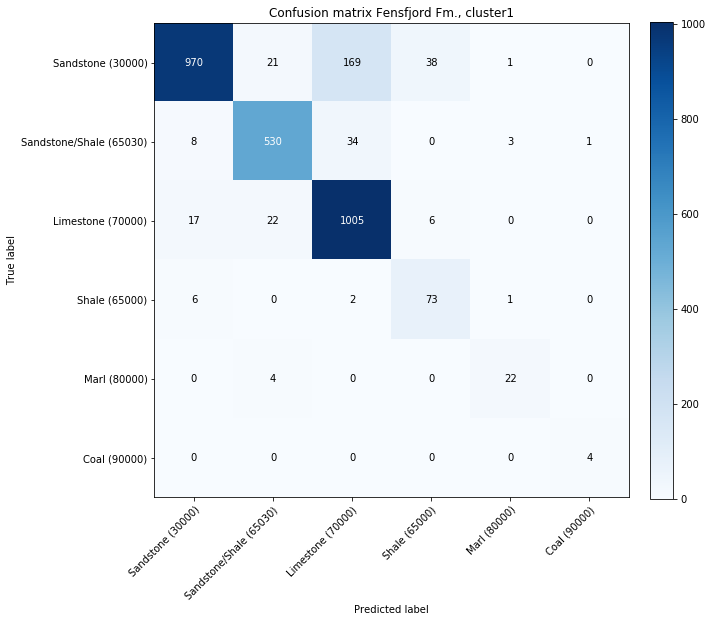

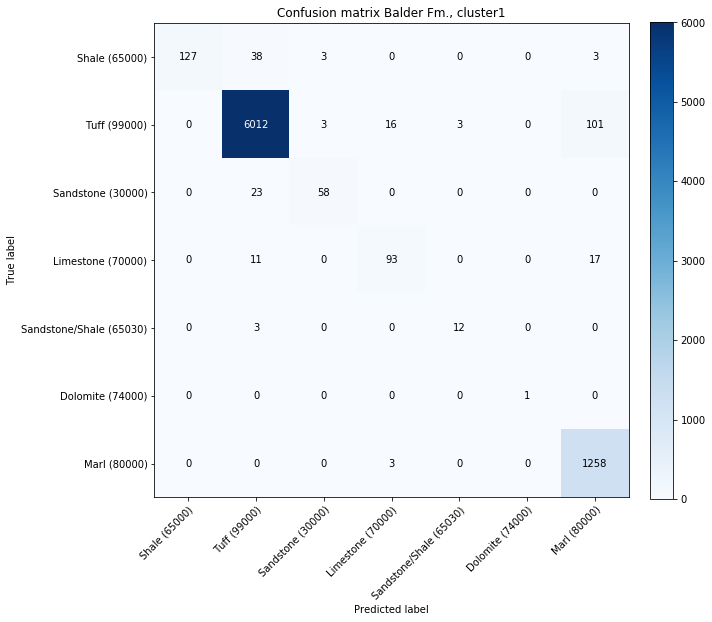

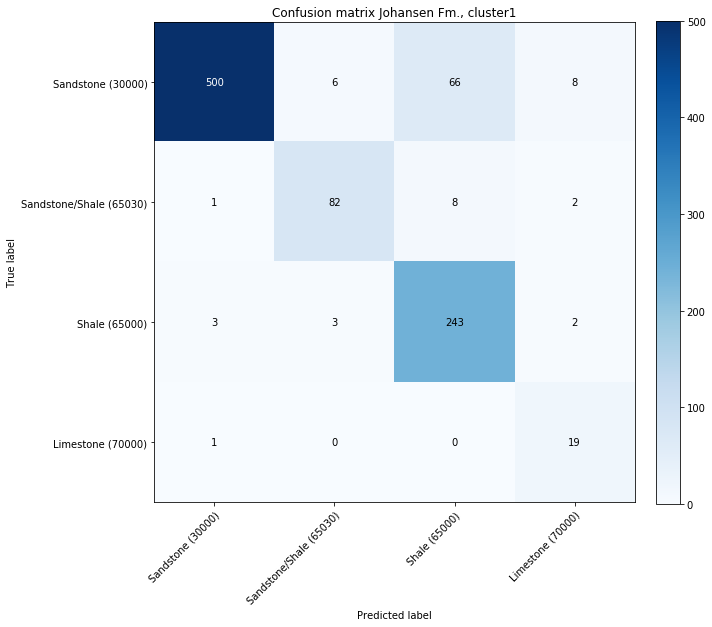

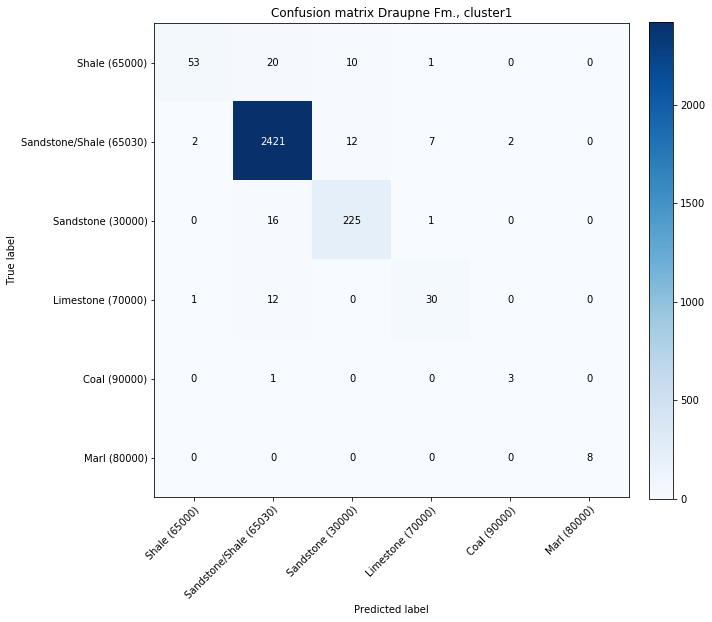

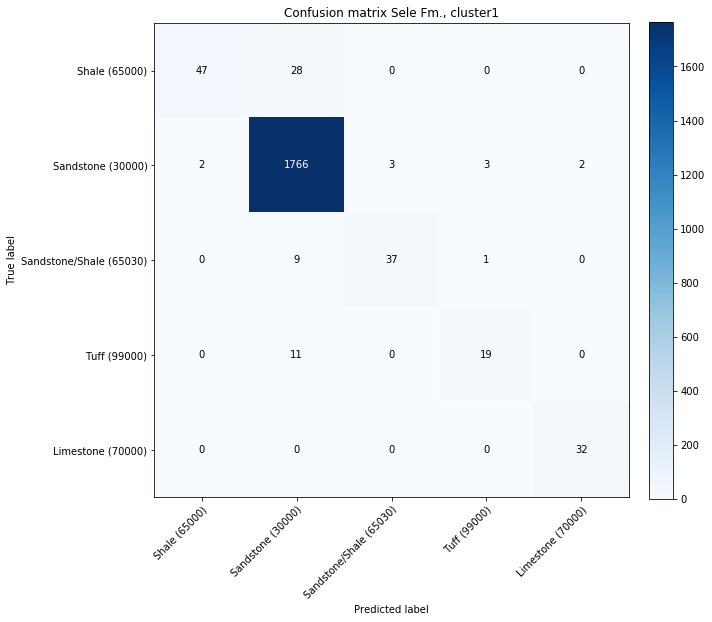

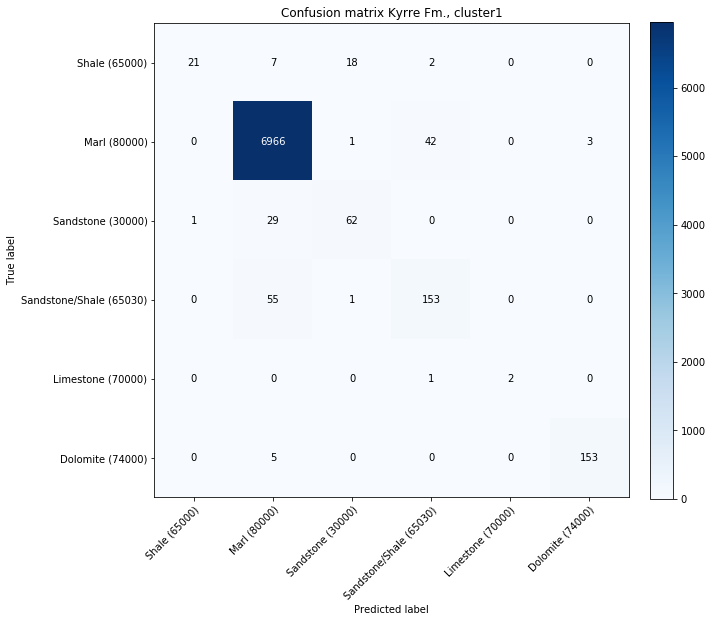

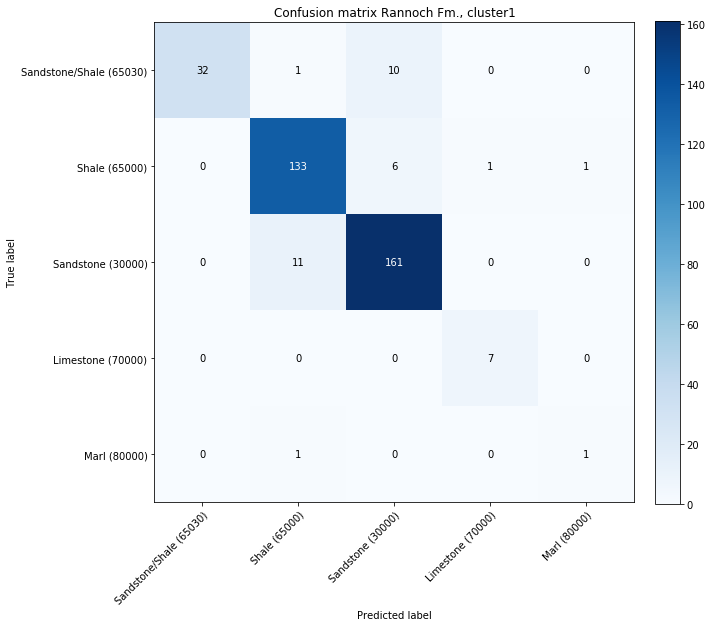

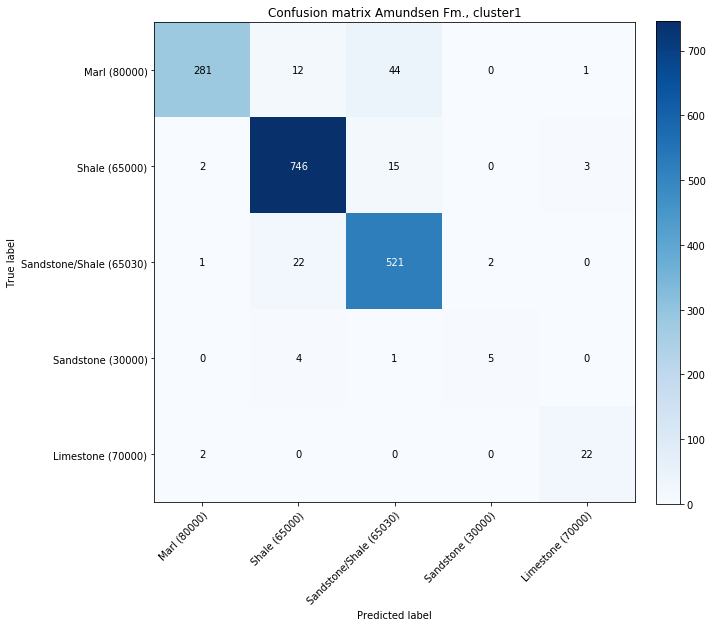

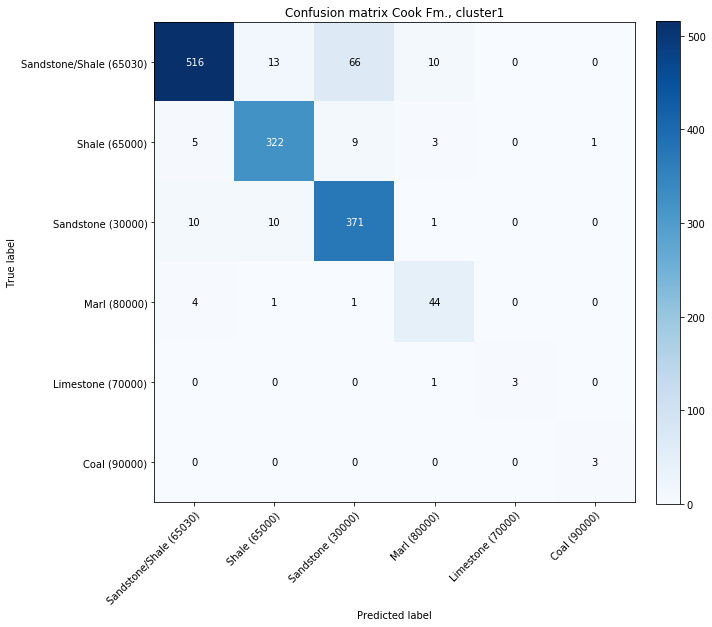

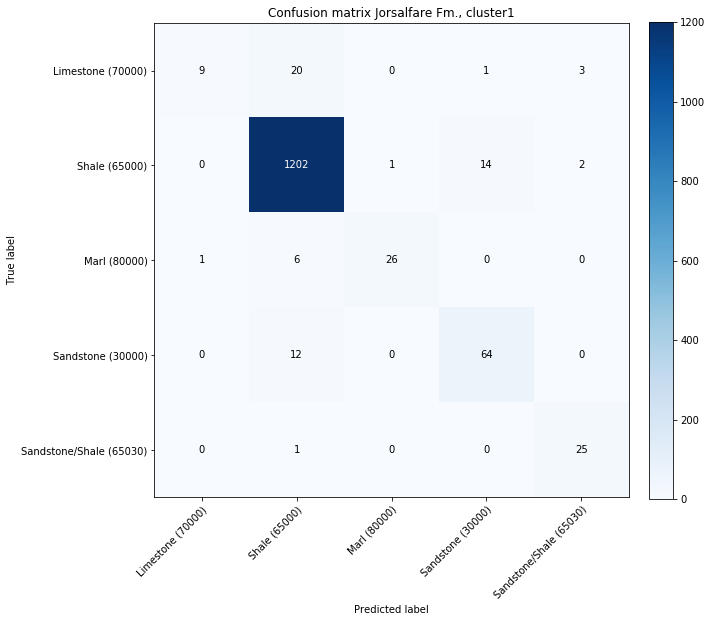

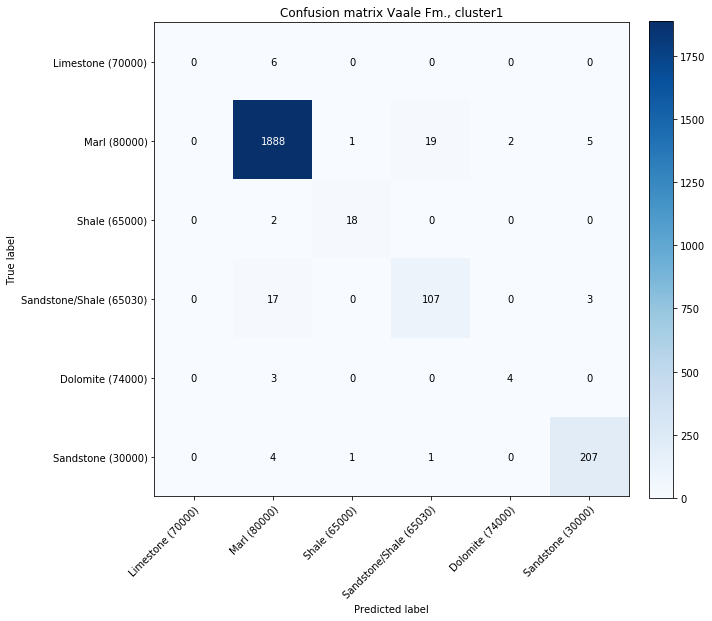

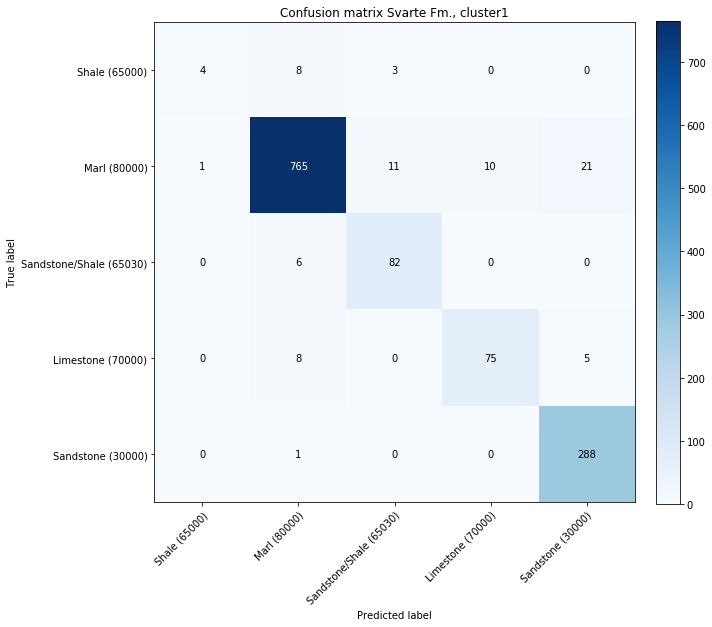

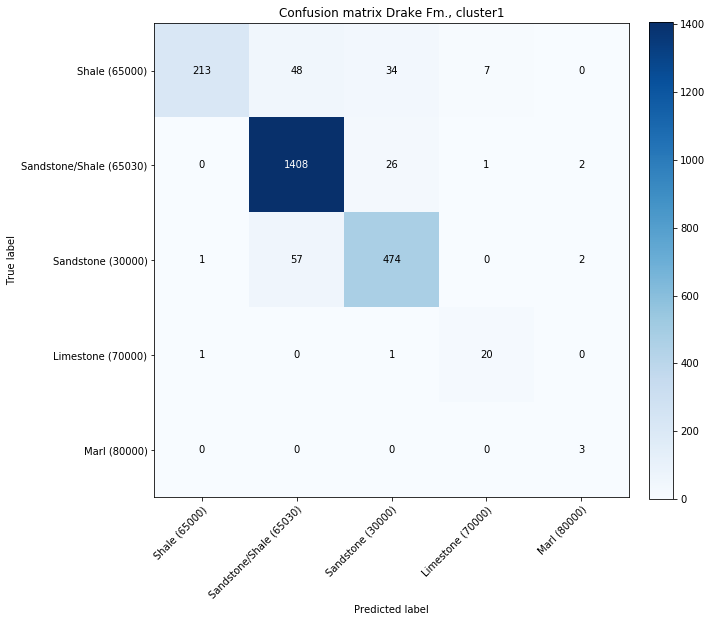

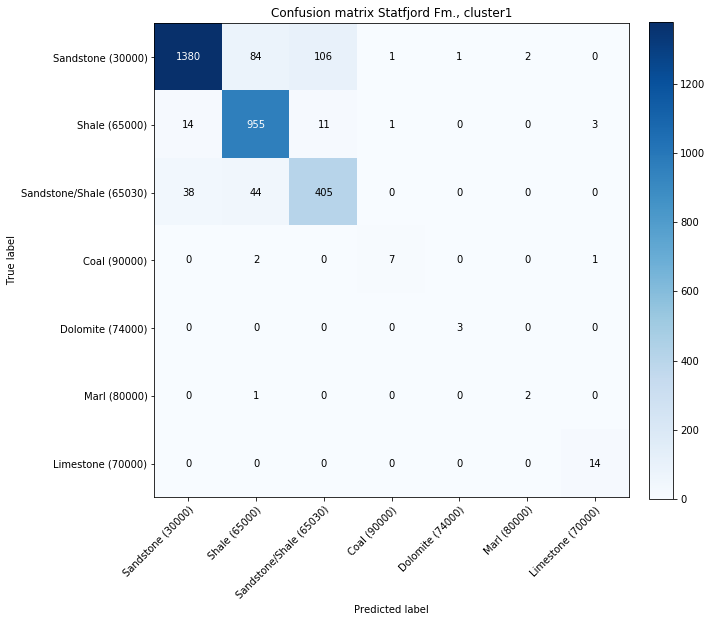

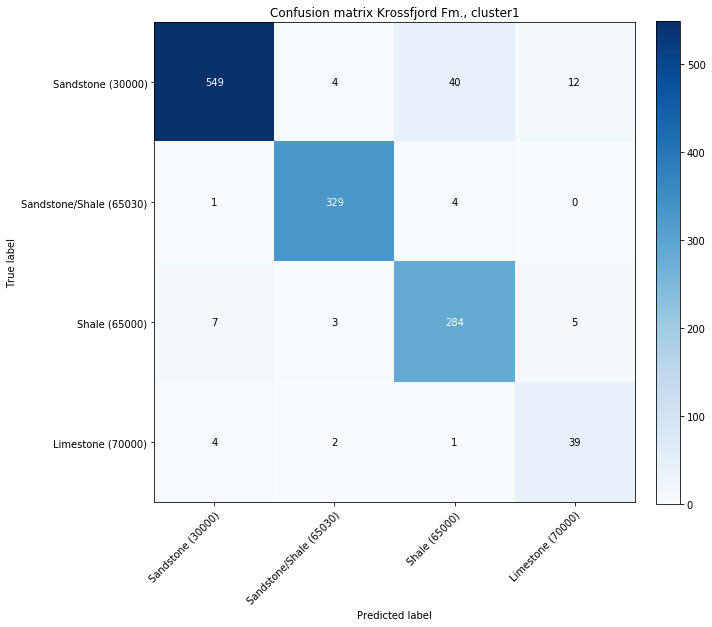

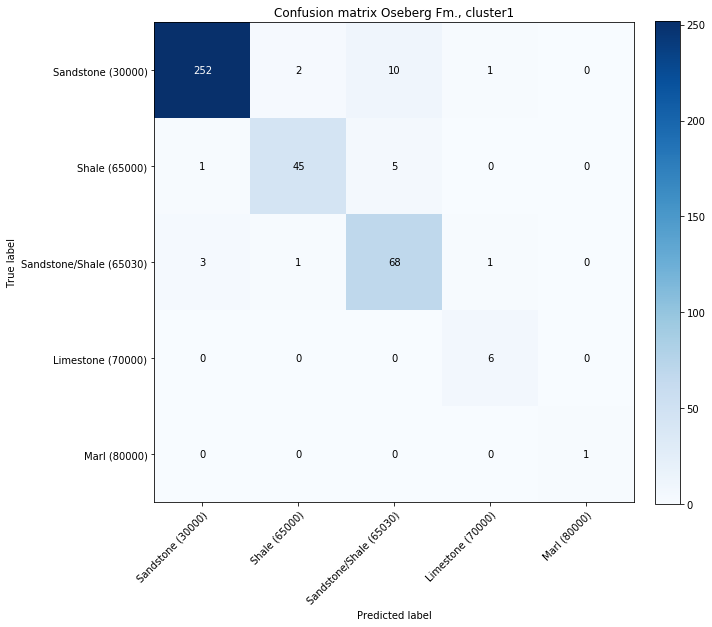

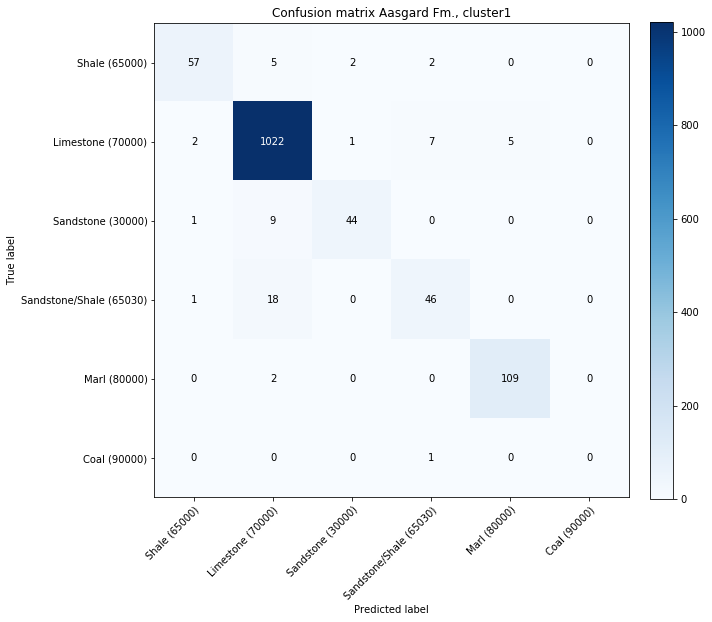

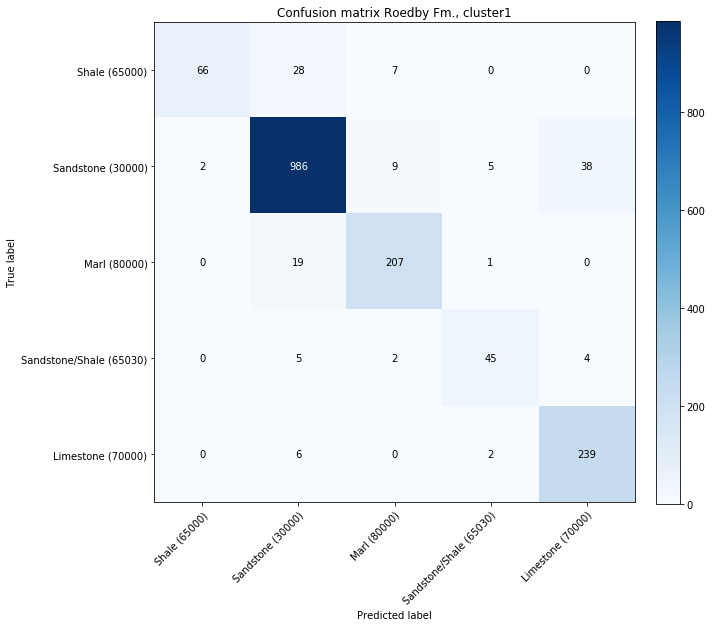

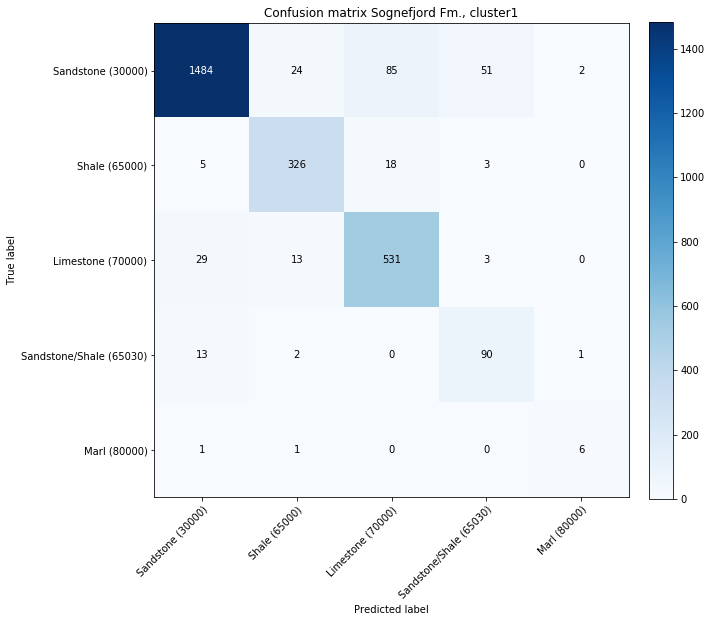

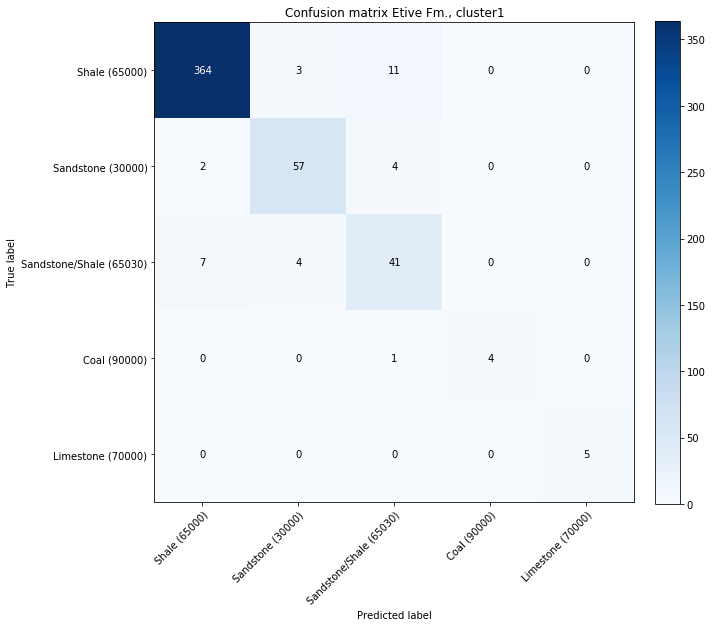

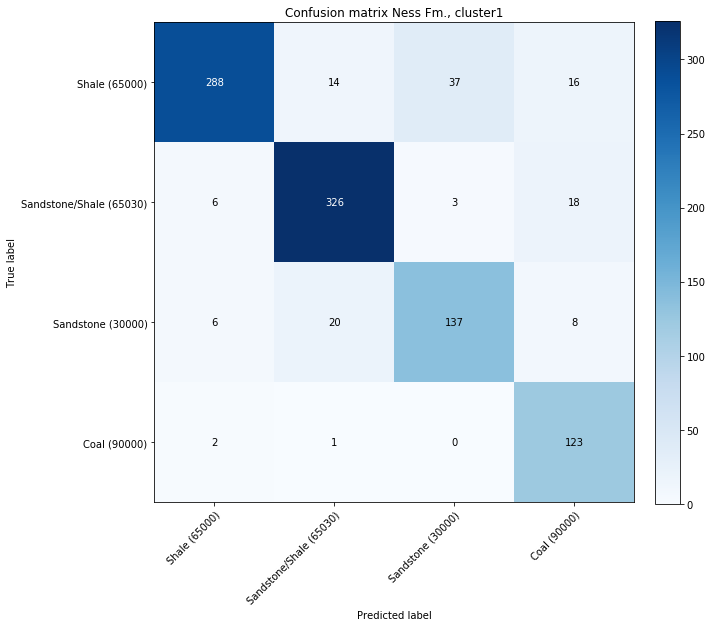

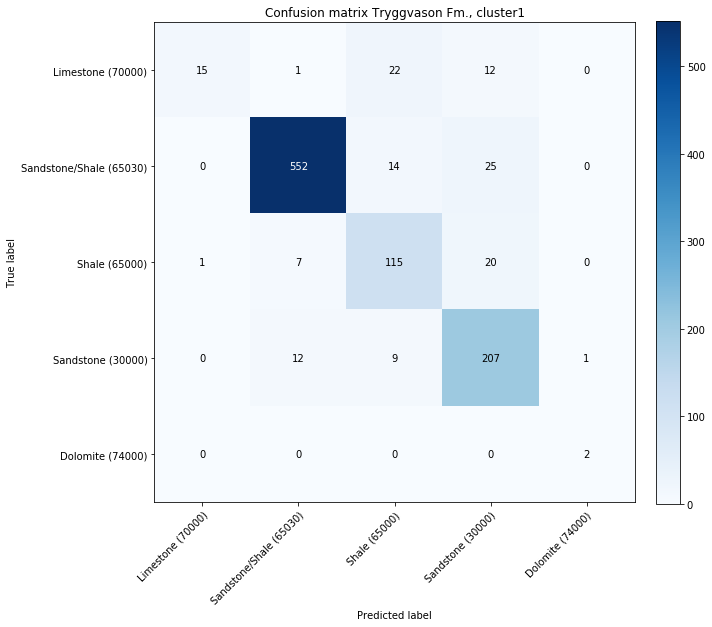

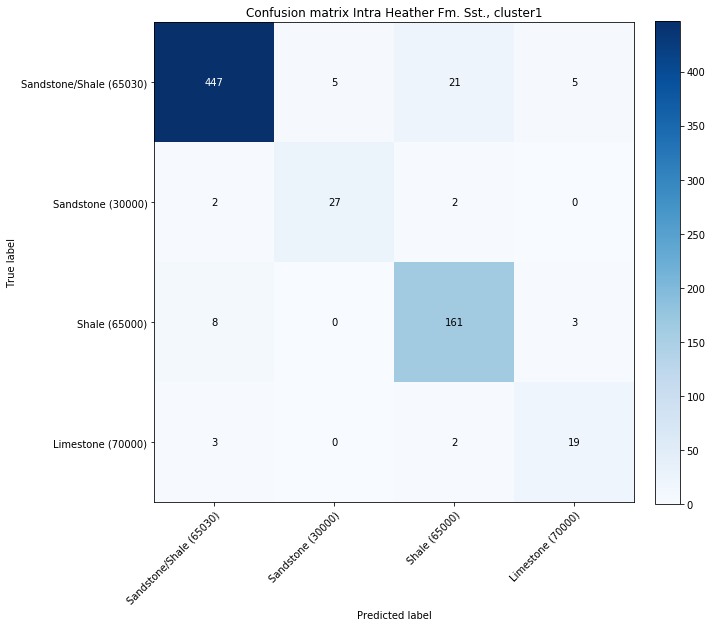

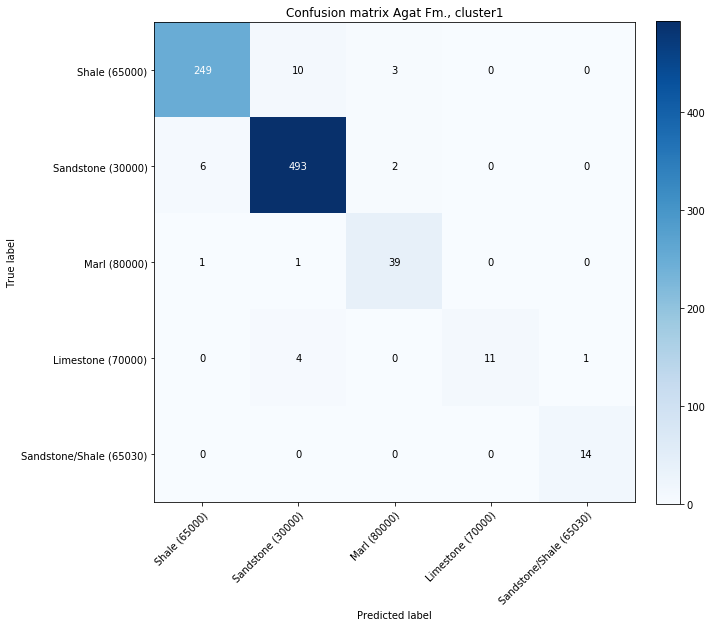

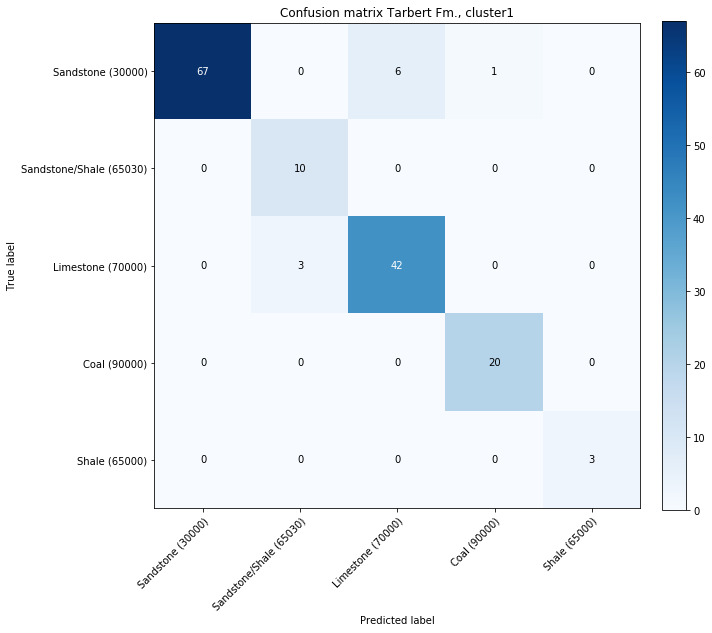

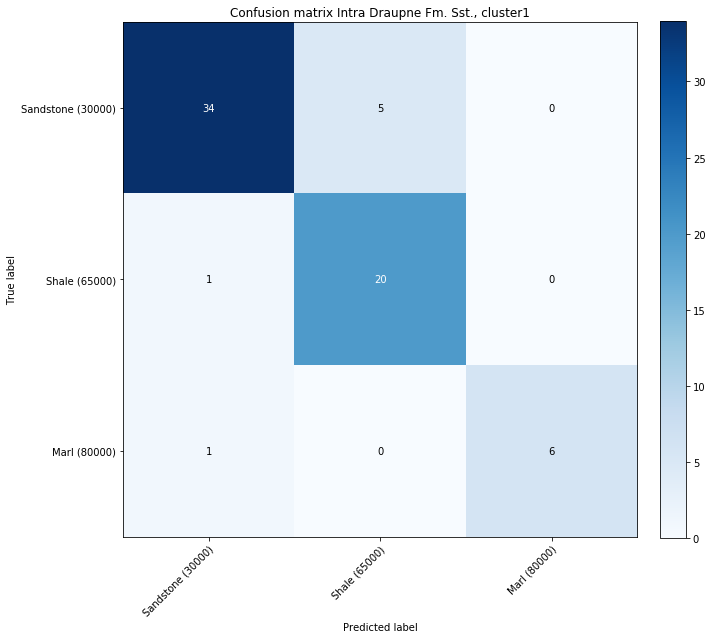

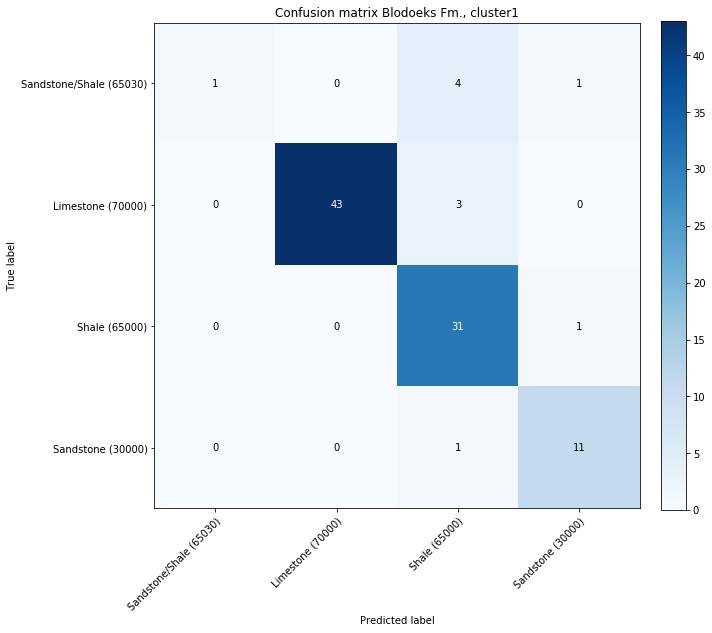

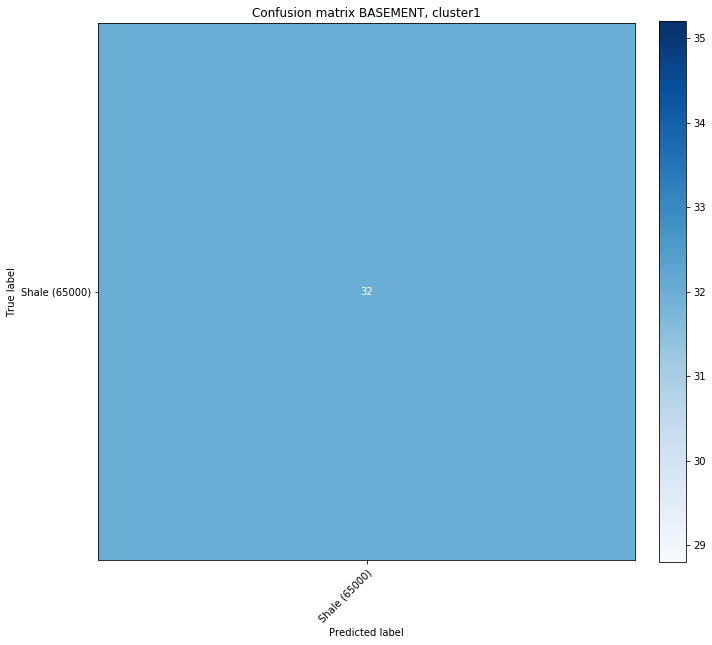

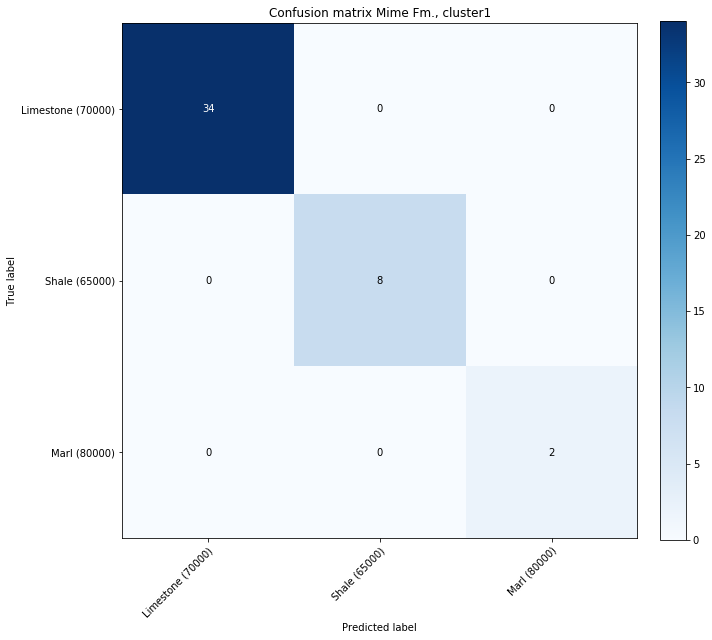

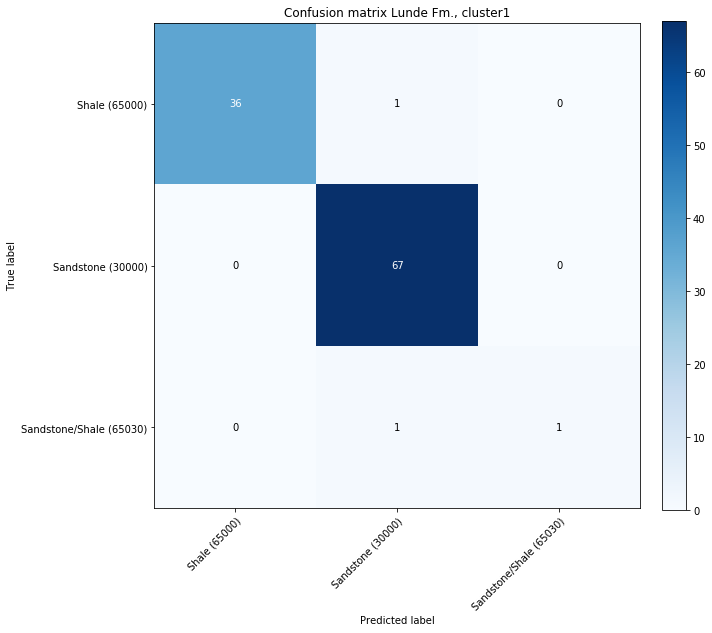

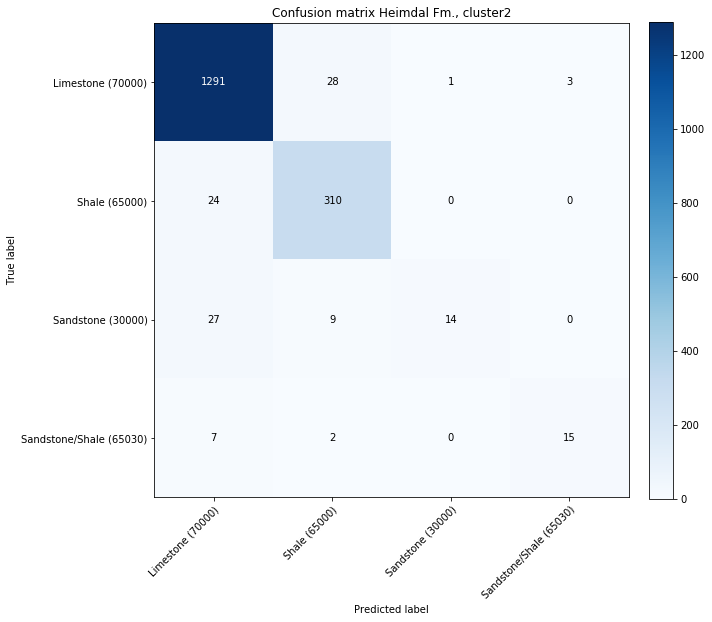

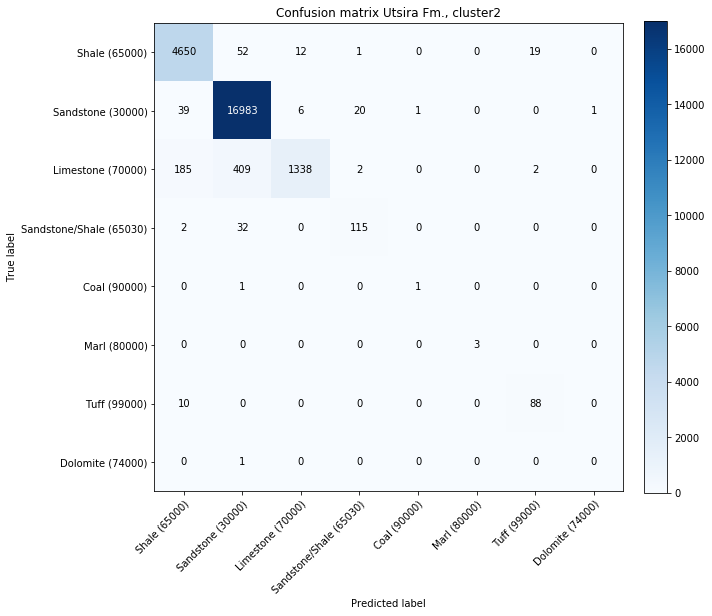

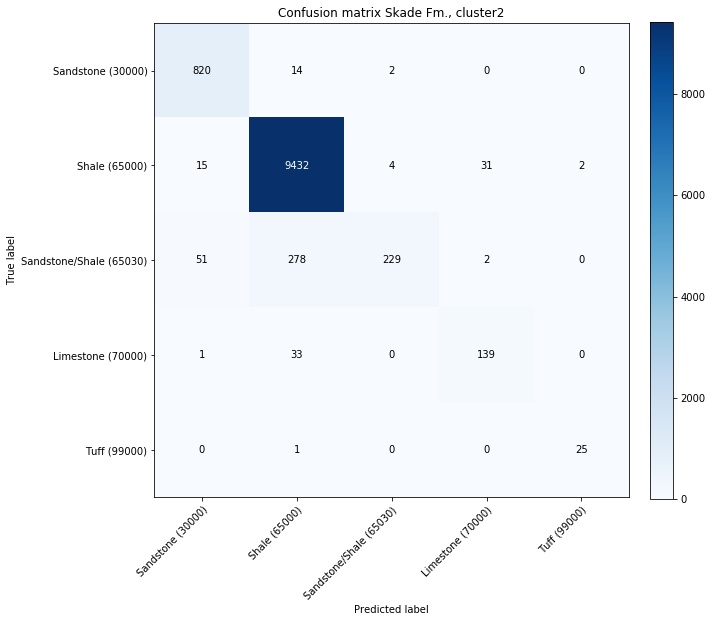

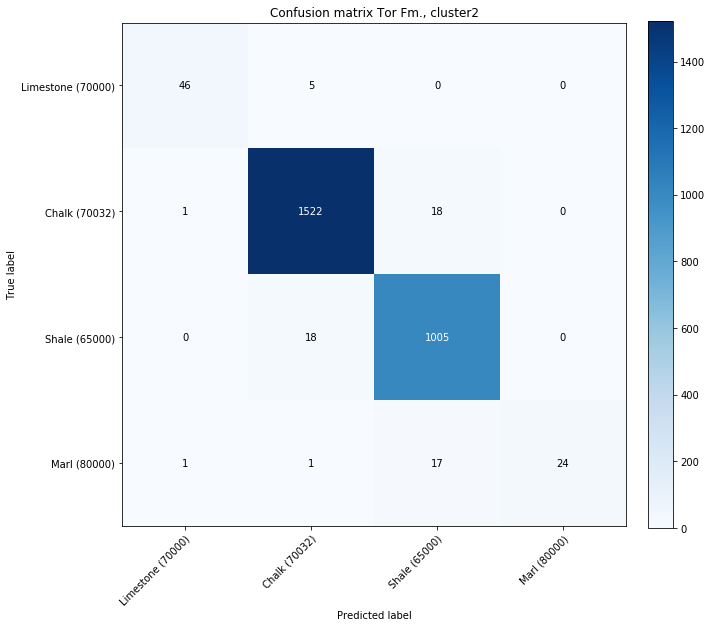

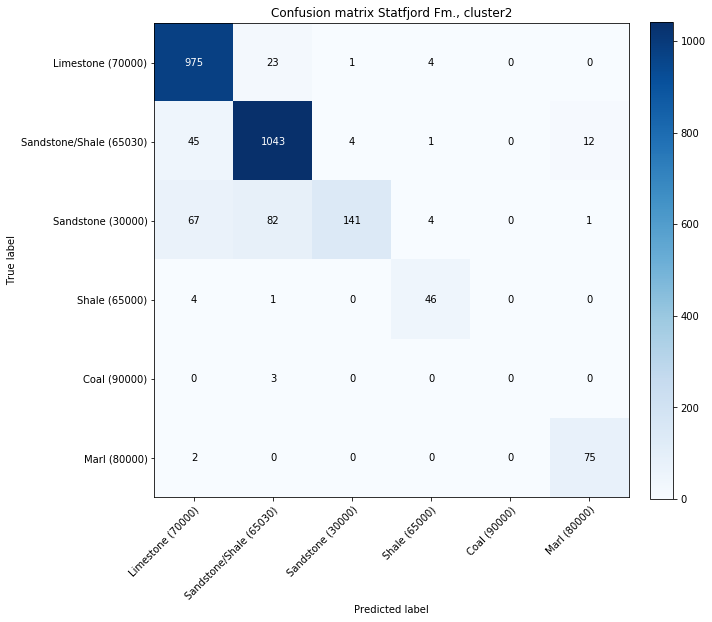

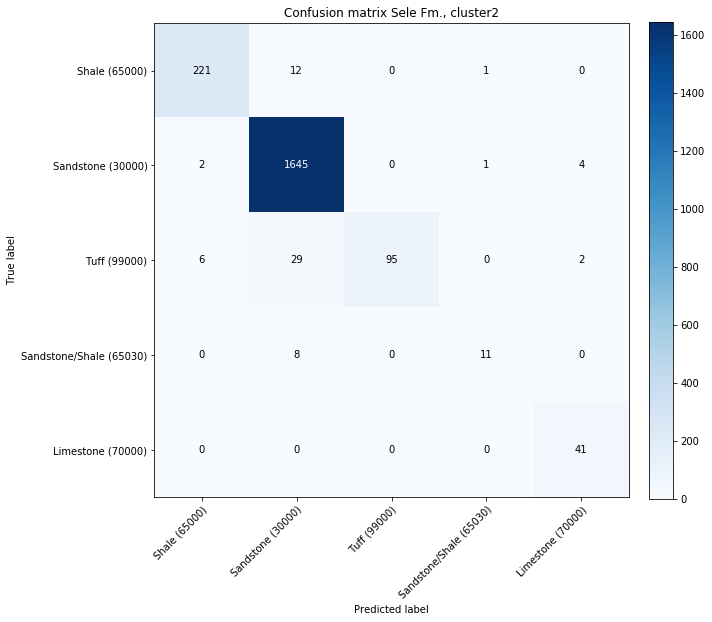

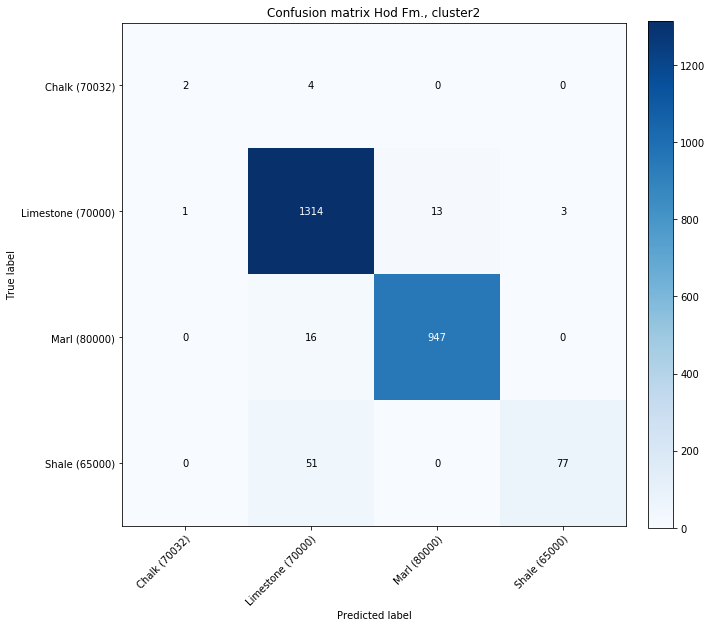

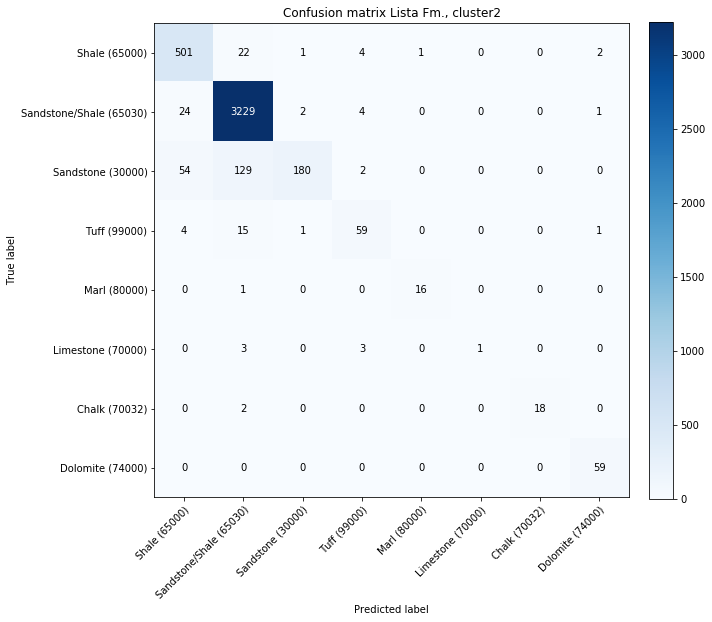

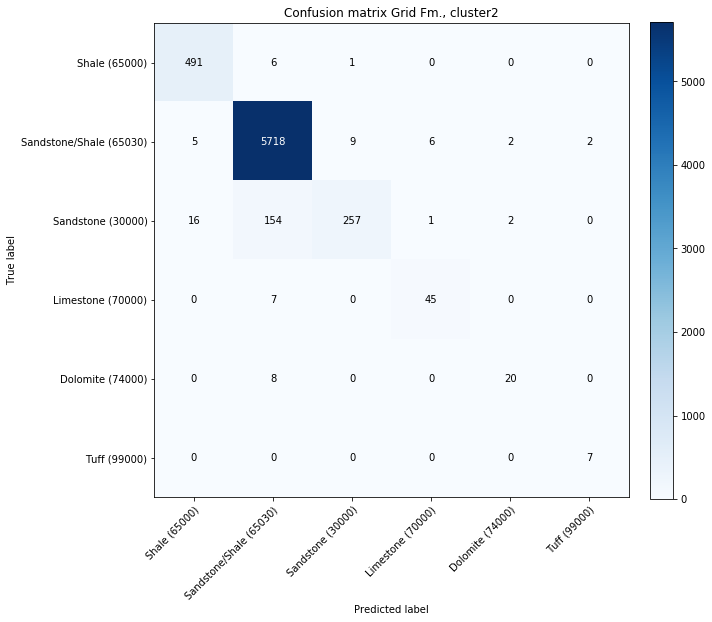

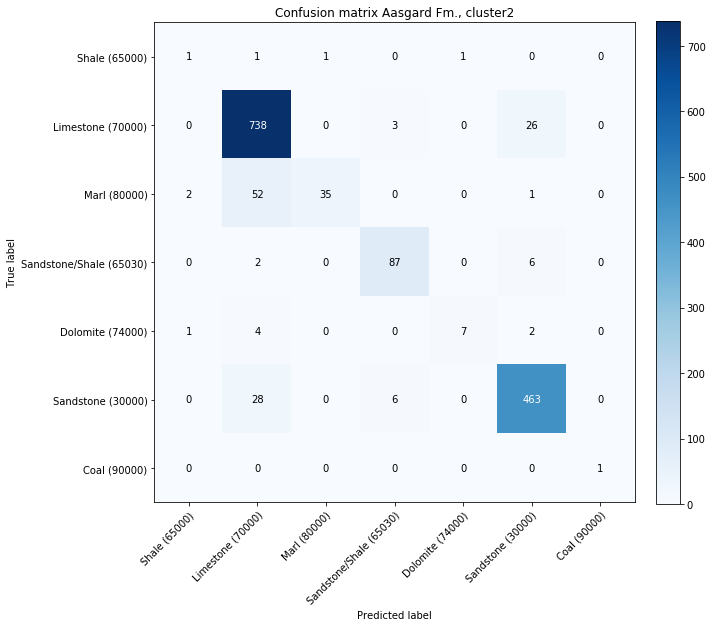

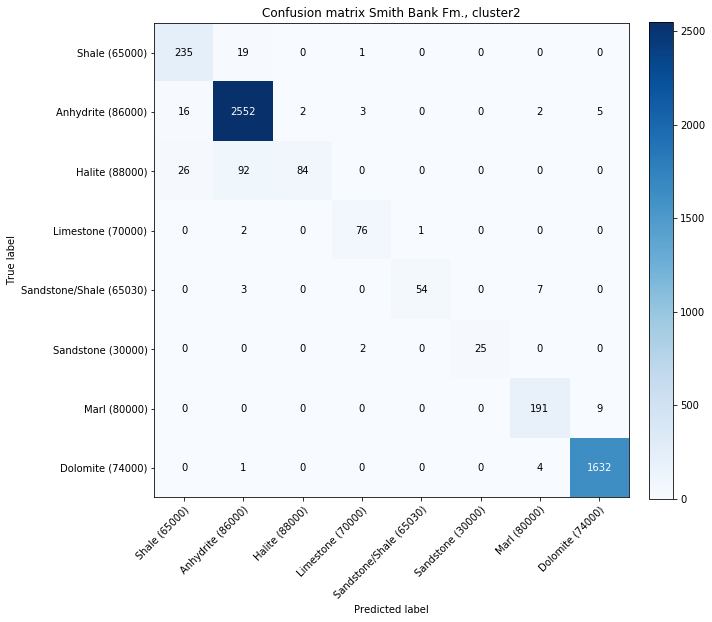

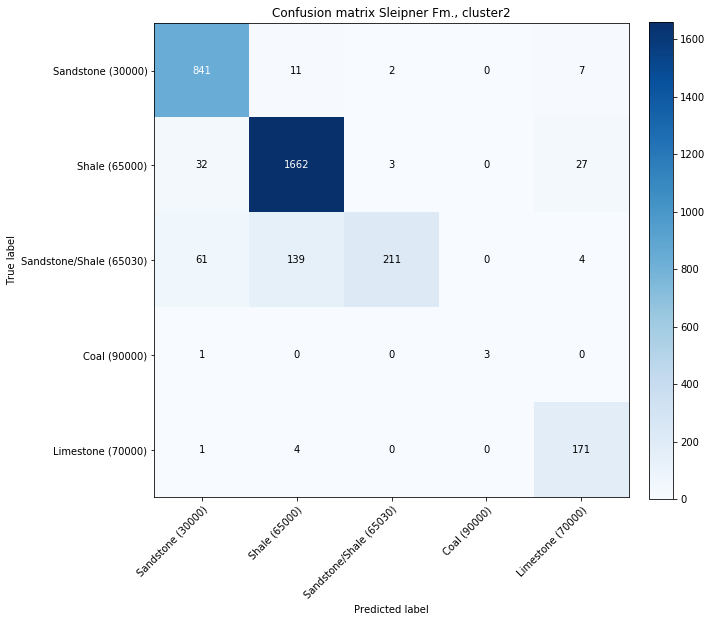

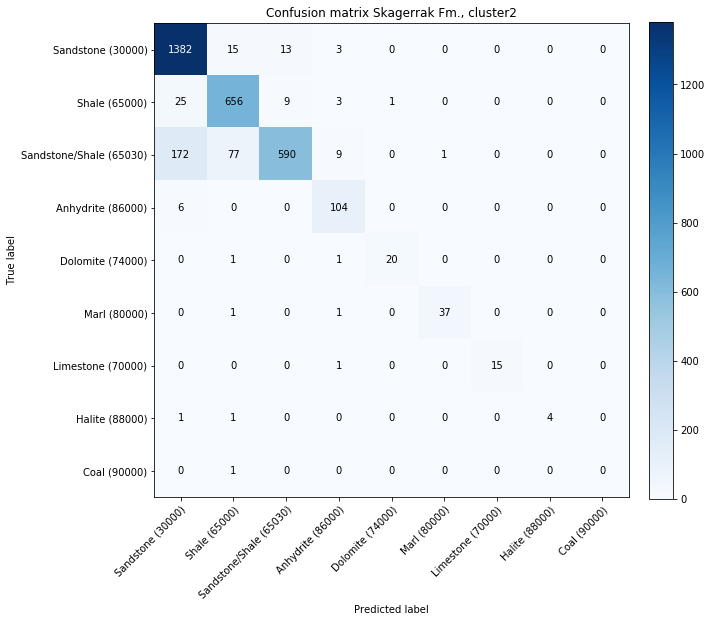

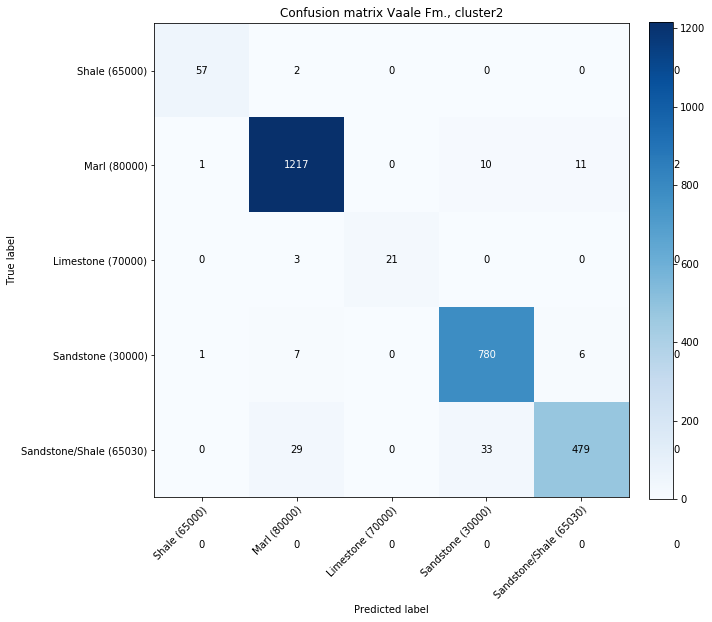

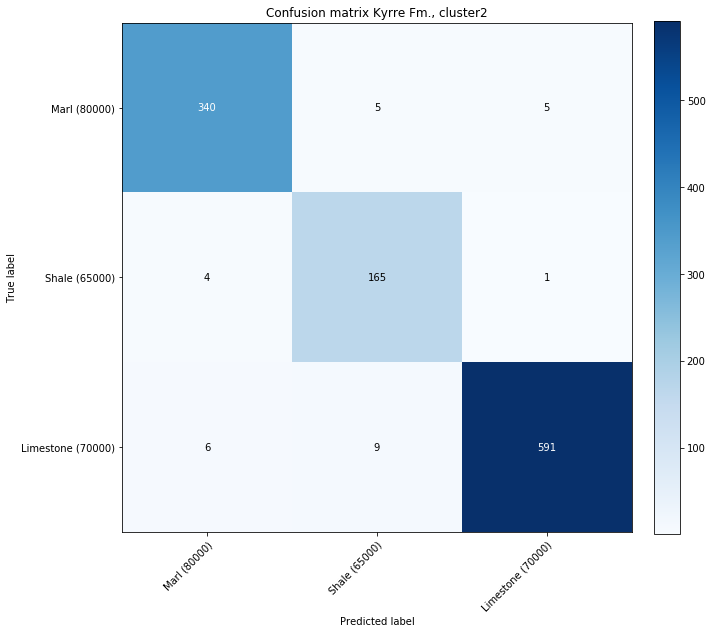

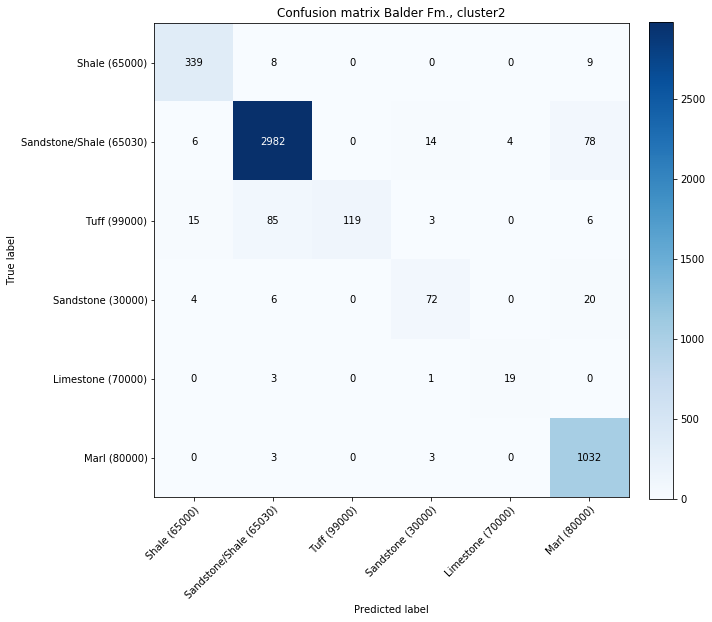

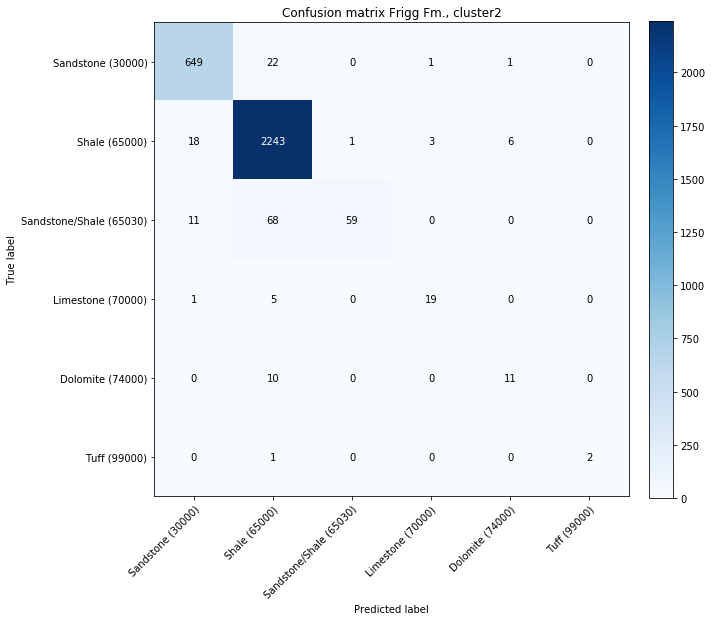

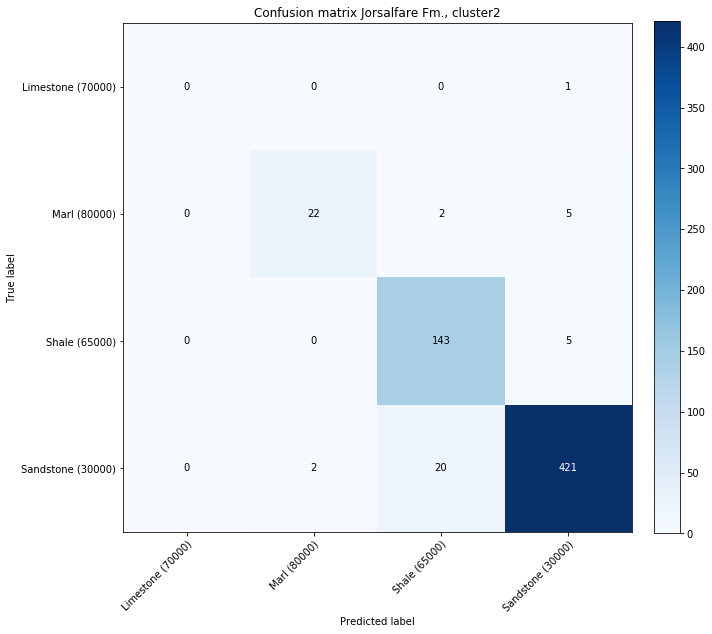

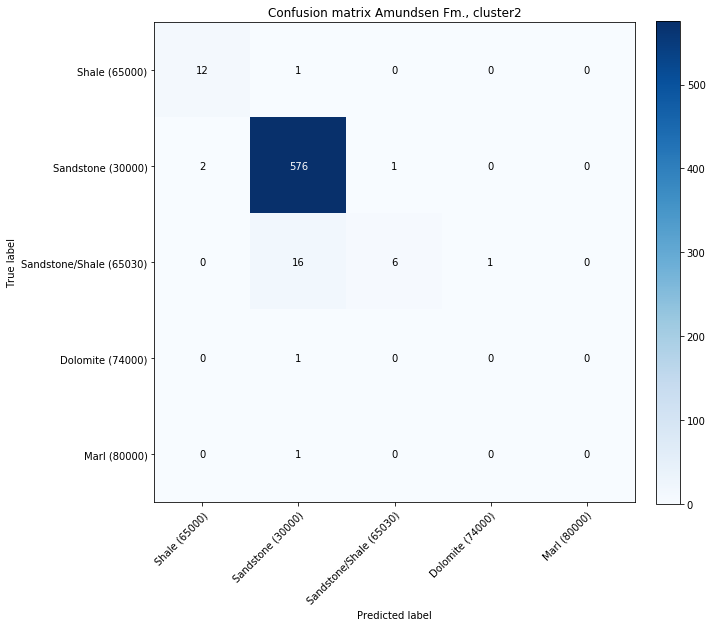

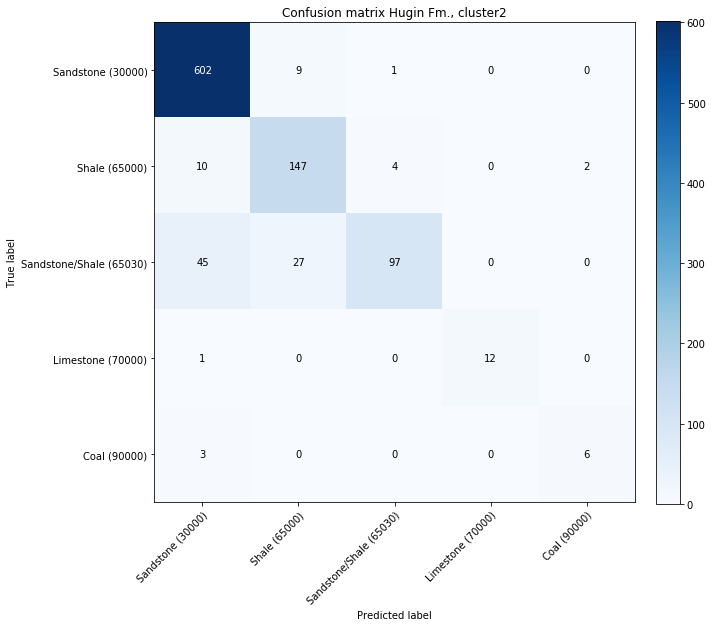

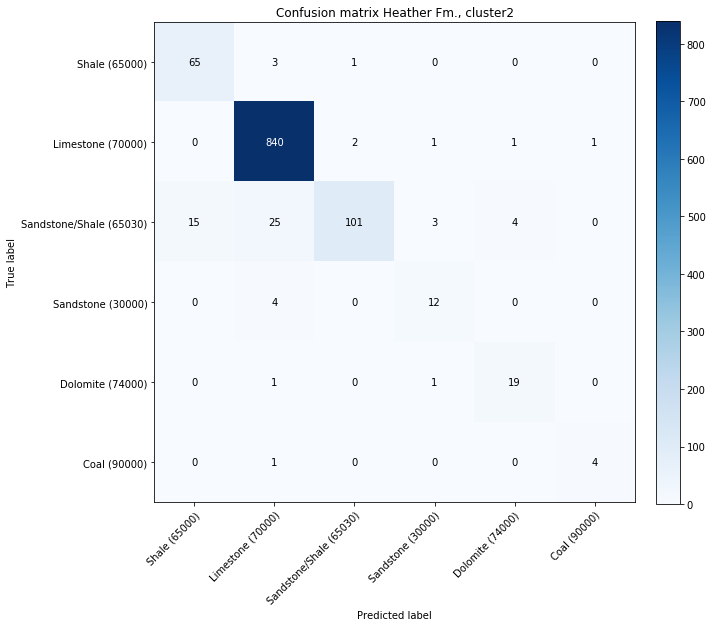

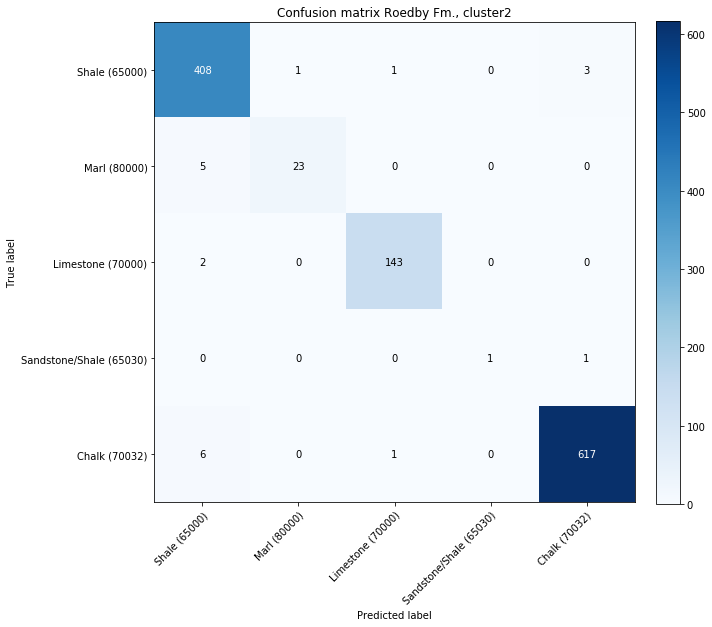

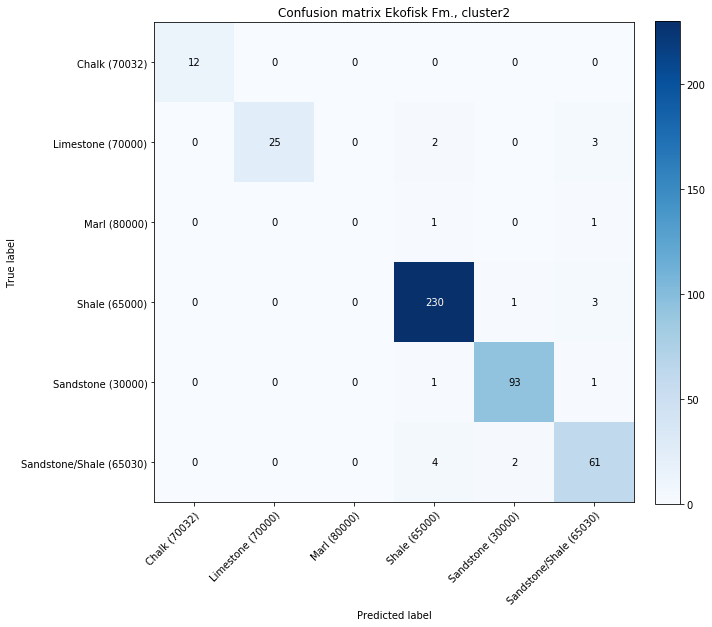

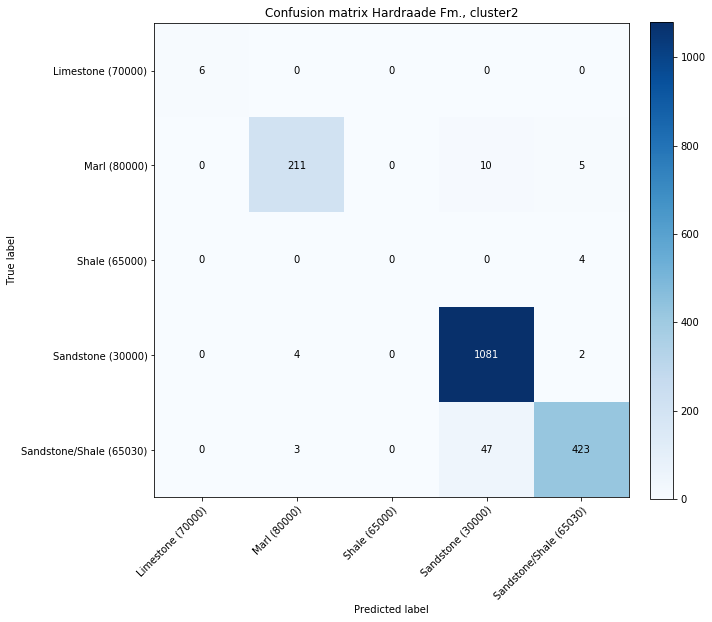

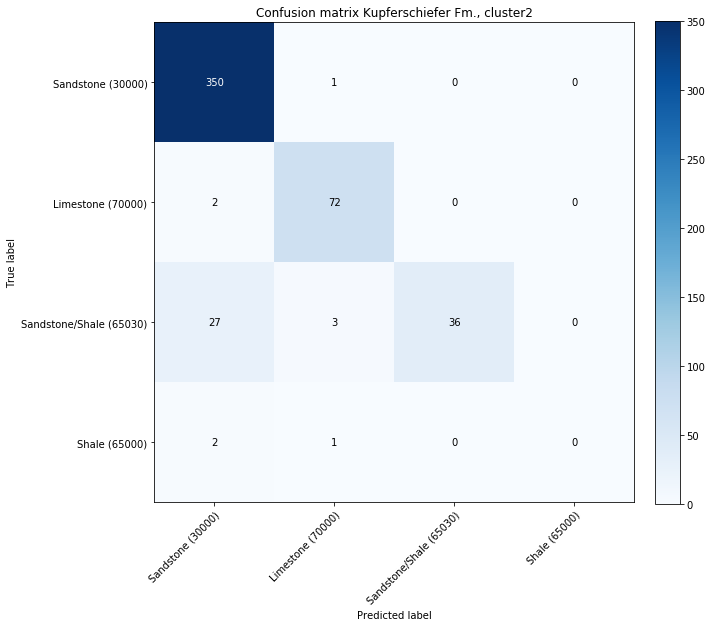

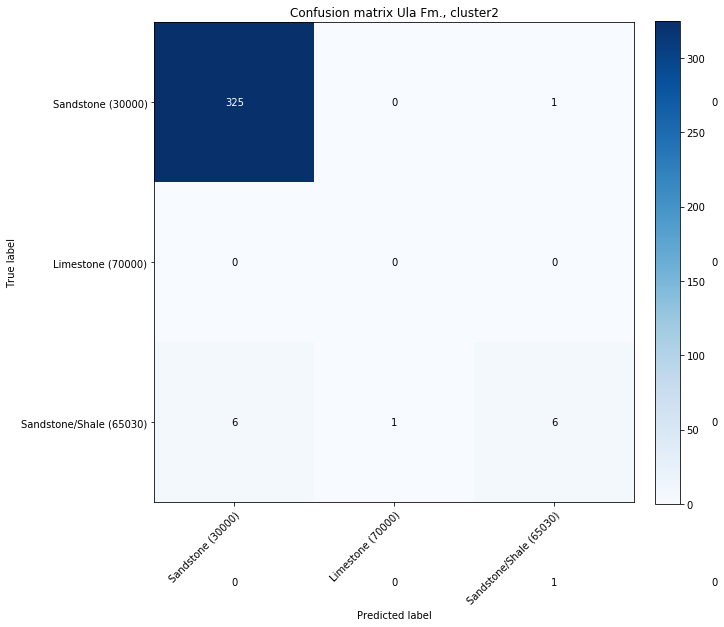

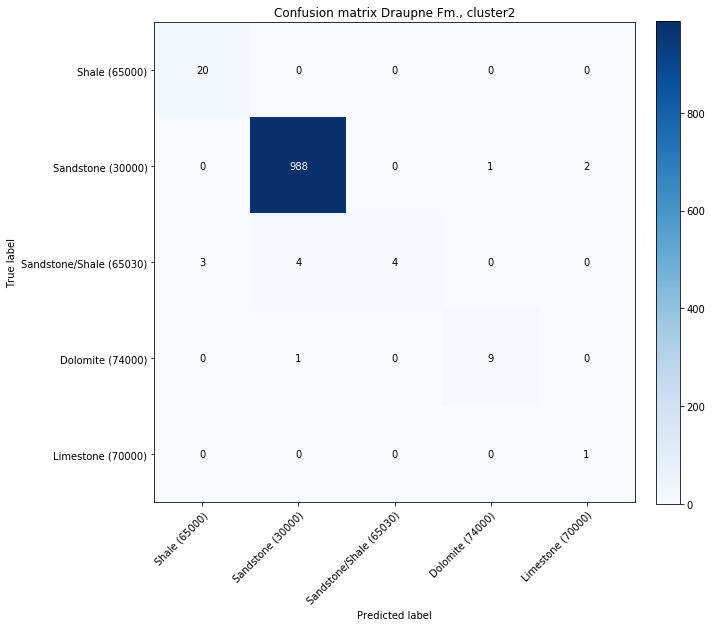

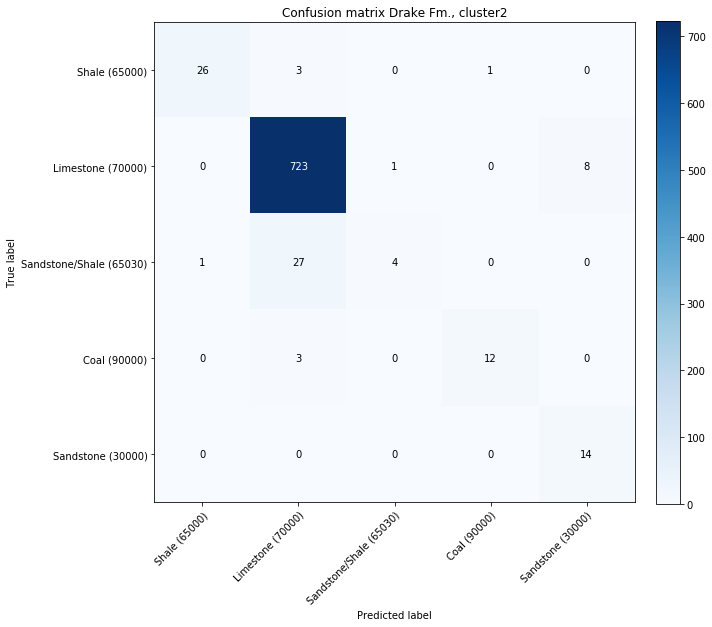

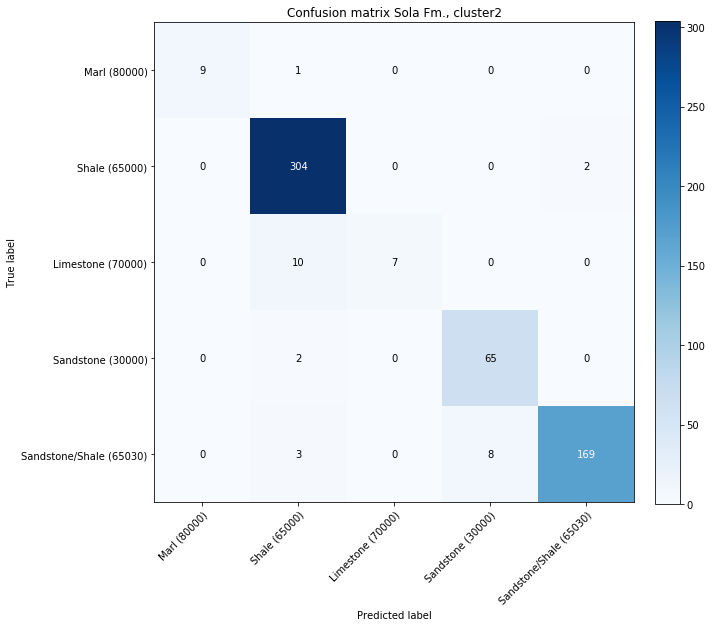

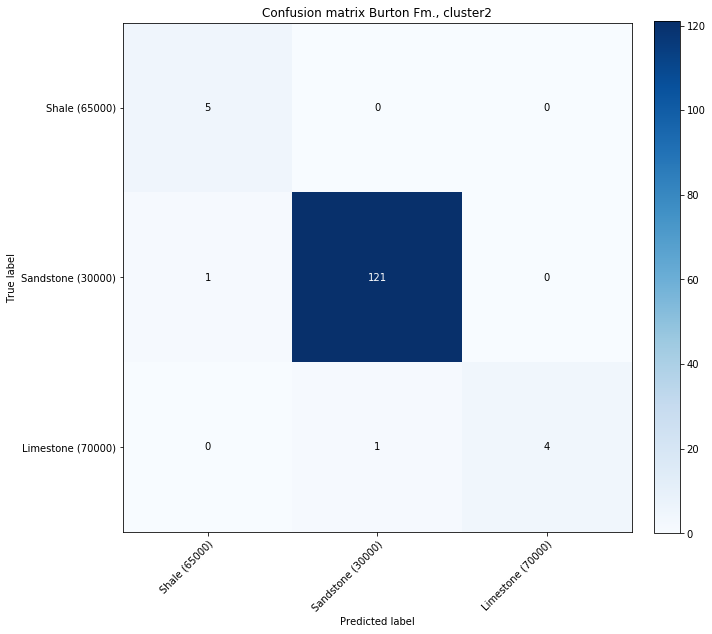

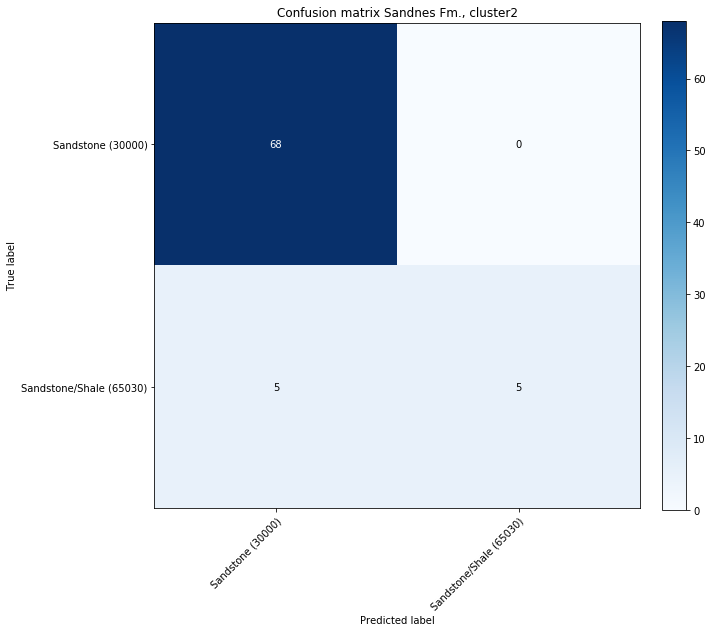

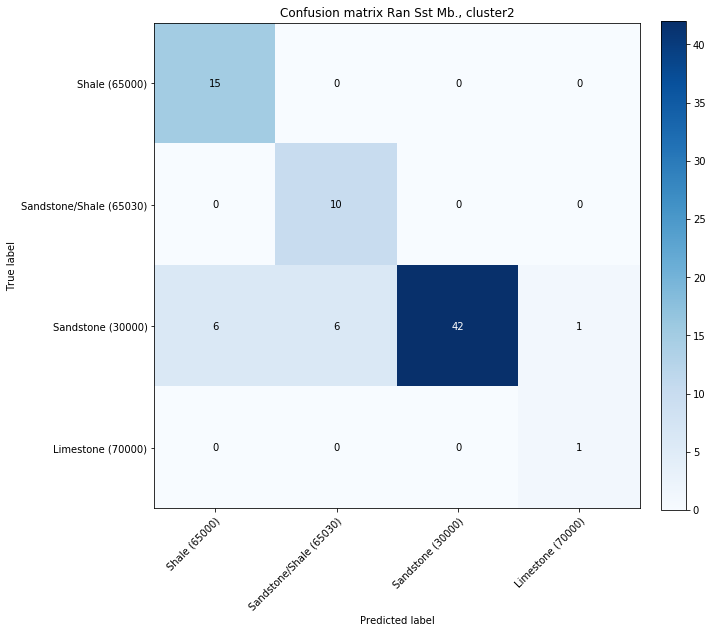

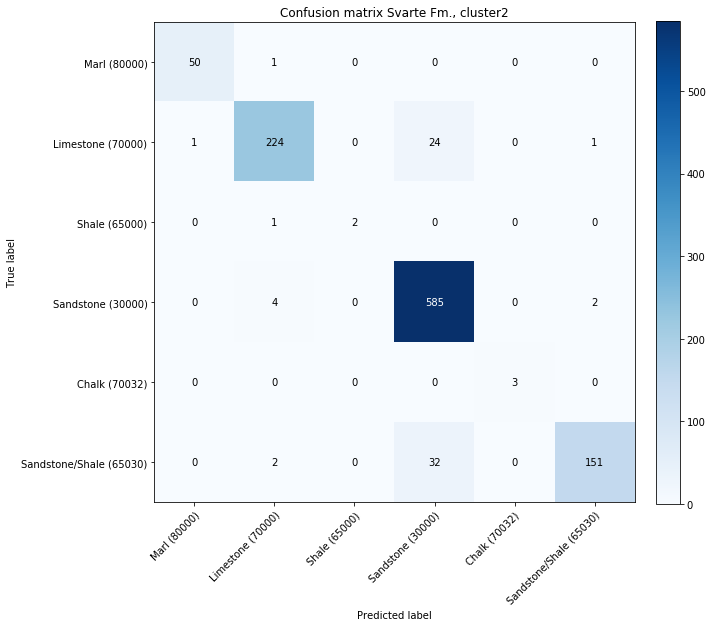

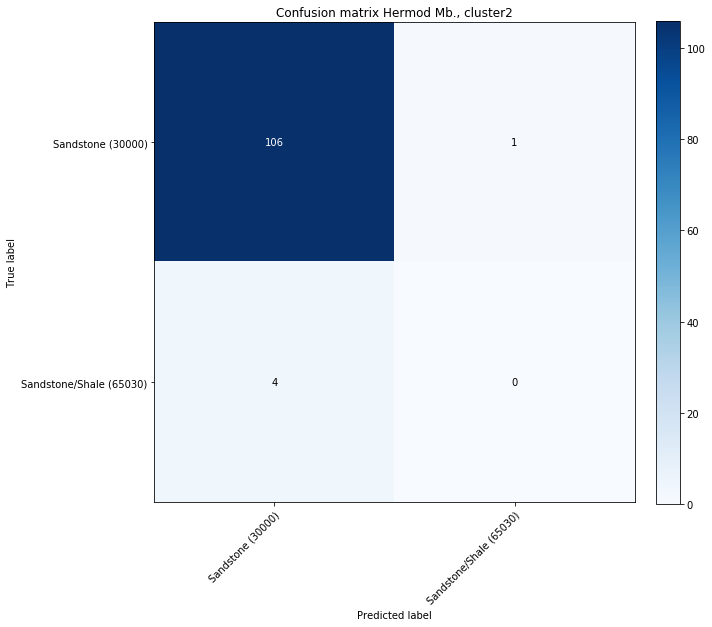

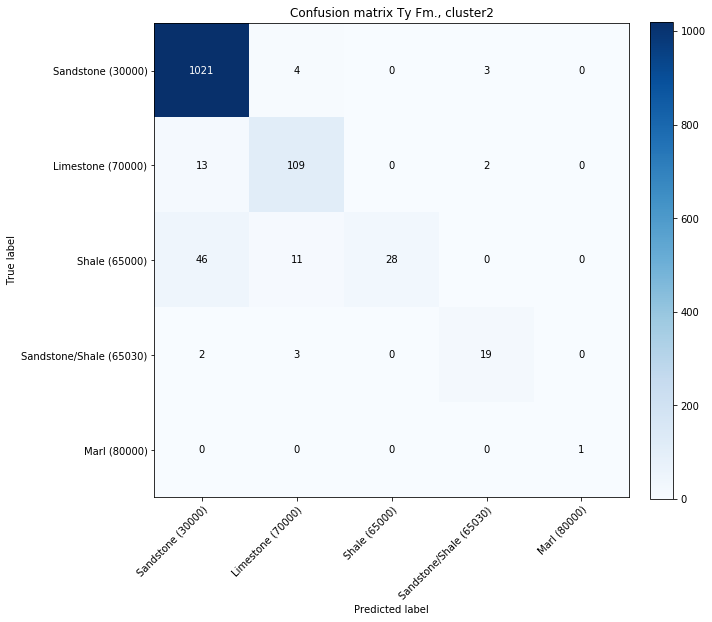

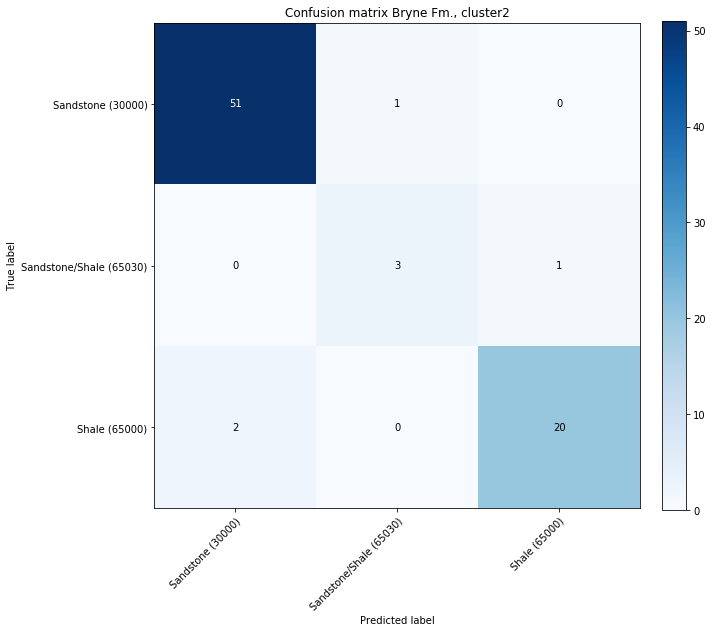

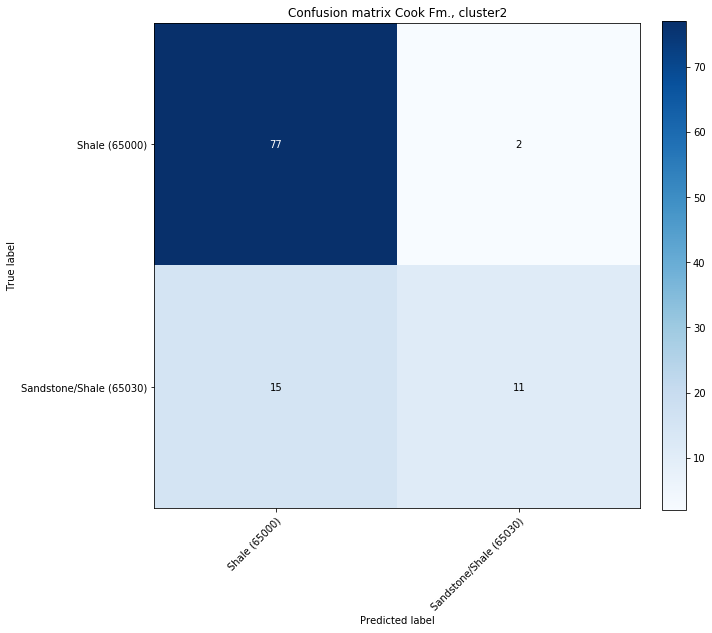

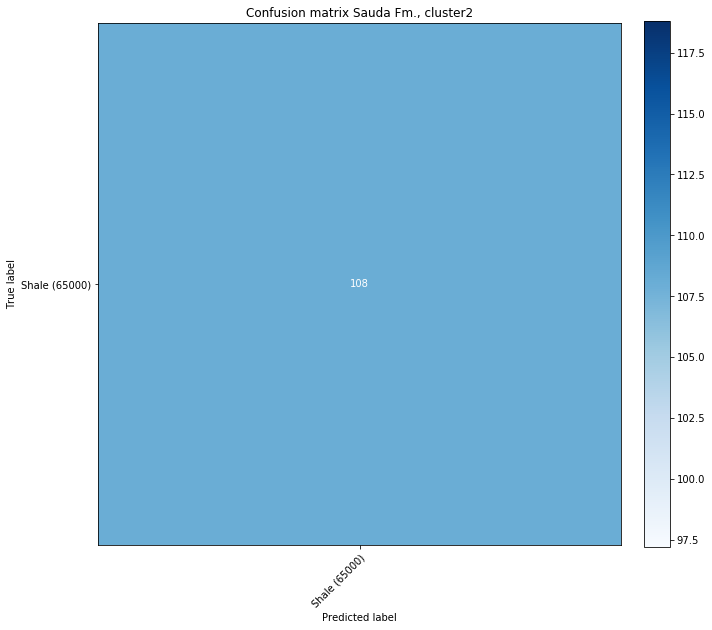

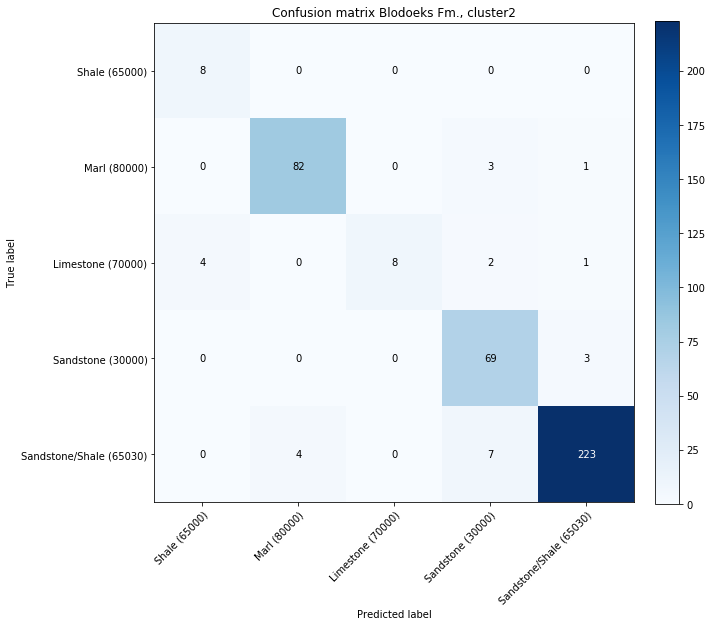

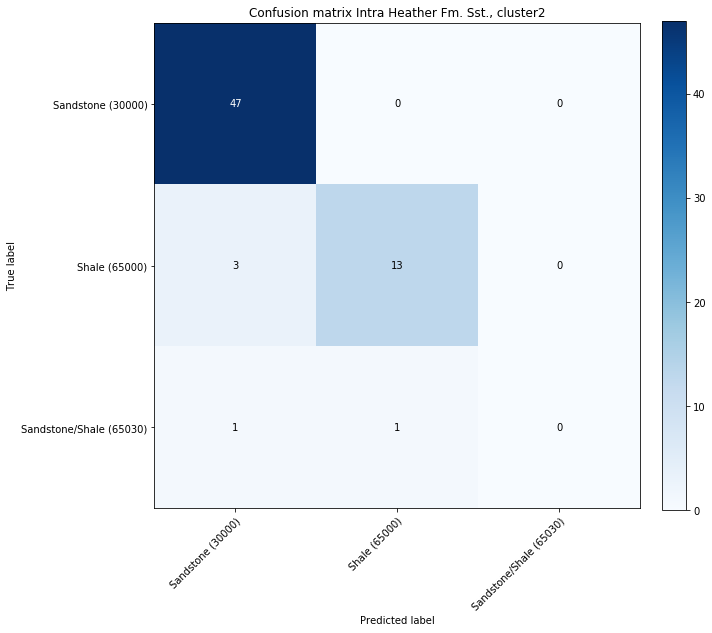

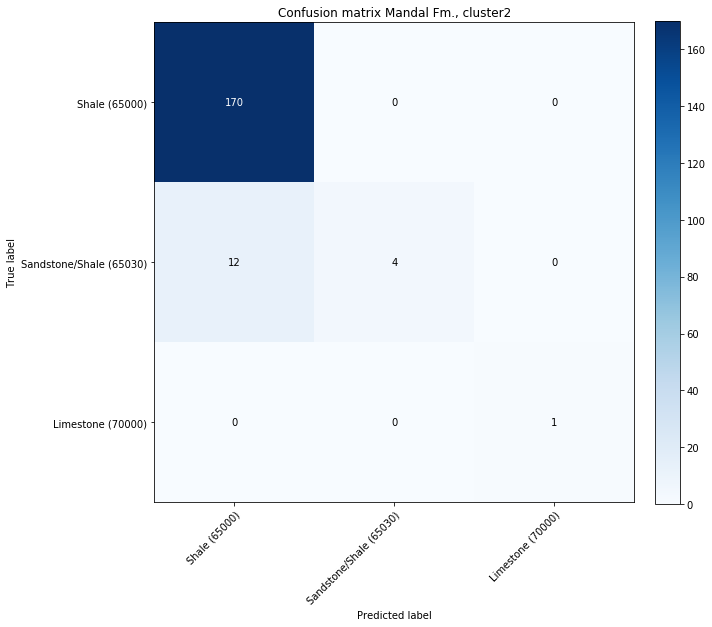

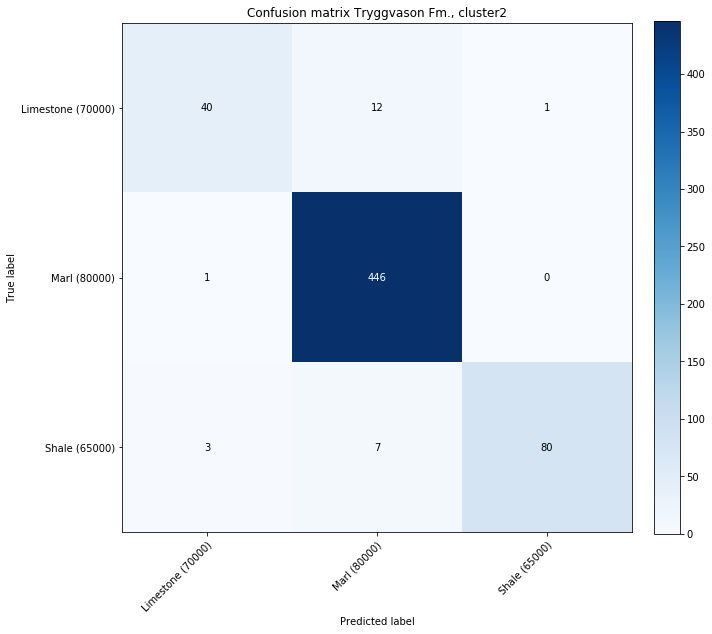

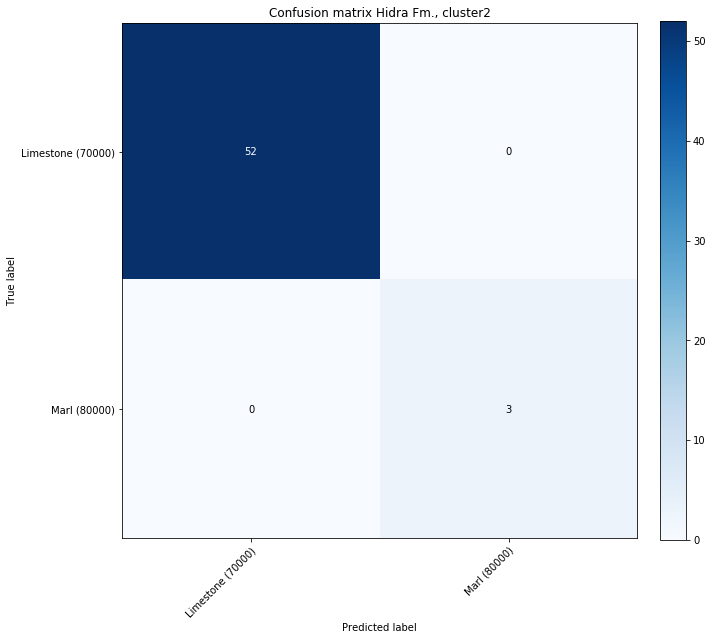

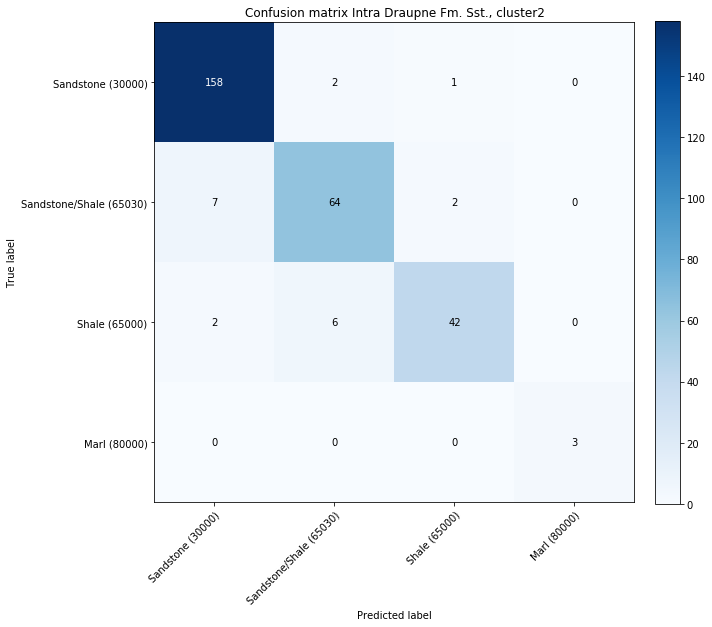

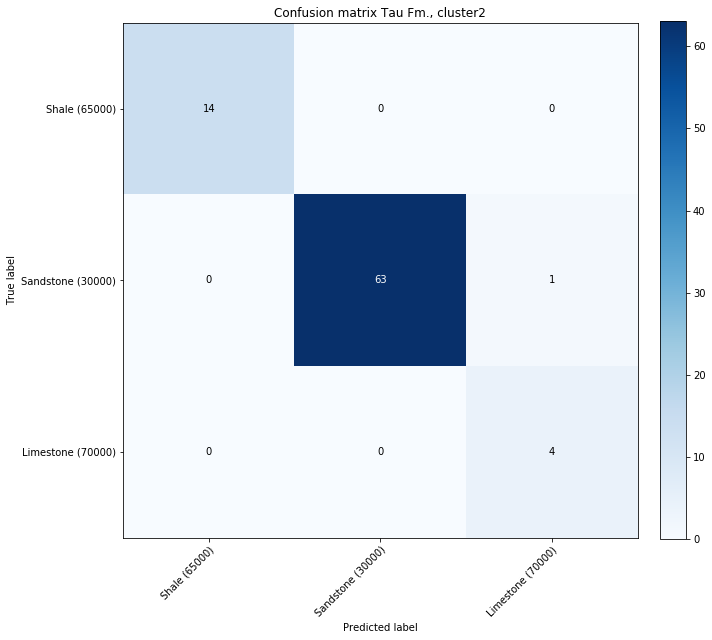

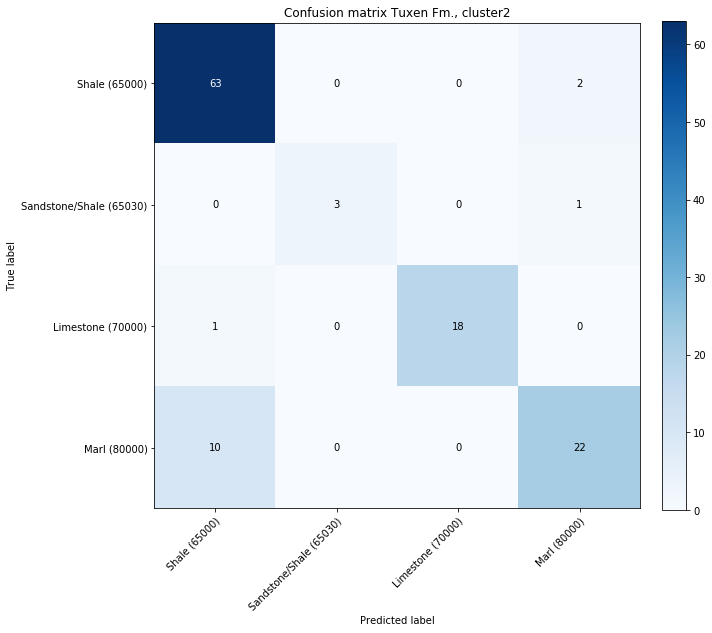

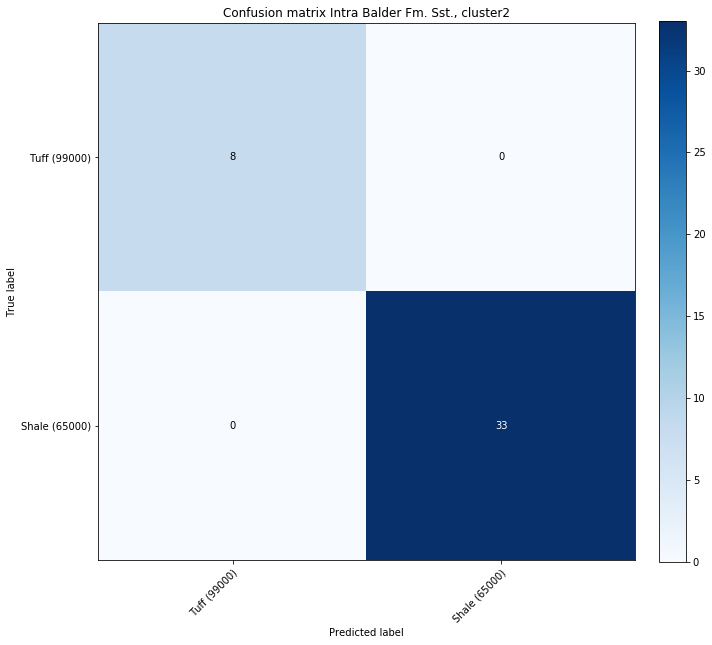

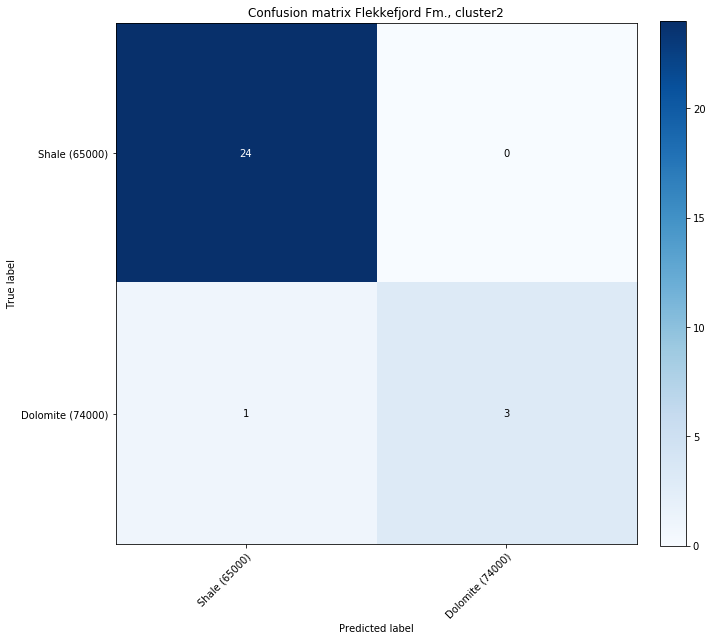

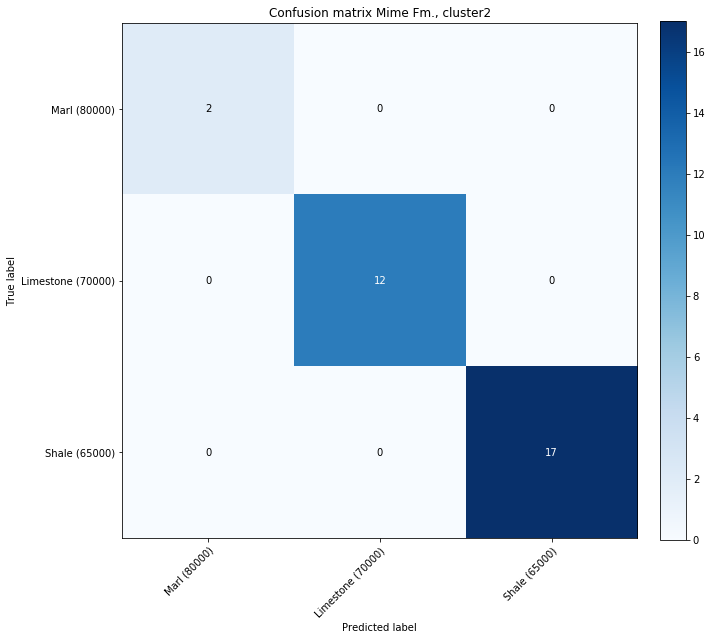

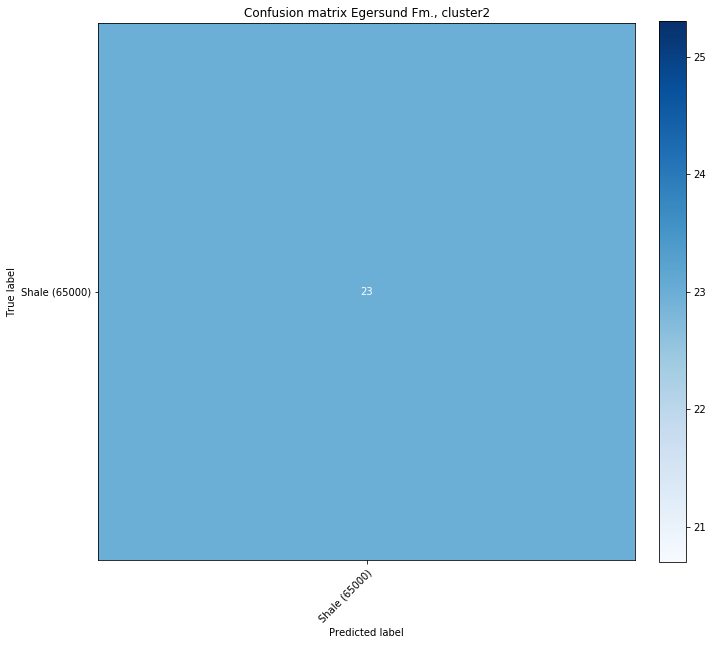

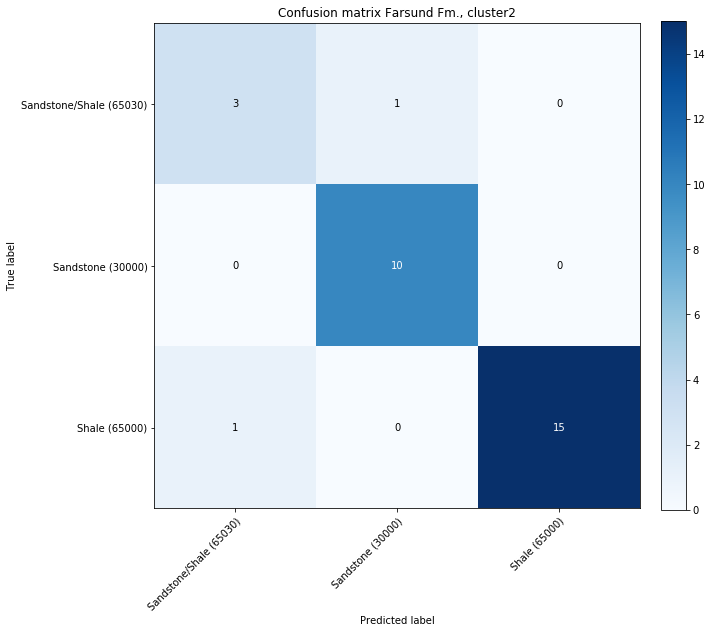

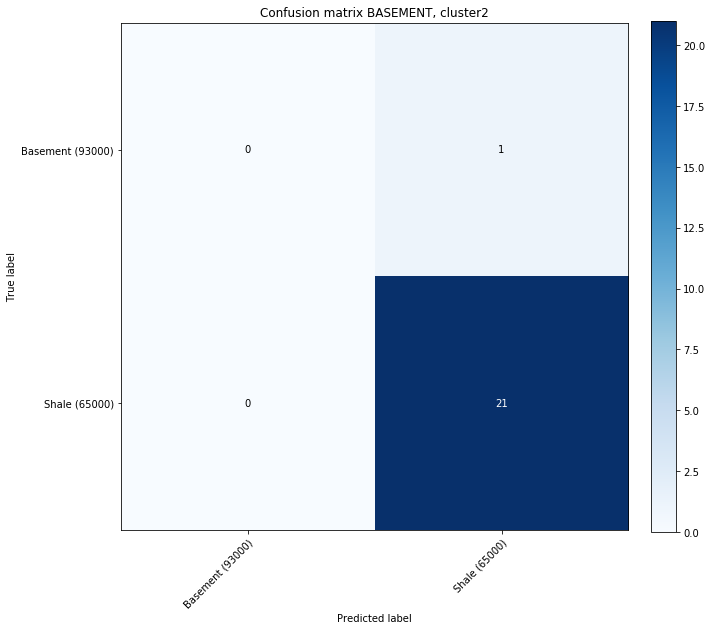

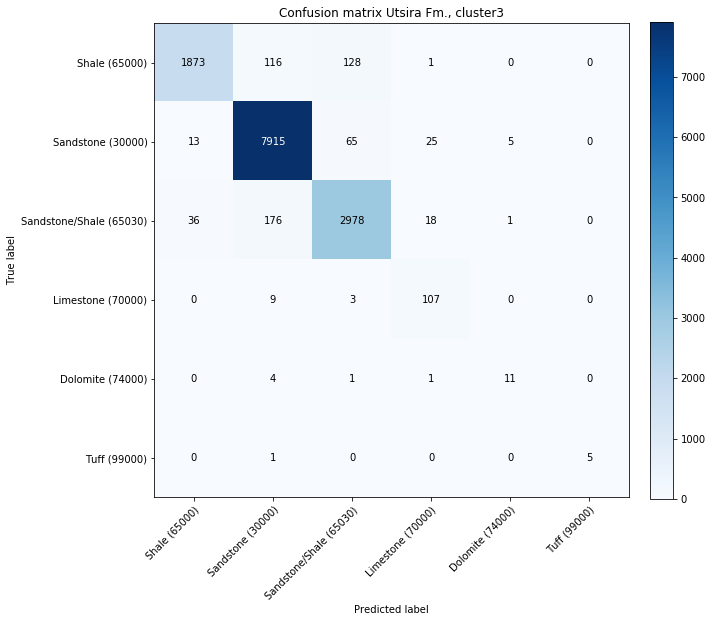

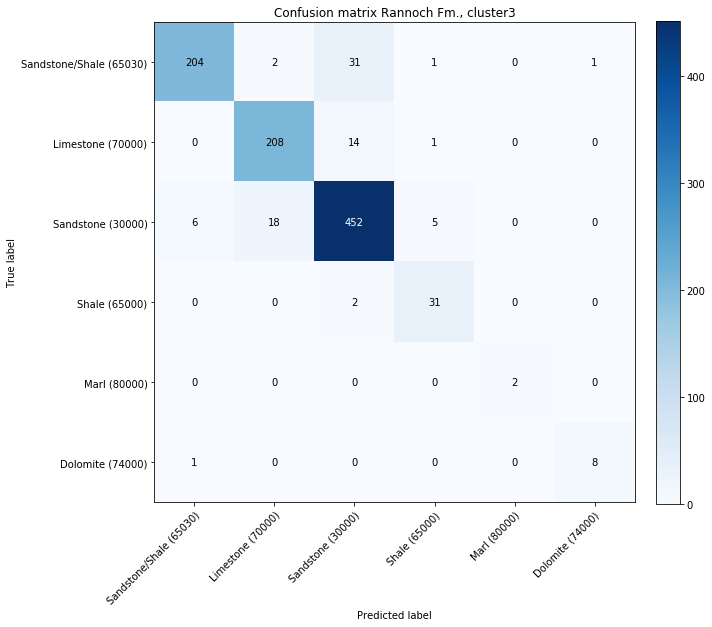

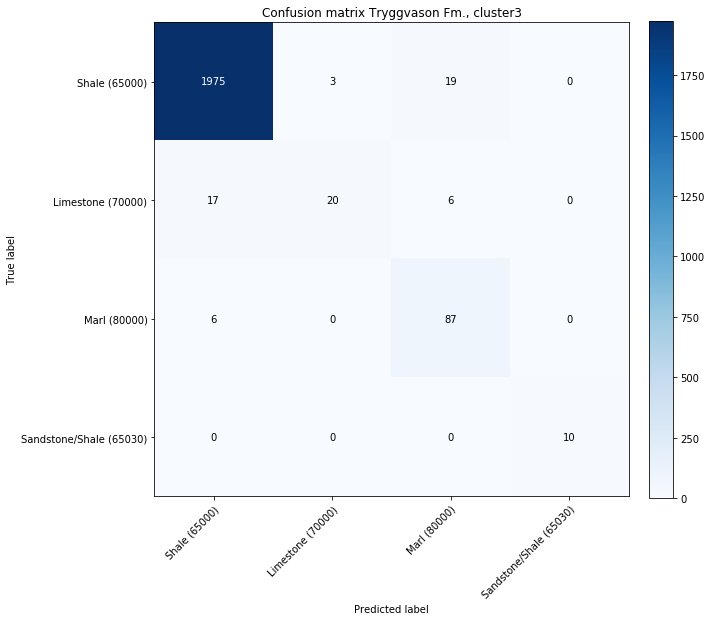

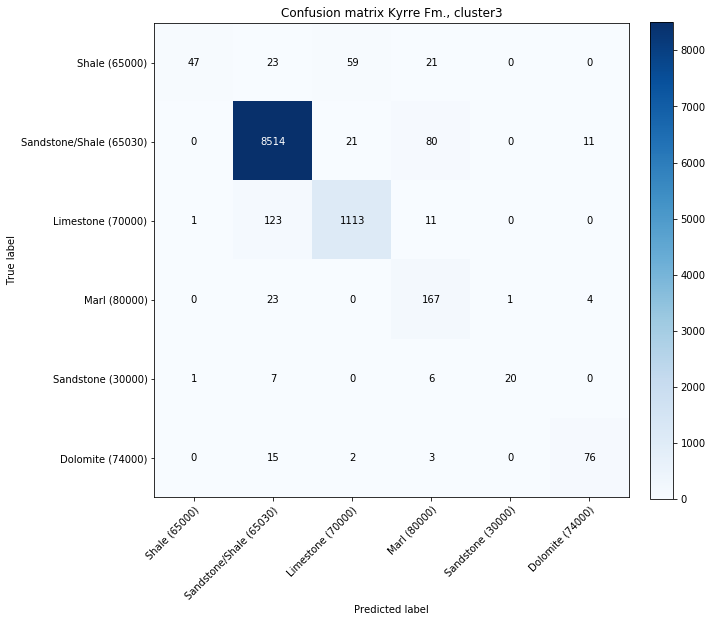

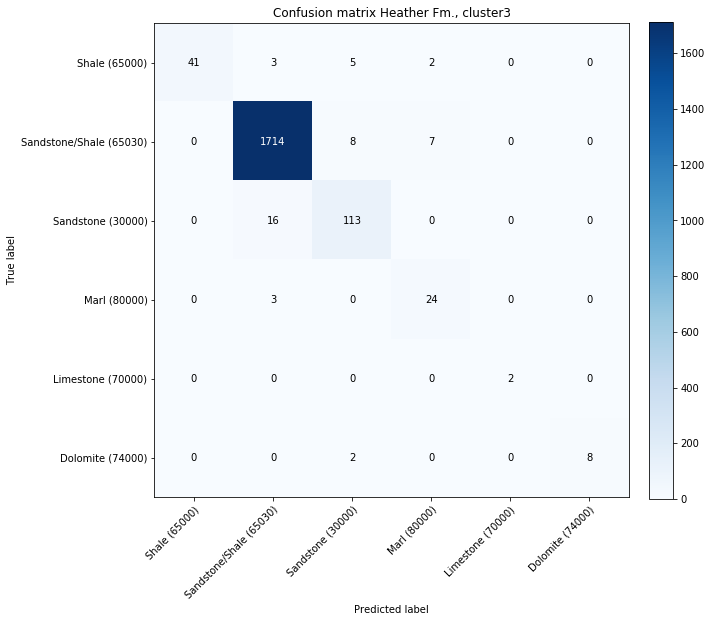

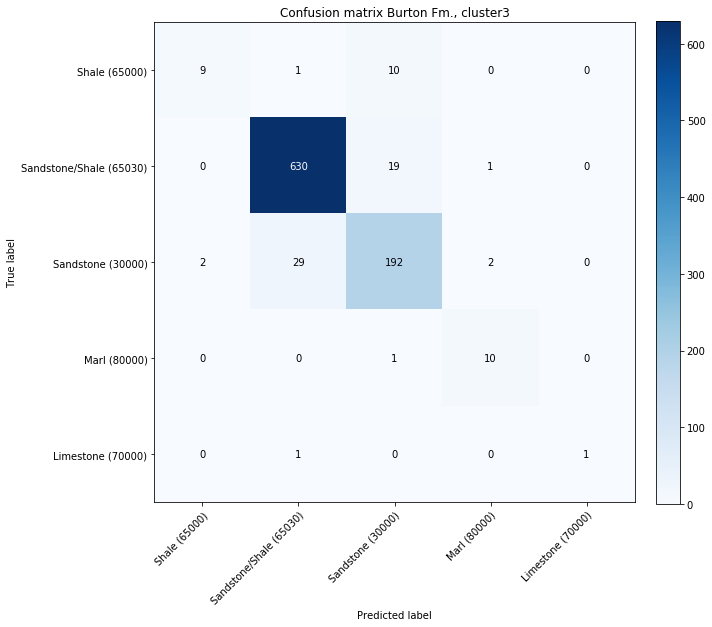

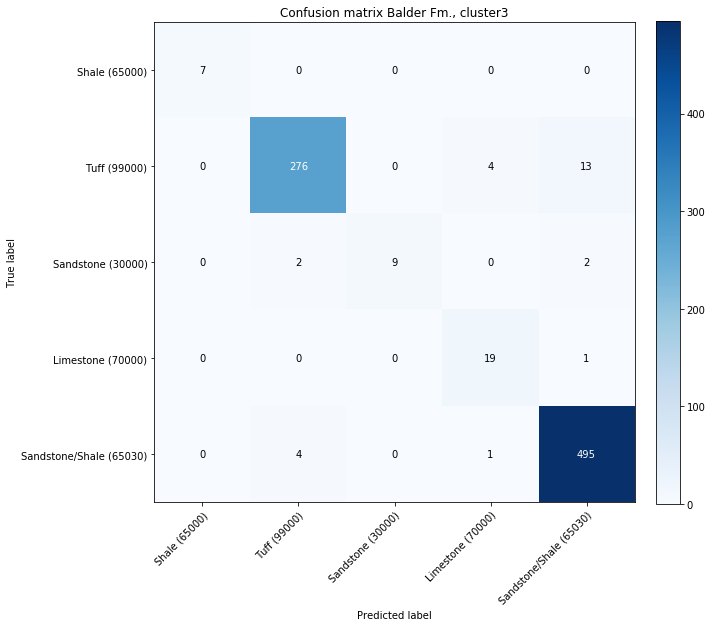

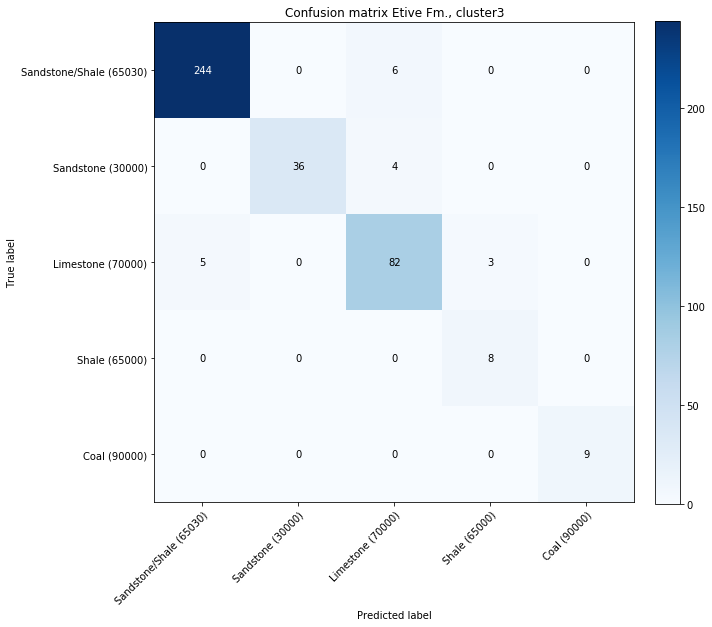

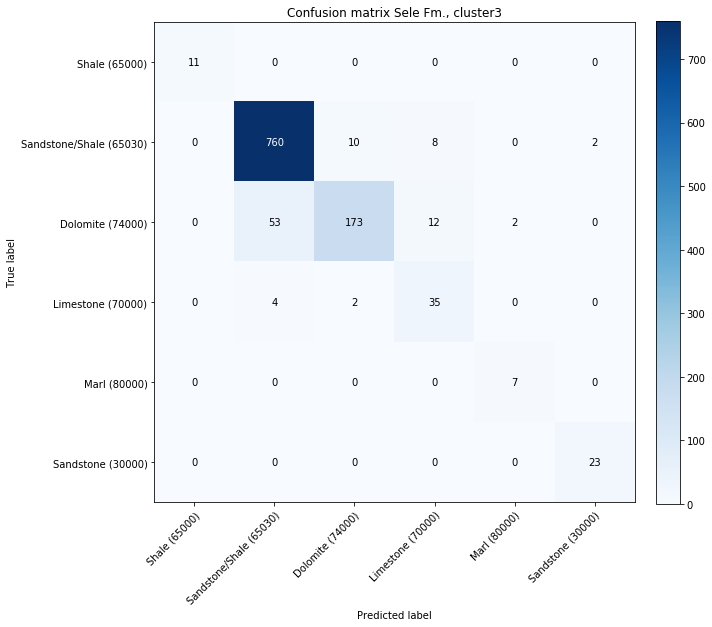

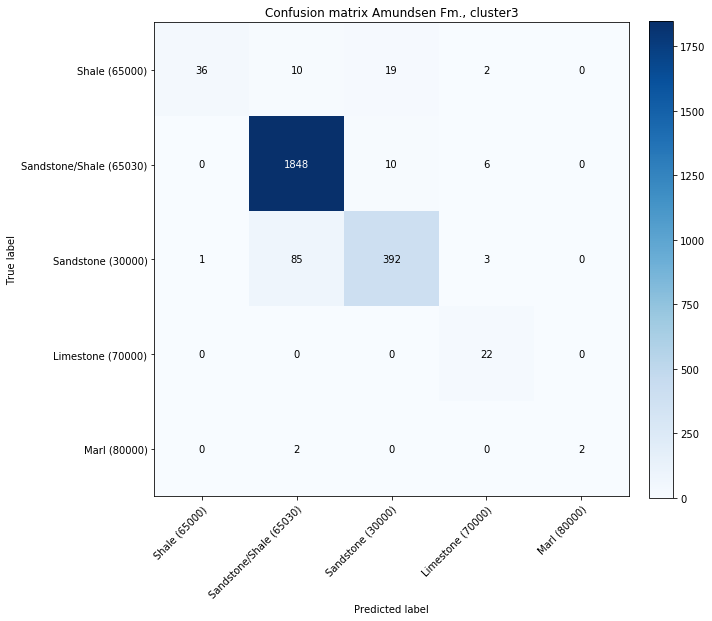

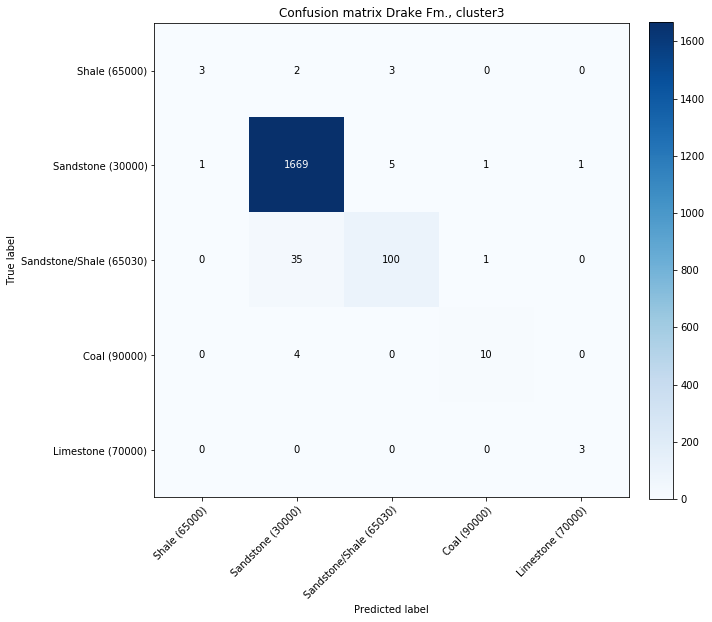

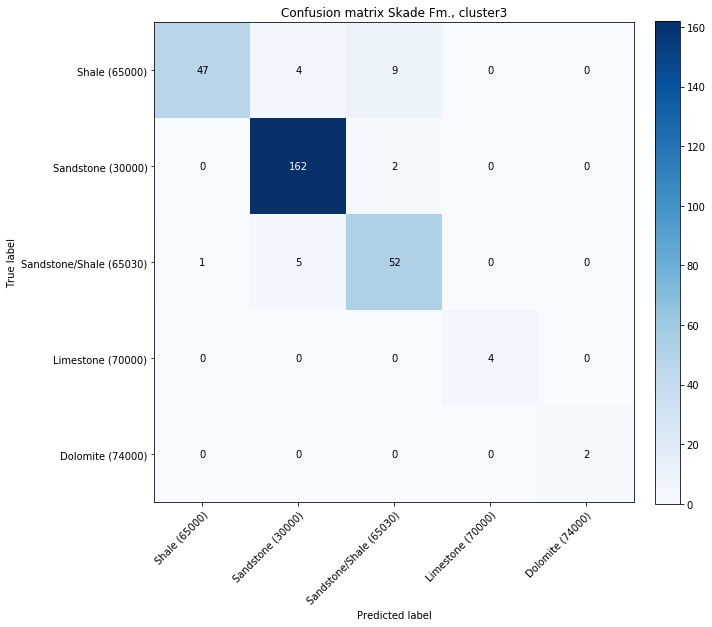

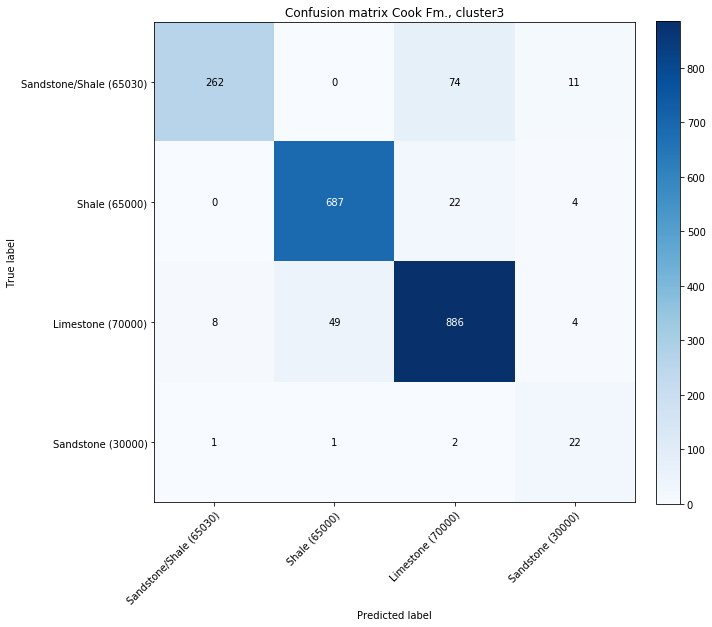

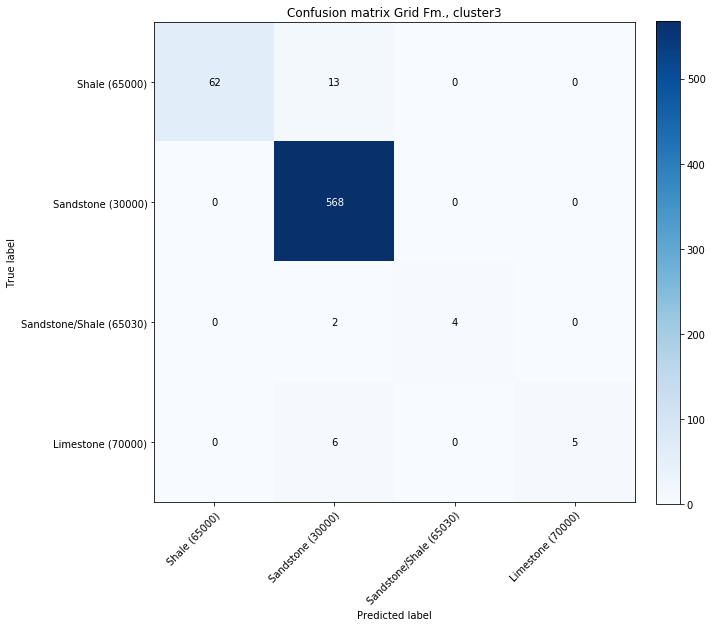

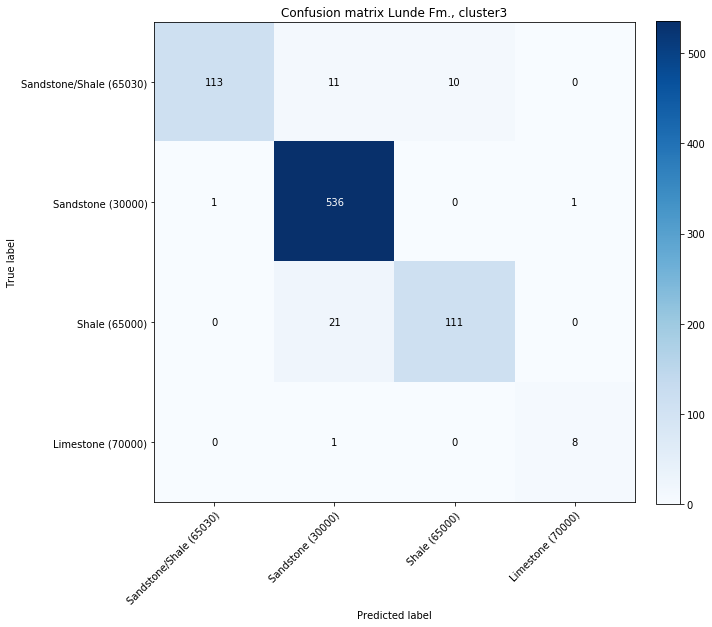

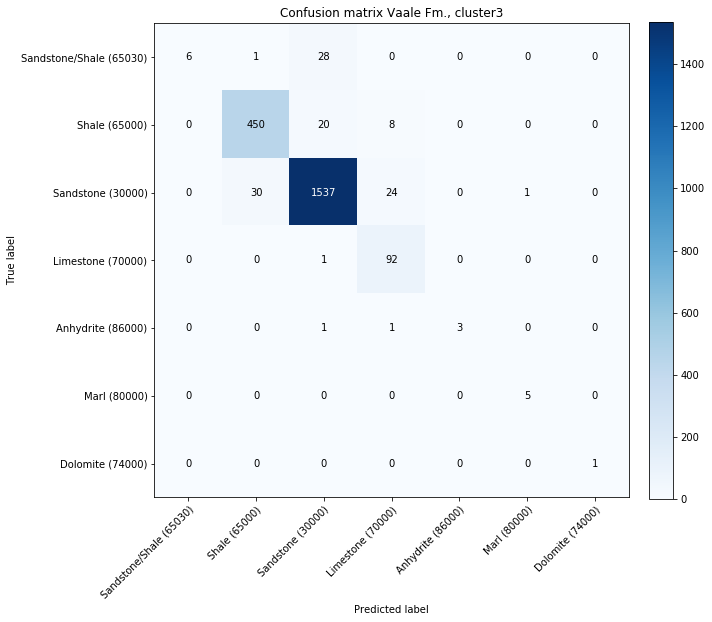

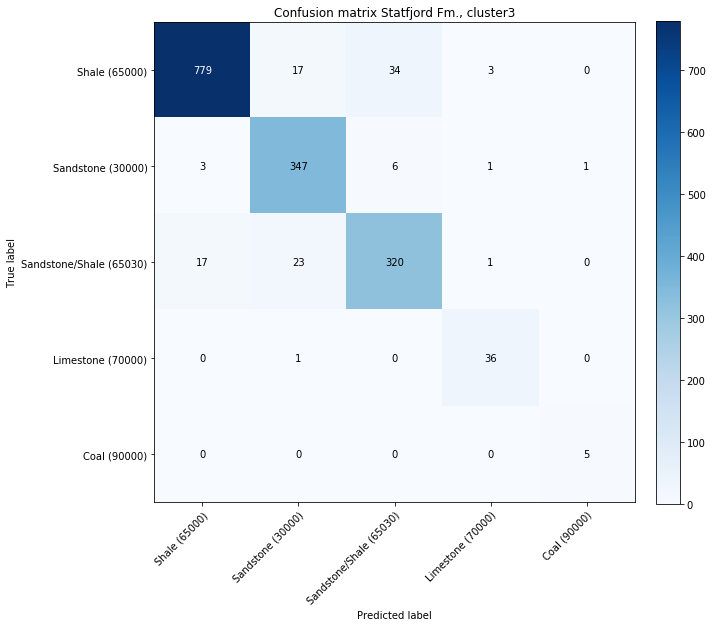

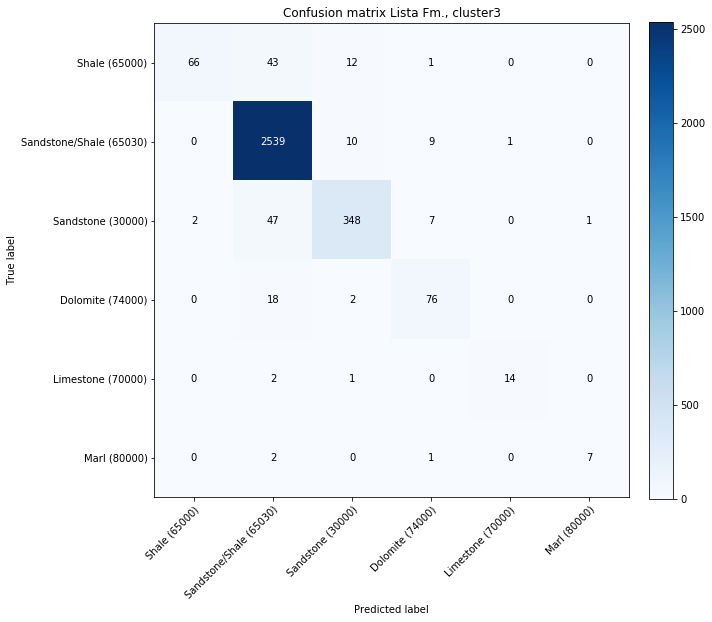

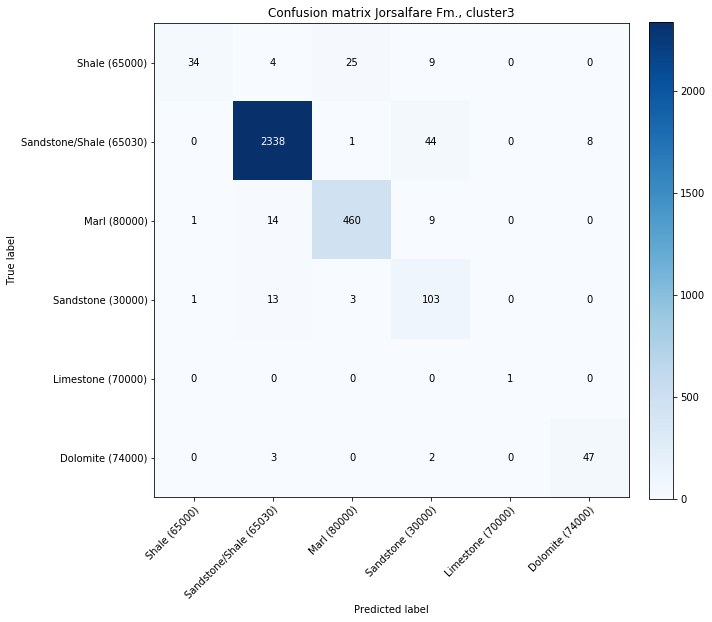

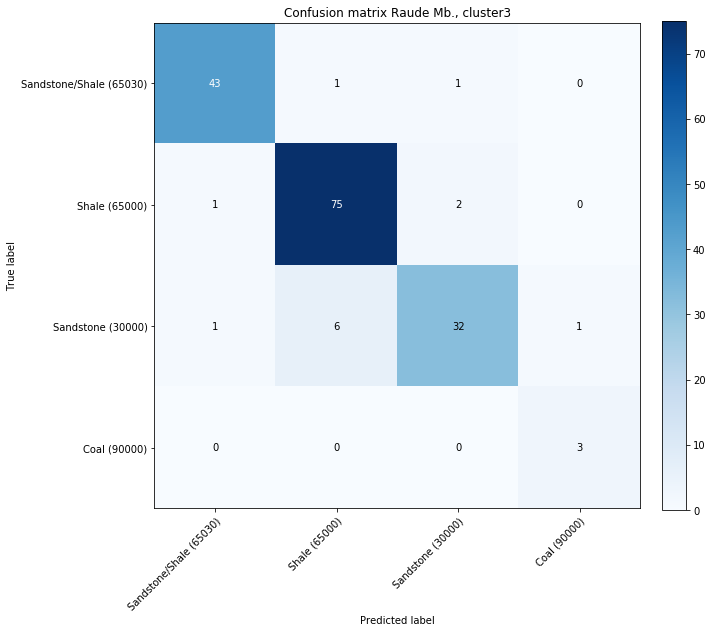

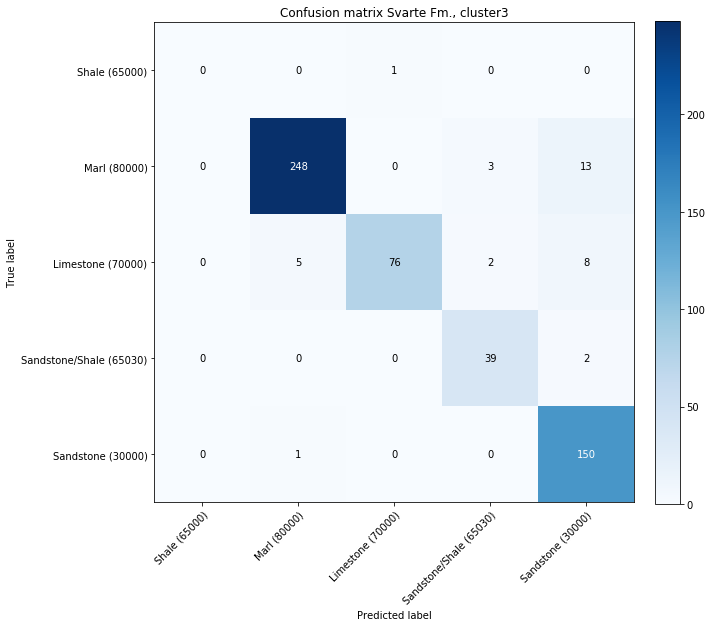

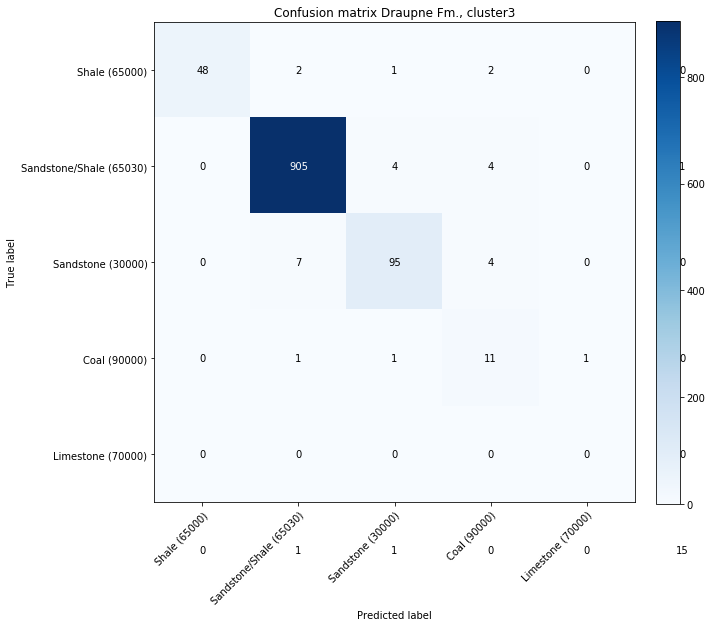

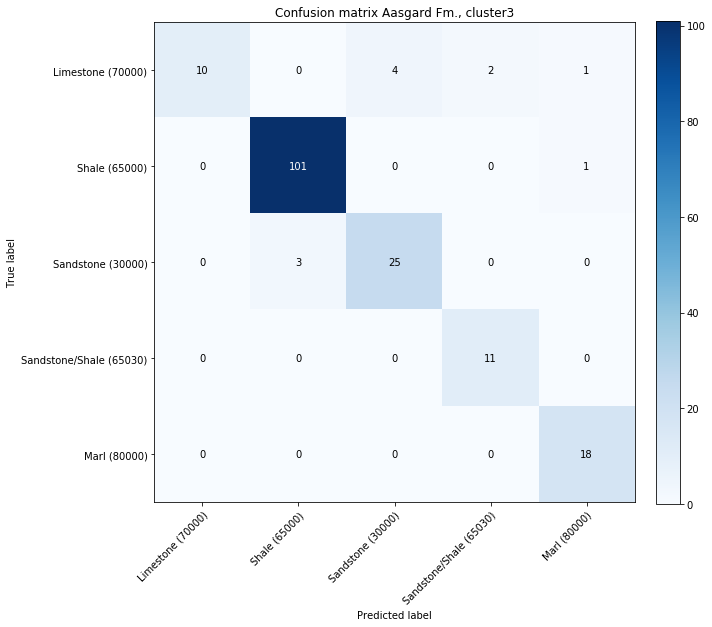

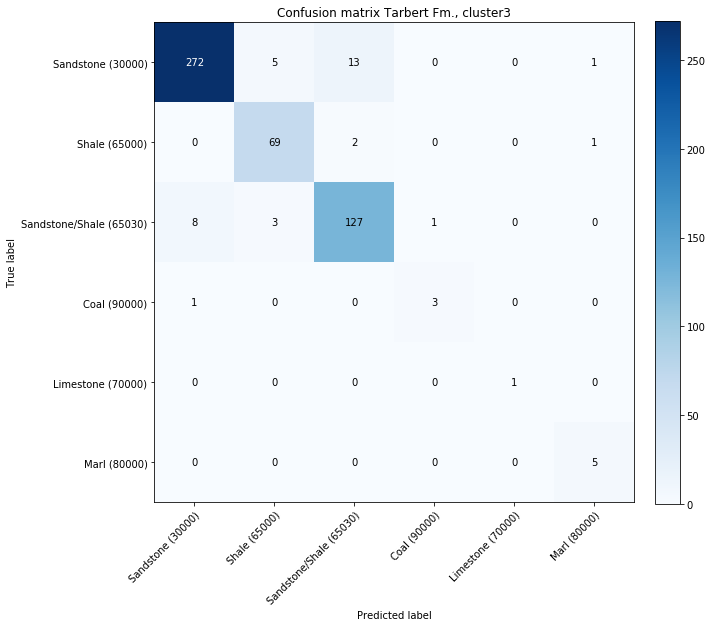

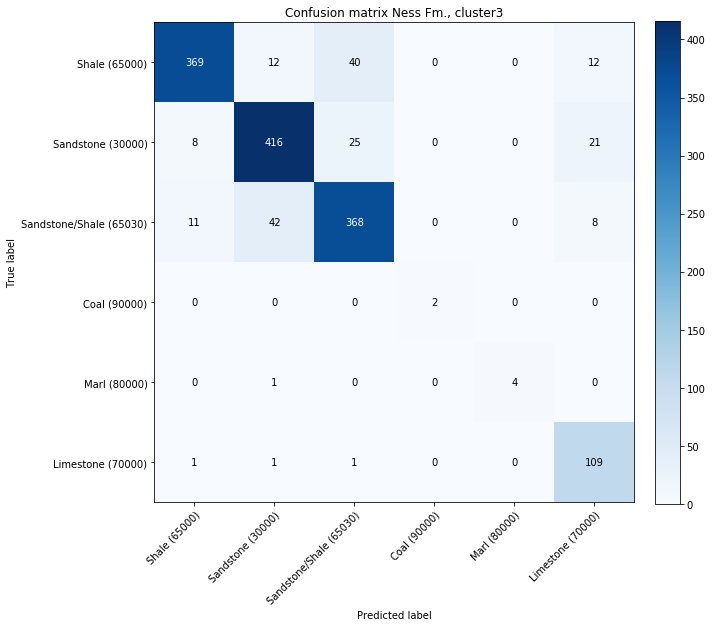

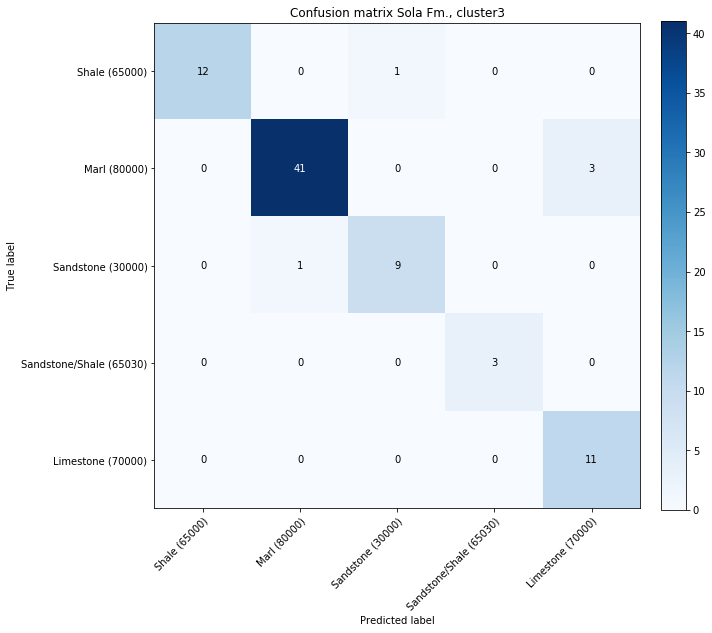

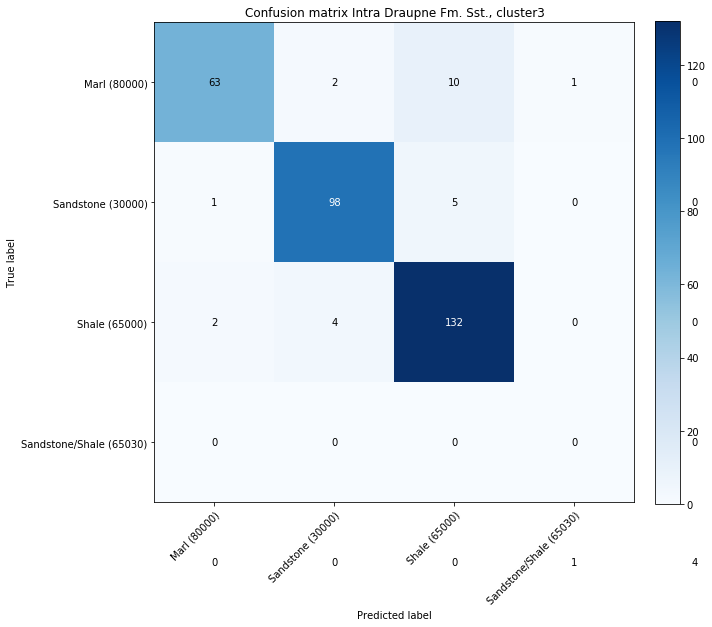

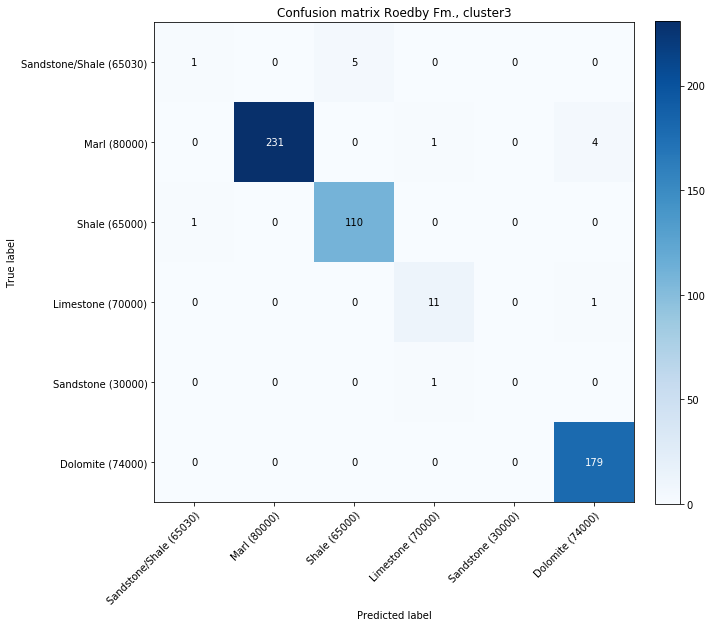

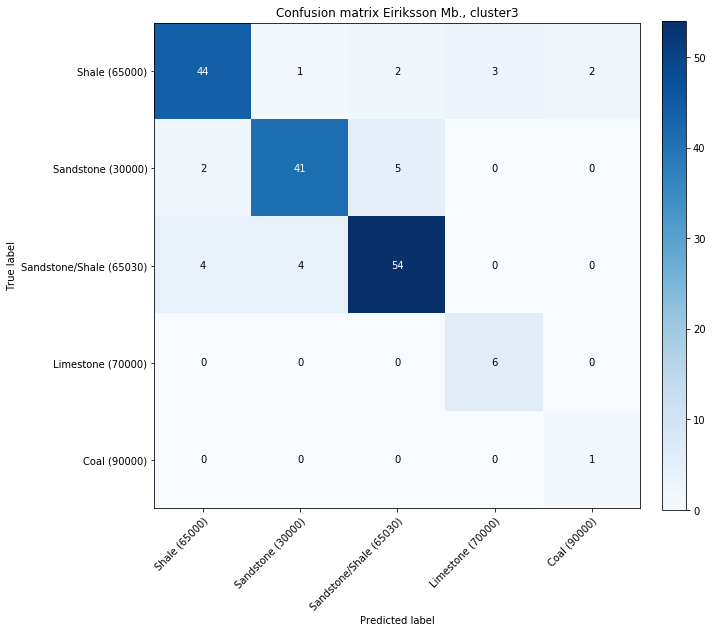

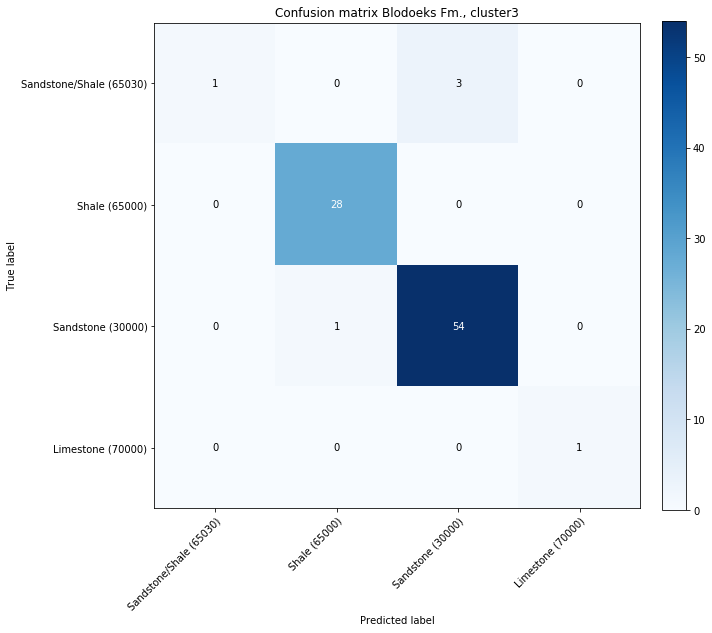

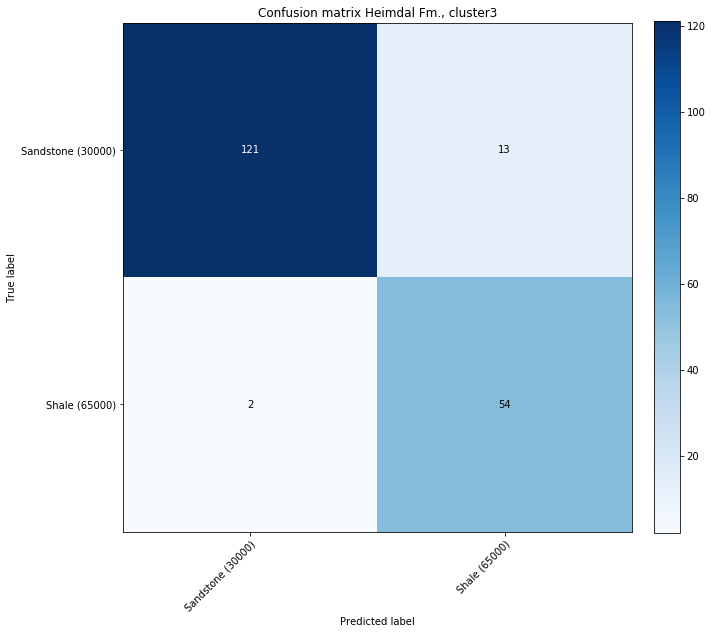

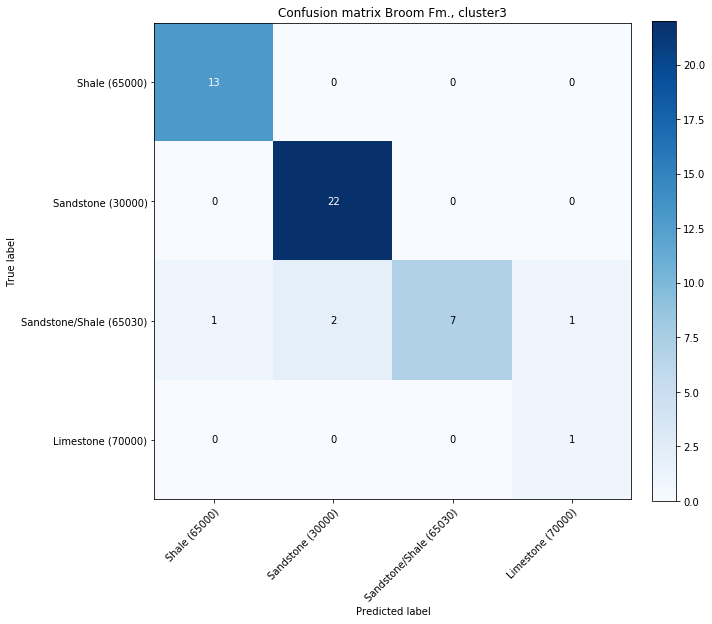

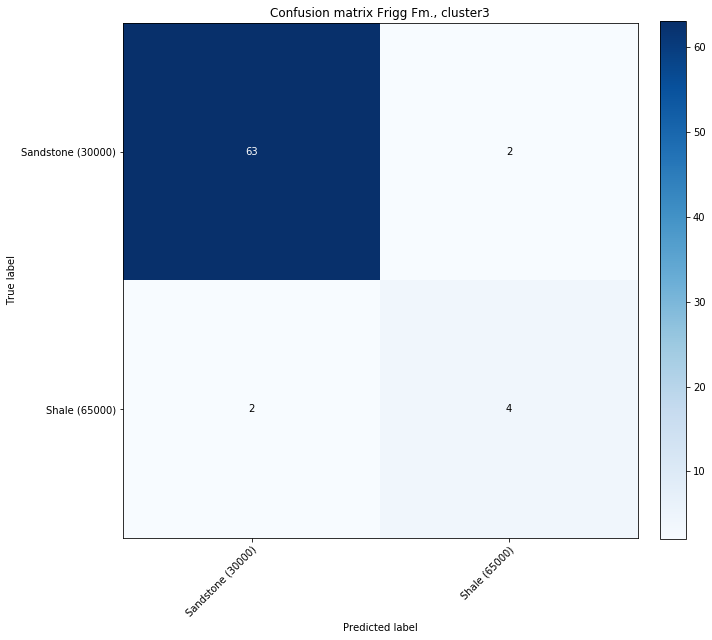

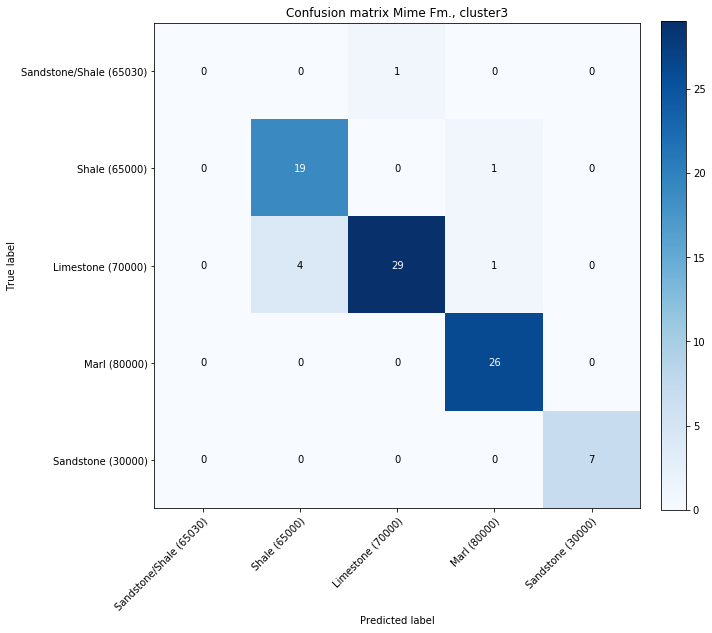

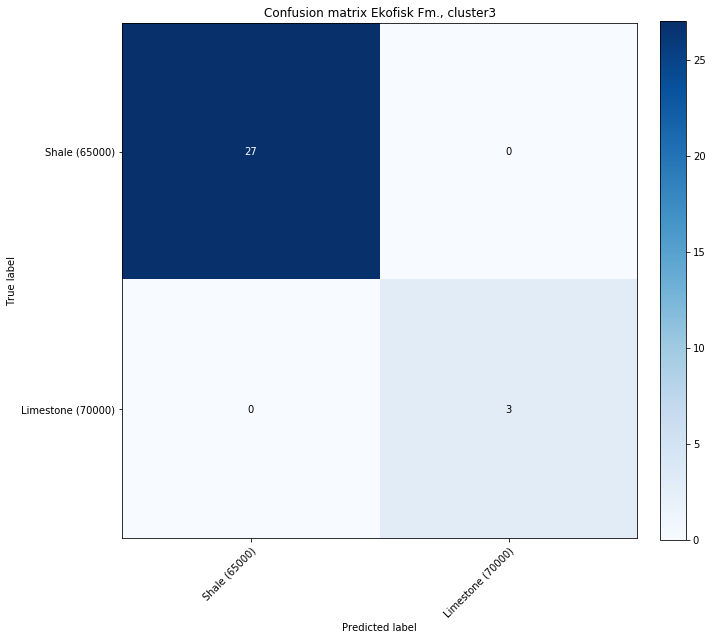

In [22]:
pred_col = 'prediction'
label_col = 'FORCE_2020_LITHOFACIES_LITHOLOGY'
strat_col = 'FORMATION'

for pred, cluster in zip([pred1, pred2, pred3], ['cluster1', 'cluster2', 'cluster3']):
    for s in pred.FORMATION[pred.FORMATION.notna()].unique():
        classes = pred[label_col][pred[strat_col]==s].unique()
        classes = [(litho_dict[x][0]+' ('+str(x)+')') for x in classes]
        plot_confusion_matrix(pred[label_col][pred[strat_col]==s],
                              pred[pred_col][pred[strat_col]==s],
                              classes, normalize=False, title=f'Confusion matrix {s}, {cluster}', 
                              cmap=plt.cm.Blues, zero_out_diagonal=False)

In [23]:
for fm in df.FORMATION[df.FORMATION.notna()].unique():
    print(f'\n{" "*8}{fm}{(28-len(fm))*"."}{len(df[df.FORMATION==fm]):>6d} rows')
    for li in df.FORCE_2020_LITHOFACIES_LITHOLOGY[df.FORMATION==fm].unique():
        print(f'{" "*16}{litho_dict[li][0]:<16}    {len(df.FORCE_2020_LITHOFACIES_LITHOLOGY[df.FORCE_2020_LITHOFACIES_LITHOLOGY==li][df.FORMATION==fm]):>6d} {"*"*int(round(len(df.FORCE_2020_LITHOFACIES_LITHOLOGY[df.FORCE_2020_LITHOFACIES_LITHOLOGY==li][df.FORMATION==fm])/2000,0))}')


        Utsira Fm...................172636 rows
                Shale               120940 ************************************************************
                Sandstone            28653 **************
                Sandstone/Shale      20321 **********
                Limestone             1953 *
                Tuff                   279 
                Marl                     7 
                Dolomite               261 
                Coal                   222 

        Balder Fm................... 25814 rows
                Sandstone             1687 *
                Tuff                 13723 *******
                Shale                 8795 ****
                Limestone              864 
                Sandstone/Shale        741 
                Marl                     4 

        Sele Fm..................... 25451 rows
                Shale                20811 **********
                Sandstone             1515 *
                Tuff                   49

                Marl                   170 
                Shale                  329 
                Limestone               68 
                Sandstone/Shale         38 

        Mandal Fm...................  1034 rows
                Shale                  939 
                Sandstone/Shale         90 
                Limestone                5 

        Ula Fm......................  1736 rows
                Sandstone/Shale         83 
                Sandstone             1644 *
                Limestone                9 

        Bryne Fm....................   390 rows
                Sandstone/Shale        115 
                Sandstone              253 
                Shale                   22 

        Tau Fm......................   369 rows
                Marl                     3 
                Shale                  298 
                Limestone               12 
                Sandstone               56 

        Sandnes Fm..................   467 rows
      

                Shale                   94 
                Limestone                8 

        Lunde Fm....................  4539 rows
                Shale                 3018 **
                Sandstone              803 
                Sandstone/Shale        686 
                Limestone               26 
                Coal                     6 

        Oseberg Fm..................  1942 rows
                Sandstone             1342 *
                Sandstone/Shale        327 
                Shale                  218 
                Limestone               46 
                Marl                     9 

        Sognefjord Fm............... 13493 rows
                Sandstone             8134 ****
                Limestone              540 
                Sandstone/Shale       3088 **
                Shale                 1694 *
                Marl                    37 

        Fensfjord Fm................ 15361 rows
                Sandstone/Shale       5429 ***

In [32]:
for li in df.FORCE_2020_LITHOFACIES_LITHOLOGY.unique():
    print(f'\n{litho_dict[li][0]} ({li}):')
    for fm in df.FORMATION.loc[(df.FORCE_2020_LITHOFACIES_LITHOLOGY==li)].unique():
        print(f'      {fm:>20} {len(df.loc[((df.FORMATION==fm)&(df.FORCE_2020_LITHOFACIES_LITHOLOGY==li))]):7d}')


Shale (65000):
                       nan       0
                Utsira Fm.  120940
                Balder Fm.    8795
                  Sele Fm.   20811
                 Lista Fm.   54487
               Heimdal Fm.    2215
                Svarte Fm.    6684
                Roedby Fm.    8714
                  Sola Fm.    2269
               Aasgard Fm.    9602
               Draupne Fm.   21857
               Heather Fm.   37194
                 Hugin Fm.     731
            Smith Bank Fm.   13173
                 Frigg Fm.    1245
              Blodoeks Fm.     814
             Skagerrak Fm.    3390
        Kupferschiefer Fm.     407
                 Skade Fm.   38922
                  Grid Fm.   23033
                 Vaale Fm.   17859
              Sleipner Fm.    8603
               Ekofisk Fm.     251
                   Hod Fm.      31
                 Hidra Fm.       2
                 Tuxen Fm.     329
                Mandal Fm.     939
                   Tau Fm.     298
    

                  Cook Fm.     377
            Sognefjord Fm.     540
             Fensfjord Fm.     442
            Krossfjord Fm.     177
              Johansen Fm.     135
               Tarbert Fm.      81
                 Lunde Fm.      26
             Eiriksson Mb.      16
               Rannoch Fm.     214
                  Ness Fm.      32
                 Broom Fm.       8
                 Etive Fm.      49
               Oseberg Fm.      46
      Intra Heather Fm. Sst.     108
                  Agat Fm.      54

Tuff (99000):
                Balder Fm.   13723
                 Frigg Fm.      17
                  Sele Fm.     492
                Utsira Fm.     279
                 Skade Fm.      11
                 Lista Fm.     301
                 Skade Mb.     107
      Intra Balder Fm. Sst.     150
                  Grid Fm.      39
                       nan       0

Marl (80000):
                   Hod Fm.     727
              Blodoeks Fm.    1149
                Svarte

In [25]:
test = pd.read_csv('original_material/test.csv', sep=';')

In [26]:
train = pd.read_csv('original_material/train.csv', sep=';')

In [27]:
# add wellname (use ):
for pred, cluster in zip([pred1, pred2, pred3], ['cluster1', 'cluster2', 'cluster3']):
    pred['WELL'] = [train.loc[i,'WELL'] for i in pred['Unnamed: 0']]
    pred.sort_values(['WELL', 'DEPTH_MD'], ascending=[True, True], inplace=True)
    pred['FORMATION_num'] = [inv_fm_dict[fm] if inv_fm_dict.get(fm) is not None else np.nan for fm in pred.FORMATION]
    pred['new_GROUP'] = [map_new_groups[fm] if map_new_groups.get(fm) is not None else np.nan for fm in pred.FORMATION]
    pred['new_GROUP_num'] = [inv_group_dict[gp] if inv_group_dict.get(gp) is not None else np.nan for gp in pred.new_GROUP]
    print(f'Unique wells in {cluster}: {pred.WELL.unique()}')

Unique wells in cluster1: ['30/3-3' '30/3-5 S' '30/6-5' '31/2-1' '31/2-19 S' '31/2-7' '31/2-8'
 '31/2-9' '31/3-1' '31/3-2' '31/3-3' '31/3-4' '31/4-10' '31/4-5'
 '31/5-4 S' '31/6-5' '31/6-8' '32/2-1' '34/12-1' '35/11-1' '35/11-10'
 '35/11-11' '35/11-12' '35/11-13' '35/11-15 S' '35/11-6' '35/11-7'
 '35/12-1' '35/3-7 S' '35/4-1' '35/8-4' '35/8-6 S' '35/9-10 S' '35/9-2'
 '35/9-5' '35/9-6 S' '36/7-3']
Unique wells in cluster2: ['15/9-13' '15/9-15' '15/9-17' '16/1-2' '16/1-6 A' '16/10-1' '16/10-2'
 '16/10-3' '16/10-5' '16/11-1 ST3' '16/2-11 A' '16/2-16' '16/2-6' '16/4-1'
 '16/5-3' '16/7-4' '16/7-5' '16/8-1' '17/11-1' '25/11-15' '25/11-19 S'
 '25/11-5' '25/2-13 T4' '25/2-14' '25/2-7' '25/3-1' '25/4-5' '25/5-1'
 '25/5-4' '25/6-1' '25/6-2' '25/6-3' '25/7-2' '25/8-5 S' '25/8-7' '25/9-1'
 '26/4-1' '7/1-1' '7/1-2 S']
Unique wells in cluster3: ['29/6-1' '33/5-2' '33/6-3 S' '33/9-1' '33/9-17' '34/10-19' '34/10-21'
 '34/10-33' '34/10-35' '34/11-1' '34/11-2 S' '34/2-4' '34/3-1 A'
 '34/4-10 R' '34/5-1 

In [28]:
df['new_GROUP'] = [map_new_groups[fm] if map_new_groups.get(fm) is not None else np.nan for fm in df.FORMATION]
df['new_GROUP_num'] = [inv_group_dict[gp] if inv_group_dict.get(gp) is not None else np.nan for gp in df.new_GROUP]

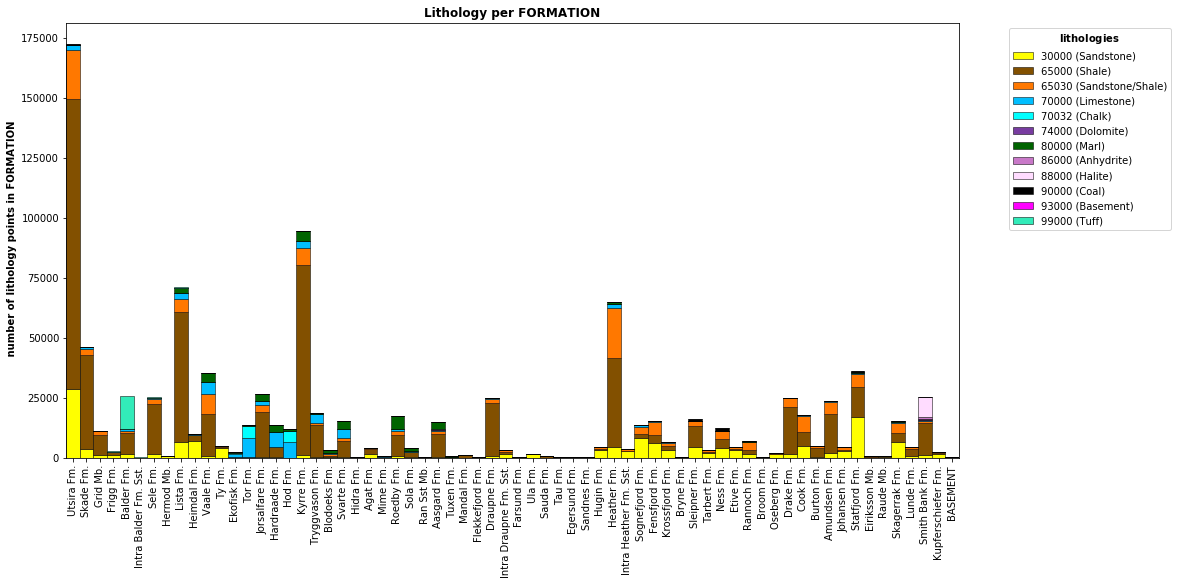

In [29]:
bar_chart_percent_lithology(df, 'FORMATION', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 
                            fm_dict, litho_dict, normalized=False, width=1, figsize=(16,8))

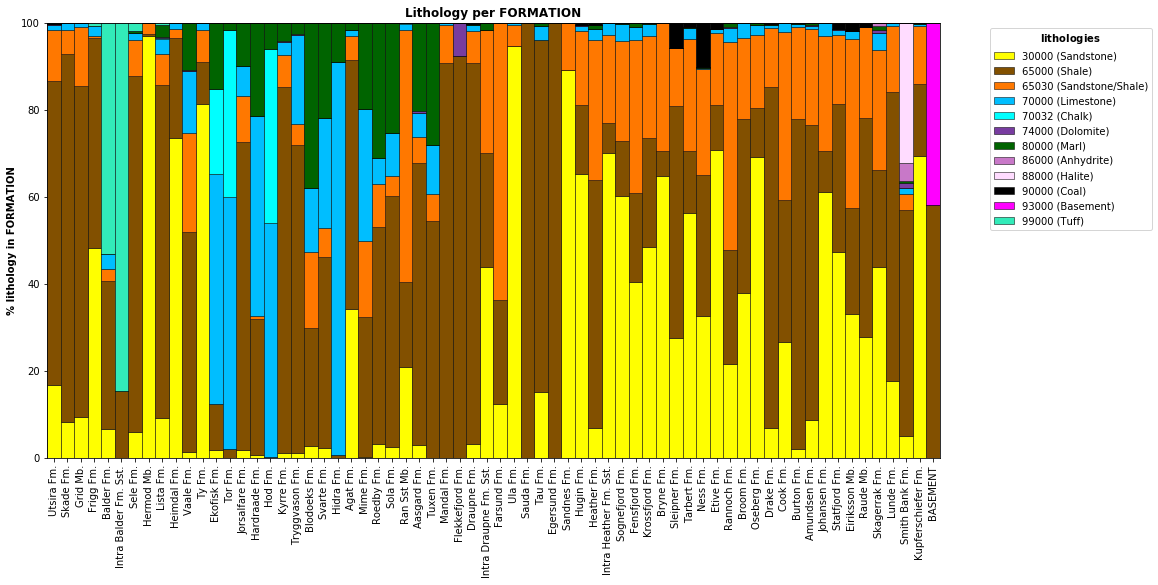

In [30]:
bar_chart_percent_lithology(df, 'FORMATION', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 
                            fm_dict, litho_dict, normalized=True, width=1, figsize=(16,8))

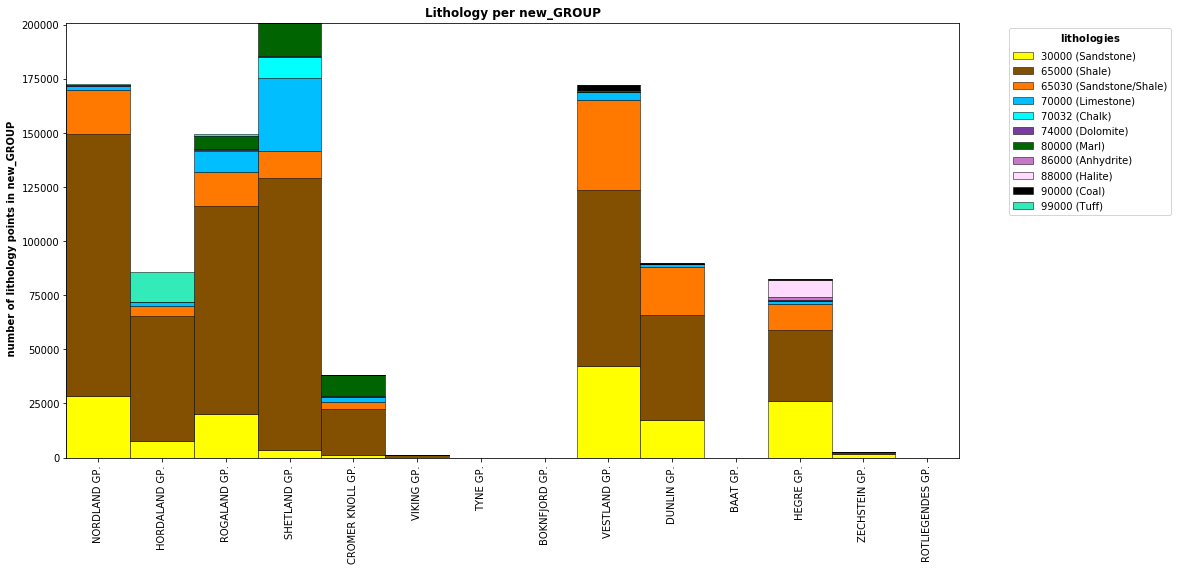

In [31]:
bar_chart_percent_lithology(df, 'new_GROUP', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 
                            group_dict, litho_dict, normalized=False, width=1, figsize=(16,8))

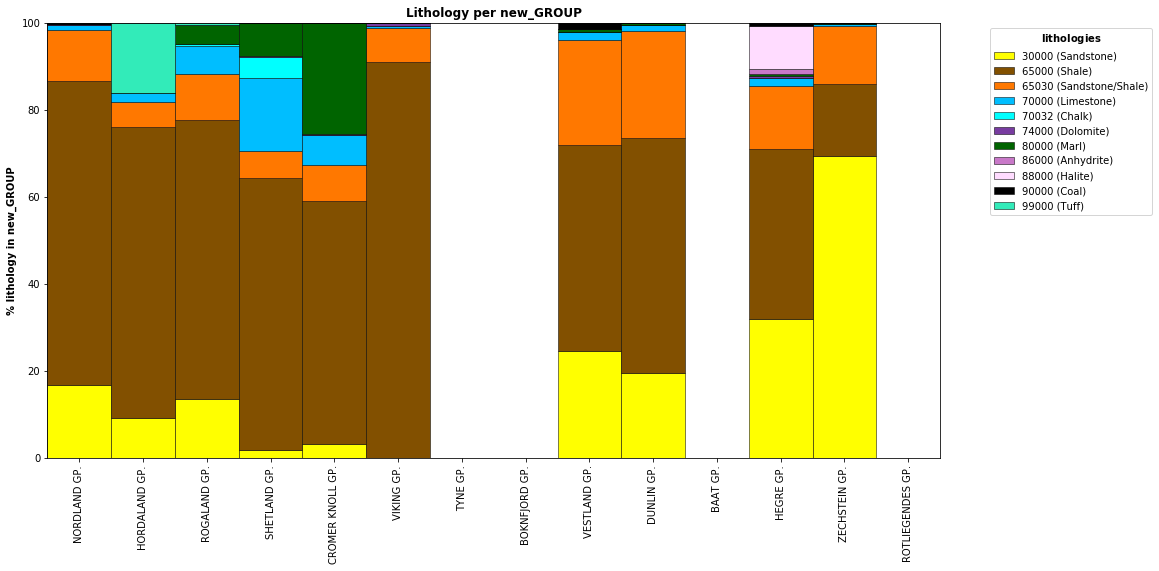

In [32]:
bar_chart_percent_lithology(df, 'new_GROUP', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 
                            group_dict, litho_dict, normalized=True, width=1, figsize=(16,8))

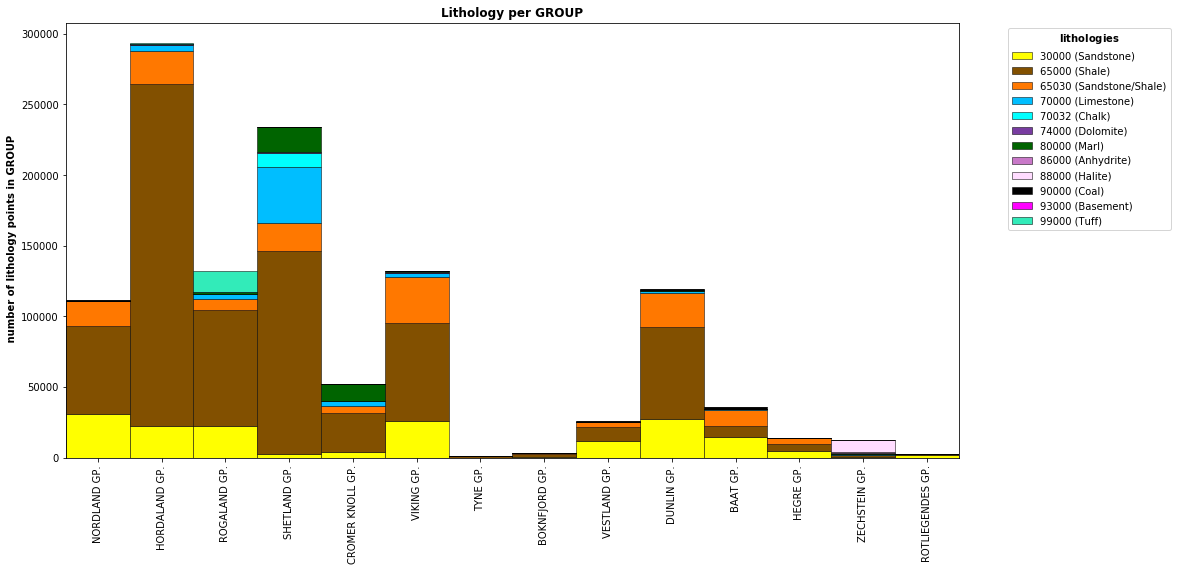

In [33]:
bar_chart_percent_lithology(df, 'GROUP', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 
                            group_dict, litho_dict, normalized=False, width=1, figsize=(16,8))

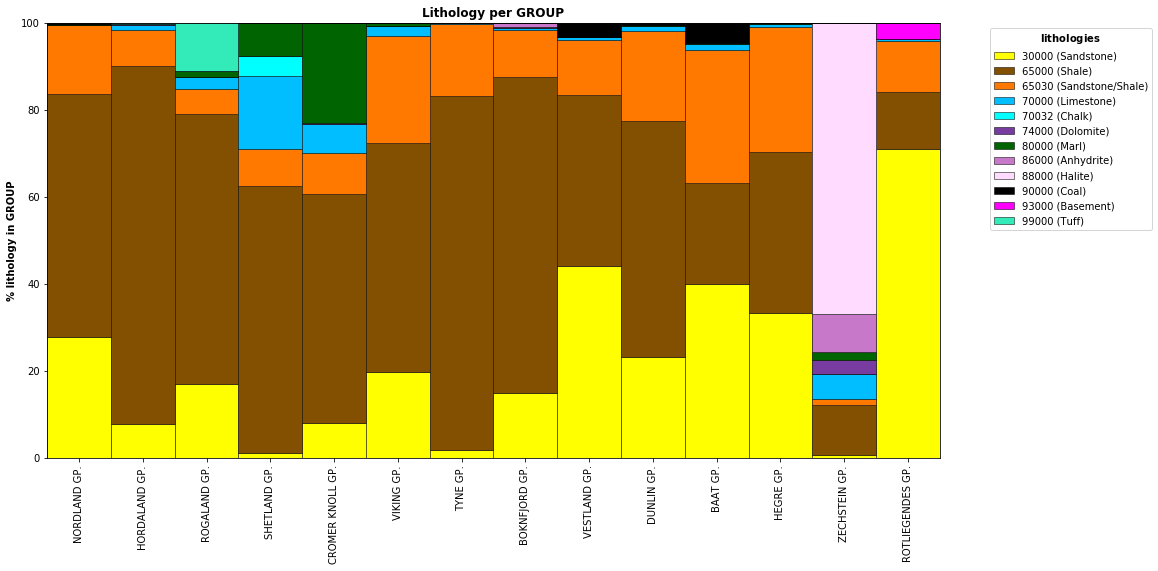

In [34]:
bar_chart_percent_lithology(df, 'GROUP', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 
                            group_dict, litho_dict, normalized=True, width=1, figsize=(16,8))

In [47]:
df['confidence'] = np.where(df['FORCE_2020_LITHOFACIES_CONFIDENCE']==1, 'High confidence', 
                   np.where(df['FORCE_2020_LITHOFACIES_CONFIDENCE']==2, 'Medium confidence',
                   'Low confidence'))

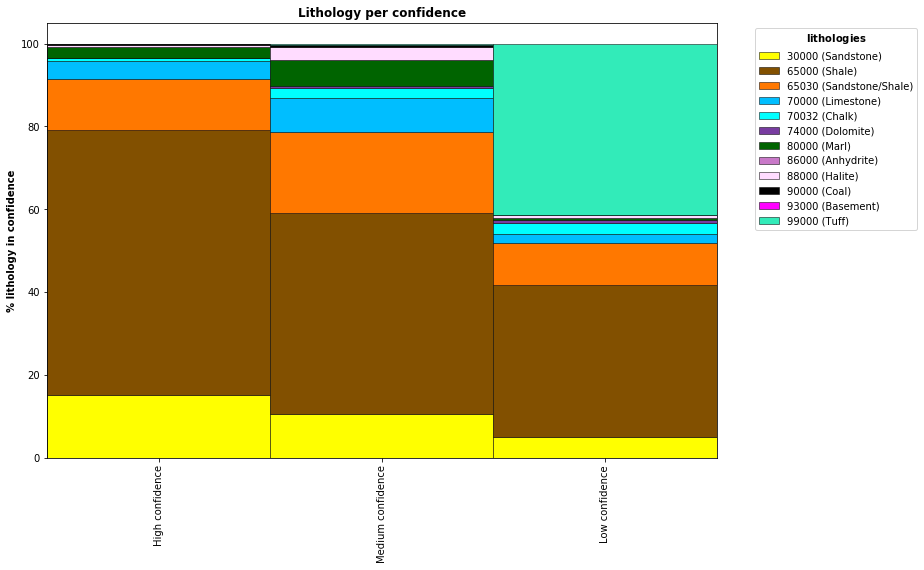

In [49]:
bar_chart_percent_lithology(df, 'confidence', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
                            conf_dict, litho_dict, normalized=False, width=1, figsize=(12,8))

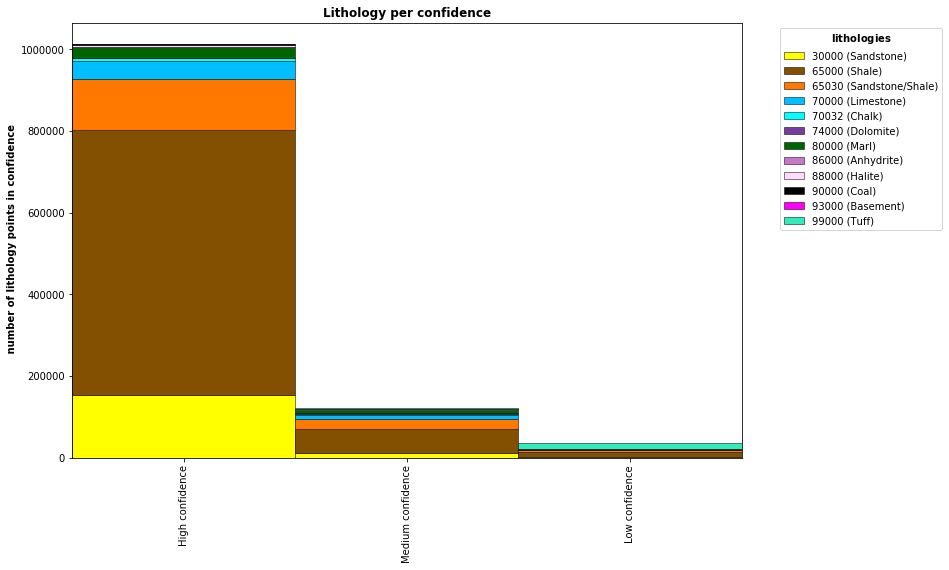

In [50]:
bar_chart_percent_lithology(df, 'confidence', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
                            conf_dict, litho_dict, normalized=True, width=1, figsize=(12,8))

In [52]:
for pred, cluster in zip([pred1, pred2, pred3], ['cluster 1', 'cluster 2', 'cluster 3']):
    print(f'{cluster}\n{"-"*100}\n\n')
    for w in pred.WELL.unique():
        create_CPI(pred, w, 'DEPTH_MD', log_dict, log_shading_dict=log_shading_dict,
                   top_depth=None, bottom_depth=None, 
                   plot_litho={'FORCE_2020_LITHOFACIES_LITHOLOGY':litho_dict,
                               'prediction':litho_dict,
#                               'FORMATION_num':high_constrast_fm_dict,
                               'new_GROUP_num':group_dict},
                               plot_full_litho_legend=False,
                               scaled_plot=False)

cluster 1
----------------------------------------------------------------------------------------------------




AttributeError: 'DataFrame' object has no attribute 'WELL'

In [ ]:
pred1.WELL.unique()

In [ ]:
for pred, cluster in zip([pred1, pred2, pred3], ['cluster 1', 'cluster 2', 'cluster 3']):
    print(f'{cluster}\n{"-"*100}\n\n')
    for w in pred.WELL.unique():
        try:
            create_CPI(pred, w, 'DEPTH_MD', log_dict, log_shading_dict=log_shading_dict,
#                      top_depth={'HORDALAND GP.':'new_GROUP'}, bottom_depth={'CROMER KNOLL GP.':'new_GROUP'}, 
                       top_depth=None, bottom_depth=None,
                       plot_litho={'FORCE_2020_LITHOFACIES_LITHOLOGY':litho_dict,
                                   'prediction':litho_dict,
#                                   'FORCE_2020_LITHOFACIES_CONFIDENCE':conf_dict,
                                   'FORMATION_num':high_constrast_fm_dict,
                                   'new_GROUP_num':group_dict},
                                   plot_full_litho_legend=False,
                                   scaled_plot=False)
        except:
            pass

In [38]:
train['confidence'] = train.FORCE_2020_LITHOFACIES_CONFIDENCE
train['confidence'] = ['High confidence' if x==1 else x for x in train['confidence']]
train['confidence'] = ['Medium confidence' if x==2 else x for x in train['confidence']]
train['confidence'] = ['Low confidence' if x==3 else x for x in train['confidence']]

In [39]:
train['FORMATION_num'] = [inv_fm_dict[fm] if inv_fm_dict.get(fm) is not None else np.nan for fm in train.FORMATION]
train['new_GROUP'] = [map_new_groups[fm] if map_new_groups.get(fm) is not None else np.nan for fm in train.FORMATION]
train['new_GROUP_num'] = [inv_group_dict[gp] if inv_group_dict.get(gp) is not None else np.nan for gp in train.new_GROUP]

C:\Appl\anaconda3\lib\site-packages\ipykernel_launcher.py:201: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


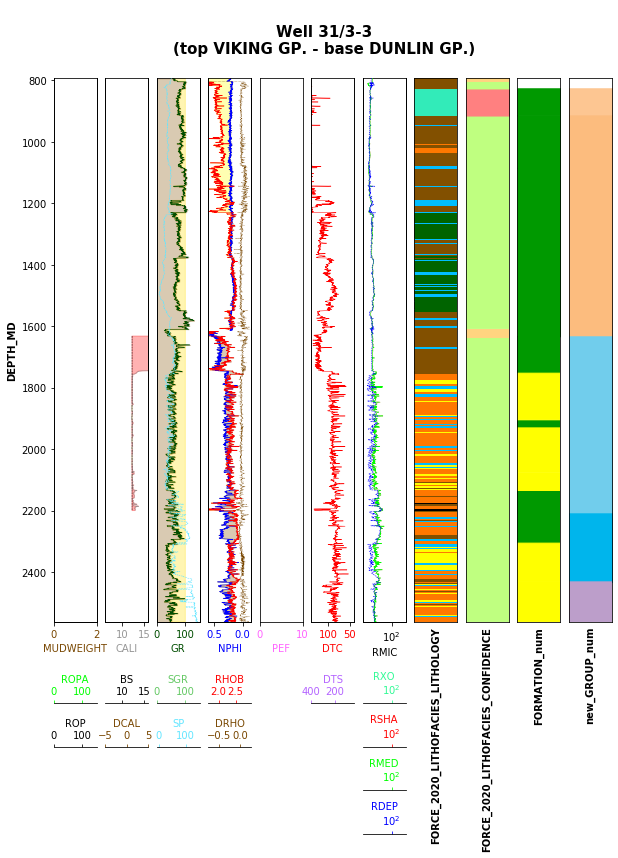

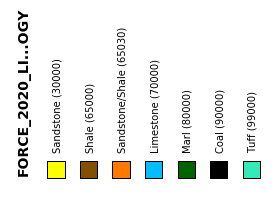

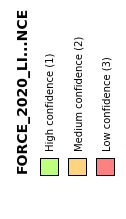

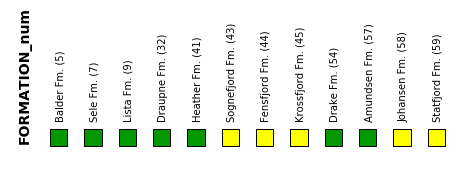

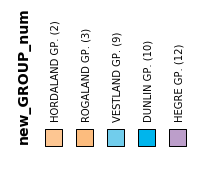

In [40]:
create_CPI(train, '31/3-3', 'DEPTH_MD', log_dict, log_shading_dict=log_shading_dict,
           top_depth={'VIKING GP.':group_dict}, bottom_depth={'DUNLIN GP.':group_dict},
           plot_litho={'FORCE_2020_LITHOFACIES_LITHOLOGY':litho_dict,
                       'FORCE_2020_LITHOFACIES_CONFIDENCE':litho_dict,
                       'FORCE_2020_LITHOFACIES_CONFIDENCE':conf_dict,
                       'FORMATION_num':high_constrast_fm_dict,
                       'new_GROUP_num':group_dict}, 
               plot_full_litho_legend=False, scaled_plot=False)

C:\Appl\anaconda3\lib\site-packages\ipykernel_launcher.py:201: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


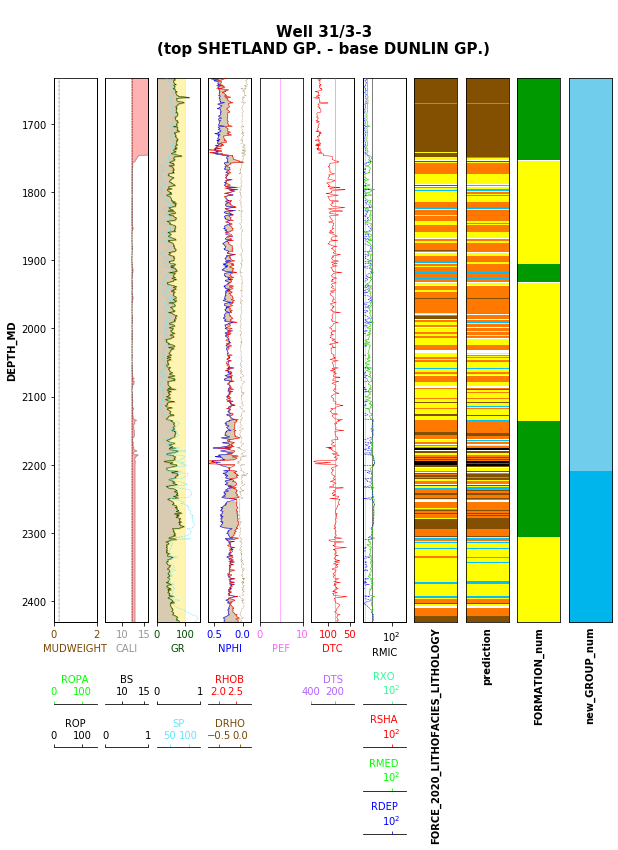

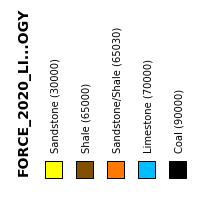

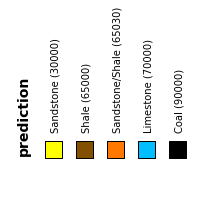

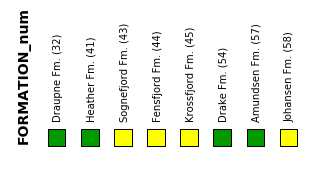

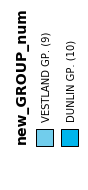

In [41]:
create_CPI(pred1, '31/3-3', 'DEPTH_MD', log_dict, log_shading_dict=log_shading_dict,
           top_depth={'SHETLAND GP.':'new_GROUP'},
           bottom_depth={'DUNLIN GP.':'new_GROUP'},
           plot_litho={'FORCE_2020_LITHOFACIES_LITHOLOGY':litho_dict,
                       'prediction':litho_dict,
                       'FORMATION_num':high_constrast_fm_dict,
                       'new_GROUP_num':group_dict}, 
               plot_full_litho_legend=False, scaled_plot=False)

In [ ]:
df.columns

In [44]:
import scipy
import sklearn
import tensorflow

ModuleNotFoundError: No module named 'tensorflow'

In [45]:
import missingno

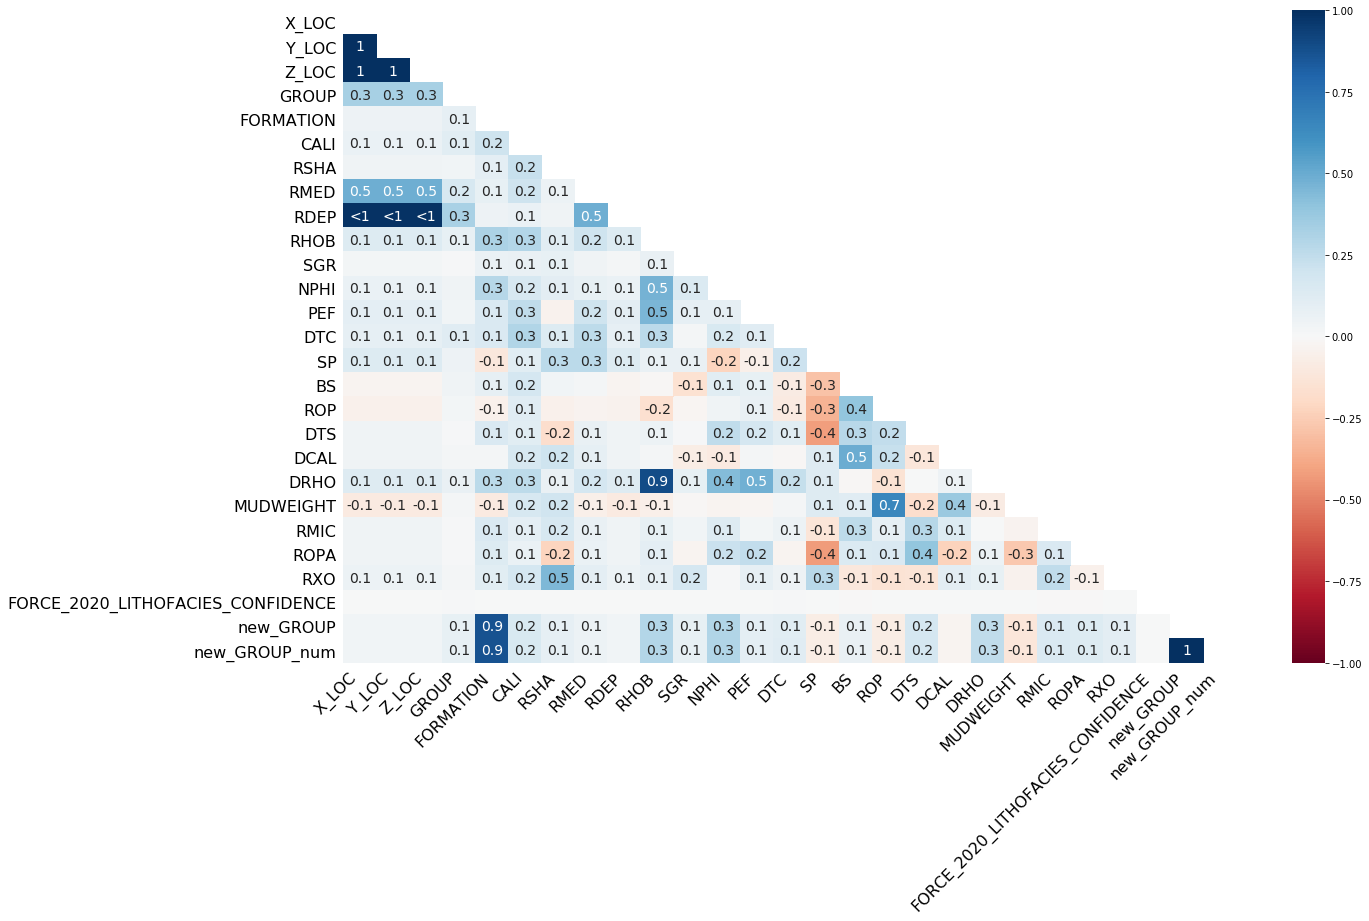

In [46]:
missingno.heatmap(df)

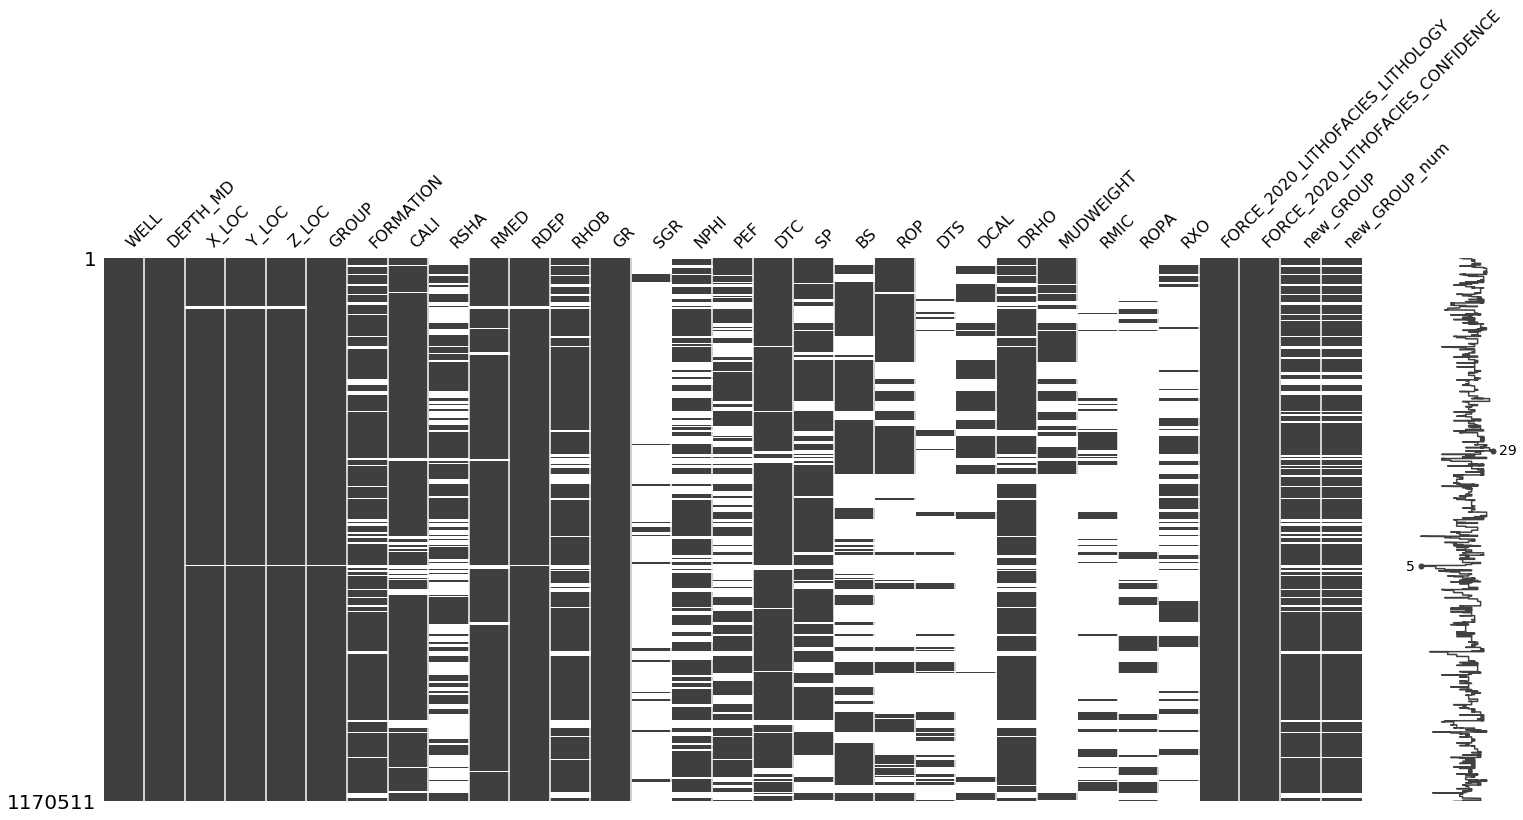

In [47]:
missingno.matrix(df)

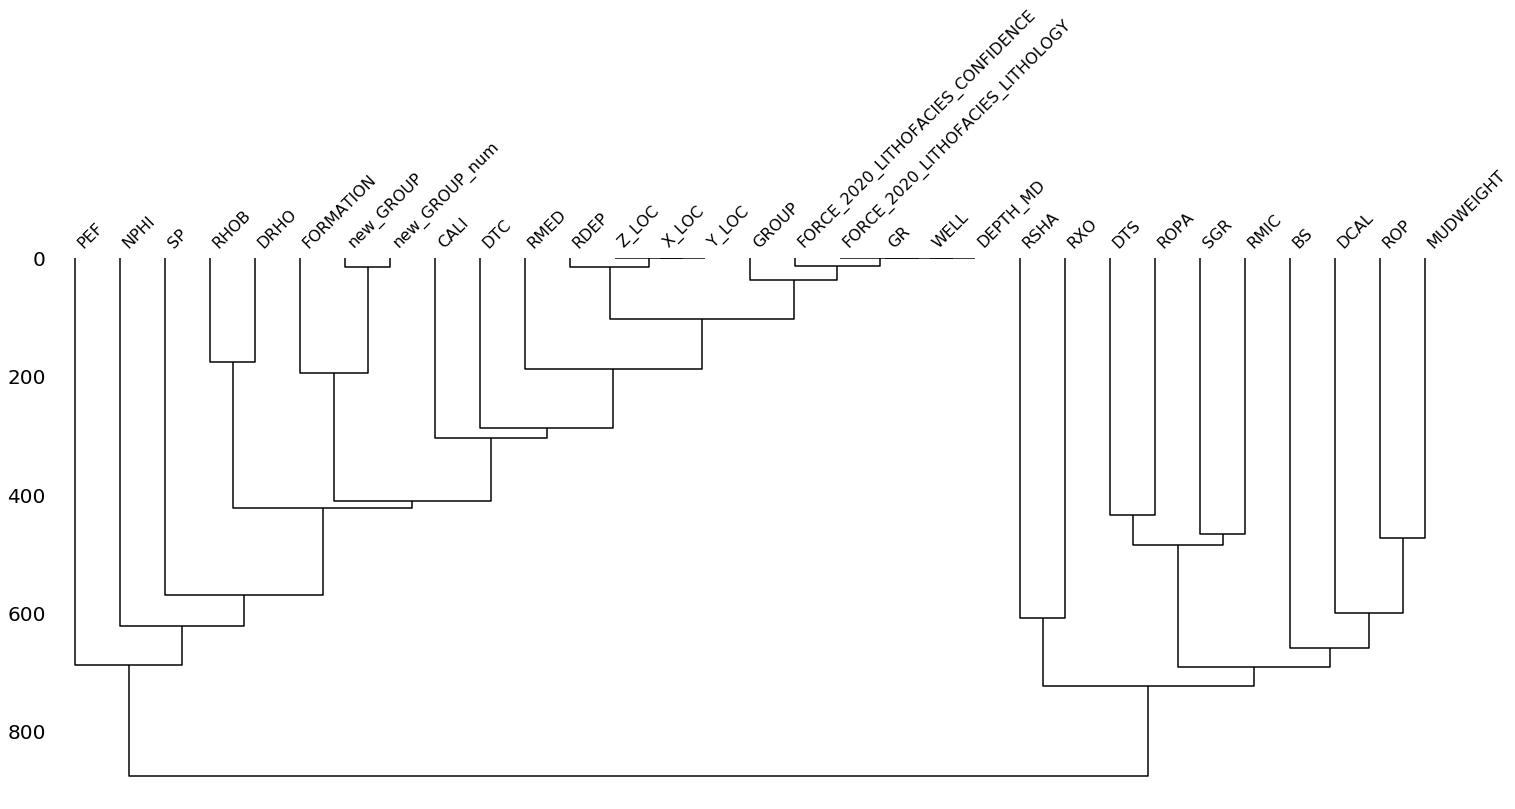

In [48]:
missingno.dendrogram(df)